# Hierarchical GANs for morphological and geometric trees

## Imports

In [1]:
import numpy as np

# Keras
from keras.models import Sequential
from keras.layers.core import Dense, Reshape, Dropout, Activation
from keras.layers import Input, merge
from keras.models import Model
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import LSTM

# Other
import matplotlib.pyplot as plt
from copy import deepcopy
import os
import pickle

%matplotlib inline

# Local
import McNeuron
import models
import train
import batch_utils
import data_transforms

Using Theano backend.


## Example neuron

/Users/pavanramkumar/anaconda2/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


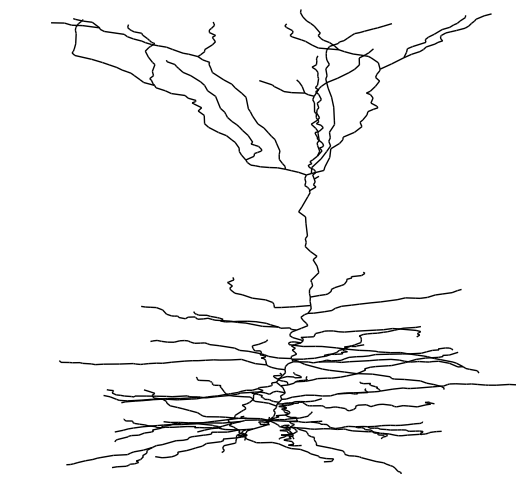

In [2]:
neuron_list = McNeuron.visualize.get_all_path(os.getcwd()+"/Data/Pyramidal/chen")
neuron = McNeuron.Neuron(file_format = 'swc', input_file=neuron_list[50])
McNeuron.visualize.plot_2D(neuron)

## Training

### Load Data

In [20]:
training_data = pickle.load(open("/Users/pavanramkumar/Dropbox/HG-GAN/03-Data/synthetic_two_segment_model_different_directions_n20.p", "rb"))

In [21]:
print training_data['morphology']['n20'].shape
print training_data['geometry']['n20'].shape

(50000, 18)
(50000, 19, 3)


### Global parameters

In [22]:
n_levels = 1
n_nodes = [20]

input_dim = 100

n_epochs = 5
batch_size = 64
n_batch_per_epoch = np.floor(training_data['morphology']['n20'].shape[0]/batch_size).astype(int)
d_iters = 20
lr_discriminator =  0.005
lr_generator = 0.0005

weight_constraint = [-0.03, 0.03]

### Run


Level #0

    Epoch #0

    After 20 iterations
        Discriminator Loss                         = -12.8815717697

    Generator_Loss: 9.90909576416
2
    After 20 iterations
        Discriminator Loss                         = -13.2205533981

    Generator_Loss: 8.19215488434
3
    After 20 iterations
        Discriminator Loss                         = -13.2312259674

    Generator_Loss: 8.42862892151
4
    After 20 iterations
        Discriminator Loss                         = -14.0650682449

    Generator_Loss: 8.91390800476
5
    After 20 iterations
        Discriminator Loss                         = -13.2035207748

    Generator_Loss: 8.20751094818
6
    After 20 iterations
        Discriminator Loss                         = -13.1682863235

    Generator_Loss: 7.22156667709
7
    After 20 iterations
        Discriminator Loss                         = -13.1464605331

    Generator_Loss: 7.24950885773
8
    After 20 iterations
        Discriminator Loss                      

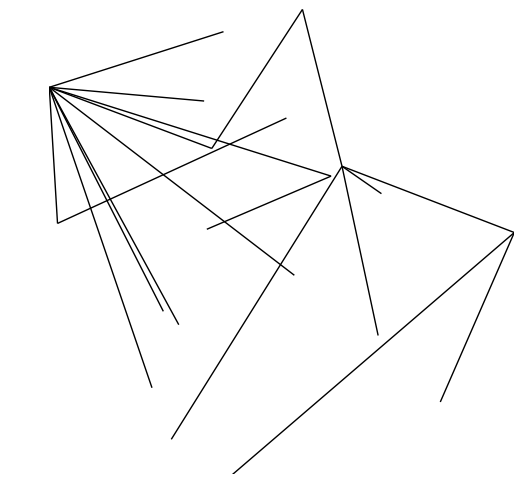

    After 20 iterations
        Discriminator Loss                         = -12.5881986618

    Generator_Loss: 6.23206853867
26
    After 20 iterations
        Discriminator Loss                         = -13.4970626831

    Generator_Loss: 5.6443901062
27
    After 20 iterations
        Discriminator Loss                         = -12.3094968796

    Generator_Loss: 5.12741565704
28
    After 20 iterations
        Discriminator Loss                         = -12.6679954529

    Generator_Loss: 5.88370609283
29
    After 20 iterations
        Discriminator Loss                         = -12.2680959702

    Generator_Loss: 5.58302307129
30
    After 20 iterations
        Discriminator Loss                         = -11.9328699112

    Generator_Loss: 5.41436958313
31
    After 20 iterations
        Discriminator Loss                         = -12.9156932831

    Generator_Loss: 4.85352373123
32
    After 20 iterations
        Discriminator Loss                         = -12.7562236786

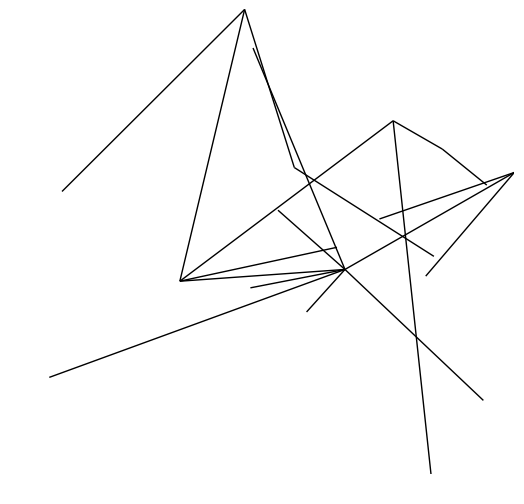

    After 20 iterations
        Discriminator Loss                         = -11.9585294724

    Generator_Loss: 3.40966153145
51
    After 20 iterations
        Discriminator Loss                         = -11.8181657791

    Generator_Loss: 4.16909742355
52
    After 20 iterations
        Discriminator Loss                         = -11.4861221313

    Generator_Loss: 3.5142621994
53
    After 20 iterations
        Discriminator Loss                         = -11.6897783279

    Generator_Loss: 1.85664570332
54
    After 20 iterations
        Discriminator Loss                         = -12.0449323654

    Generator_Loss: 2.33259558678
55
    After 20 iterations
        Discriminator Loss                         = -11.351732254

    Generator_Loss: 2.37895202637
56
    After 20 iterations
        Discriminator Loss                         = -12.6112680435

    Generator_Loss: 3.10356473923
57
    After 20 iterations
        Discriminator Loss                         = -11.7622728348


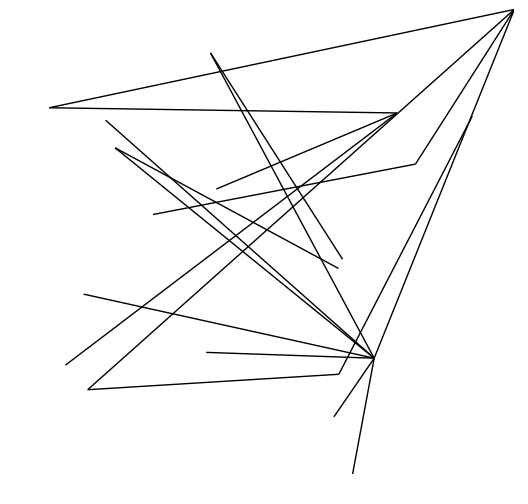

    After 20 iterations
        Discriminator Loss                         = -11.8785533905

    Generator_Loss: 1.60158836842
76
    After 20 iterations
        Discriminator Loss                         = -11.9711771011

    Generator_Loss: 1.31724214554
77
    After 20 iterations
        Discriminator Loss                         = -11.4349565506

    Generator_Loss: 1.12859225273
78
    After 20 iterations
        Discriminator Loss                         = -11.2453975677

    Generator_Loss: 0.786049187183
79
    After 20 iterations
        Discriminator Loss                         = -11.2357883453

    Generator_Loss: 1.90397167206
80
    After 20 iterations
        Discriminator Loss                         = -11.6595802307

    Generator_Loss: 1.86413359642
81
    After 20 iterations
        Discriminator Loss                         = -11.7721004486

    Generator_Loss: 2.02742385864
82
    After 20 iterations
        Discriminator Loss                         = -11.59672832

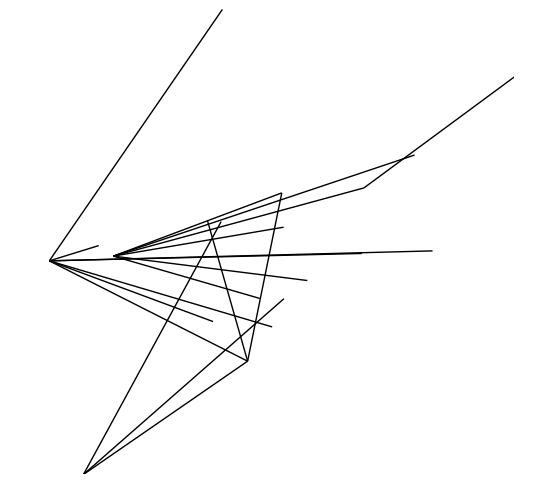

    After 20 iterations
        Discriminator Loss                         = -10.6219930649

    Generator_Loss: 0.851259589195
101
    After 20 iterations
        Discriminator Loss                         = -10.8727712631

    Generator_Loss: -0.379910349846
102
    After 20 iterations
        Discriminator Loss                         = -11.5727424622

    Generator_Loss: 0.608915746212
103
    After 20 iterations
        Discriminator Loss                         = -11.4810600281

    Generator_Loss: 0.38149946928
104
    After 20 iterations
        Discriminator Loss                         = -11.2944631577

    Generator_Loss: 0.188092634082
105
    After 20 iterations
        Discriminator Loss                         = -10.8126497269

    Generator_Loss: -0.304168015718
106
    After 20 iterations
        Discriminator Loss                         = -10.6878385544

    Generator_Loss: -0.338862329721
107
    After 20 iterations
        Discriminator Loss                        

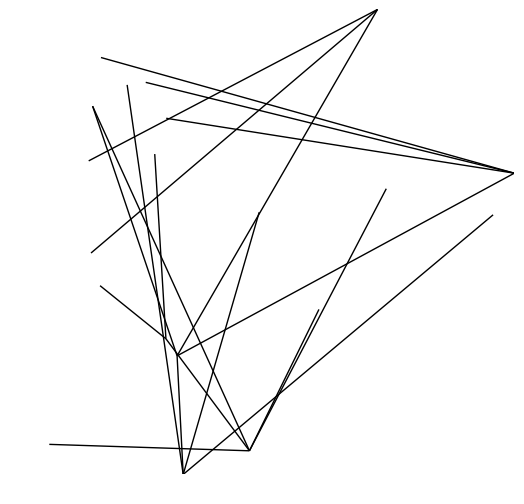

    After 20 iterations
        Discriminator Loss                         = -10.5404224396

    Generator_Loss: -0.368256688118
126
    After 20 iterations
        Discriminator Loss                         = -10.7800149918

    Generator_Loss: -0.958366274834
127
    After 20 iterations
        Discriminator Loss                         = -11.1082925797

    Generator_Loss: -0.589753448963
128
    After 20 iterations
        Discriminator Loss                         = -10.6555376053

    Generator_Loss: -0.795020222664
129
    After 20 iterations
        Discriminator Loss                         = -11.0219764709

    Generator_Loss: -0.056469310075
130
    After 20 iterations
        Discriminator Loss                         = -11.3437509537

    Generator_Loss: -0.946845054626
131
    After 20 iterations
        Discriminator Loss                         = -11.0413007736

    Generator_Loss: -0.996802568436
132
    After 20 iterations
        Discriminator Loss                   

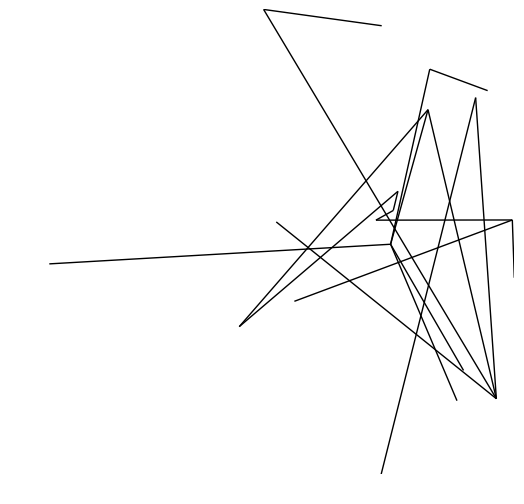

    After 20 iterations
        Discriminator Loss                         = -10.612988472

    Generator_Loss: -1.9157834053
151
    After 20 iterations
        Discriminator Loss                         = -10.5600347519

    Generator_Loss: -1.16224992275
152
    After 20 iterations
        Discriminator Loss                         = -10.6848888397

    Generator_Loss: -1.62523019314
153
    After 20 iterations
        Discriminator Loss                         = -10.4430475235

    Generator_Loss: -1.05687153339
154
    After 20 iterations
        Discriminator Loss                         = -10.282084465

    Generator_Loss: -2.57060790062
155
    After 20 iterations
        Discriminator Loss                         = -10.3549194336

    Generator_Loss: -2.86916303635
156
    After 20 iterations
        Discriminator Loss                         = -10.4050035477

    Generator_Loss: -2.8762216568
157
    After 20 iterations
        Discriminator Loss                         = -10

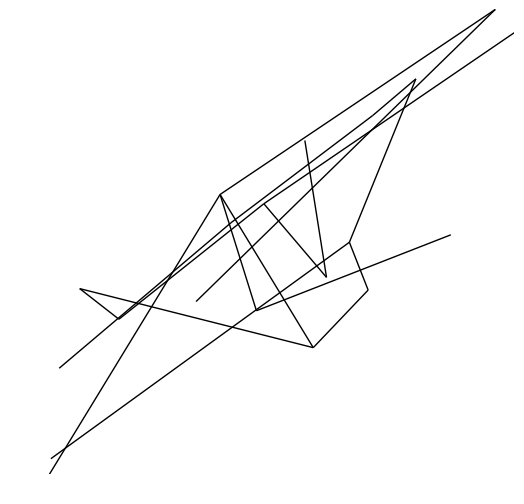

    After 20 iterations
        Discriminator Loss                         = -10.1327476501

    Generator_Loss: -3.66902470589
176
    After 20 iterations
        Discriminator Loss                         = -10.0768251419

    Generator_Loss: -3.1734213829
177
    After 20 iterations
        Discriminator Loss                         = -9.70008945465

    Generator_Loss: -2.39133143425
178
    After 20 iterations
        Discriminator Loss                         = -10.1699619293

    Generator_Loss: -3.73304510117
179
    After 20 iterations
        Discriminator Loss                         = -10.7115793228

    Generator_Loss: -3.1585381031
180
    After 20 iterations
        Discriminator Loss                         = -10.1904602051

    Generator_Loss: -2.83579492569
181
    After 20 iterations
        Discriminator Loss                         = -10.1446943283

    Generator_Loss: -4.09622144699
182
    After 20 iterations
        Discriminator Loss                         = -

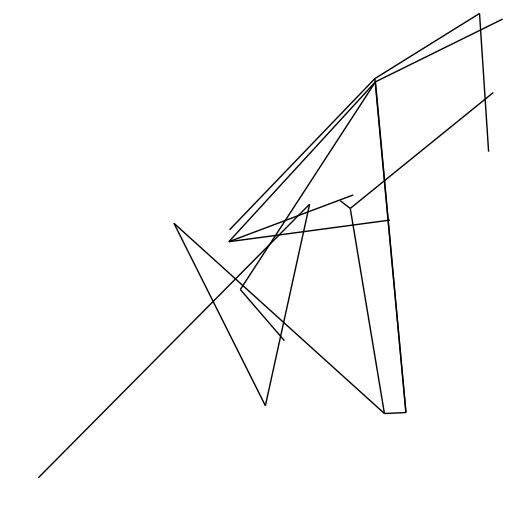

    After 20 iterations
        Discriminator Loss                         = -9.43948459625

    Generator_Loss: -4.95001268387
201
    After 20 iterations
        Discriminator Loss                         = -9.91156768799

    Generator_Loss: -4.59664058685
202
    After 20 iterations
        Discriminator Loss                         = -9.27104377747

    Generator_Loss: -5.08579826355
203
    After 20 iterations
        Discriminator Loss                         = -9.65399742126

    Generator_Loss: -5.08002090454
204
    After 20 iterations
        Discriminator Loss                         = -9.86593818665

    Generator_Loss: -4.31326055527
205
    After 20 iterations
        Discriminator Loss                         = -9.65686988831

    Generator_Loss: -4.67533731461
206
    After 20 iterations
        Discriminator Loss                         = -9.6670627594

    Generator_Loss: -5.21527194977
207
    After 20 iterations
        Discriminator Loss                         = 

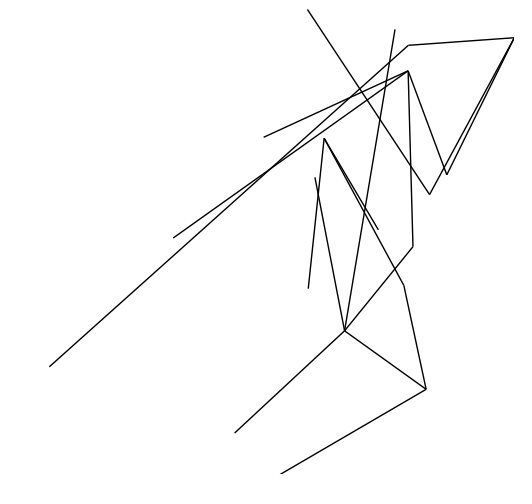

    After 20 iterations
        Discriminator Loss                         = -9.30018424988

    Generator_Loss: -5.38779878616
226
    After 20 iterations
        Discriminator Loss                         = -9.02283191681

    Generator_Loss: -6.25685071945
227
    After 20 iterations
        Discriminator Loss                         = -8.8837890625

    Generator_Loss: -6.02468156815
228
    After 20 iterations
        Discriminator Loss                         = -9.31436061859

    Generator_Loss: -6.54181051254
229
    After 20 iterations
        Discriminator Loss                         = -9.34702968597

    Generator_Loss: -6.27002286911
230
    After 20 iterations
        Discriminator Loss                         = -9.07860088348

    Generator_Loss: -5.92215442657
231
    After 20 iterations
        Discriminator Loss                         = -9.47839736938

    Generator_Loss: -6.43864393234
232
    After 20 iterations
        Discriminator Loss                         = 

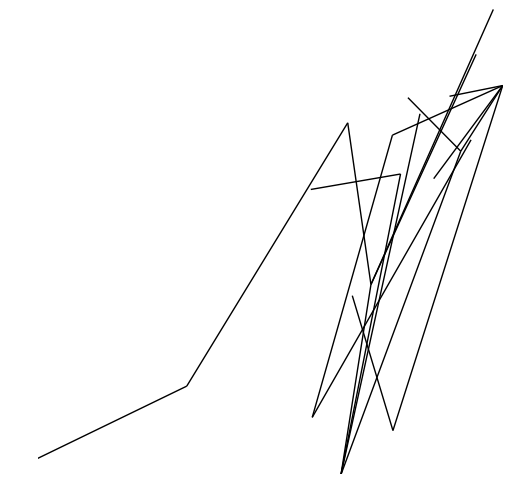

    After 20 iterations
        Discriminator Loss                         = -8.71440315247

    Generator_Loss: -6.94900941849
251
    After 20 iterations
        Discriminator Loss                         = -9.07864189148

    Generator_Loss: -6.59301519394
252
    After 20 iterations
        Discriminator Loss                         = -8.90672779083

    Generator_Loss: -6.51219129562
253
    After 20 iterations
        Discriminator Loss                         = -8.74088954926

    Generator_Loss: -6.9141702652
254
    After 20 iterations
        Discriminator Loss                         = -8.7194814682

    Generator_Loss: -7.65209531784
255
    After 20 iterations
        Discriminator Loss                         = -8.52773284912

    Generator_Loss: -7.45801734924
256
    After 20 iterations
        Discriminator Loss                         = -9.07307052612

    Generator_Loss: -7.65406513214
257
    After 20 iterations
        Discriminator Loss                         = -

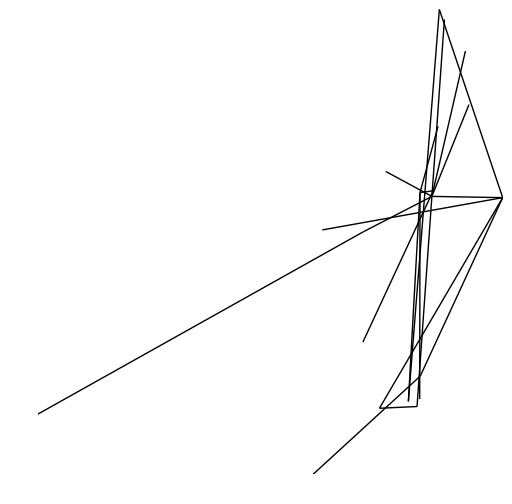

    After 20 iterations
        Discriminator Loss                         = -8.27793979645

    Generator_Loss: -8.94458961487
276
    After 20 iterations
        Discriminator Loss                         = -8.38883972168

    Generator_Loss: -8.10275936127
277
    After 20 iterations
        Discriminator Loss                         = -8.78654289246

    Generator_Loss: -10.3296318054
278
    After 20 iterations
        Discriminator Loss                         = -8.29170131683

    Generator_Loss: -9.22732543945
279
    After 20 iterations
        Discriminator Loss                         = -8.40725803375

    Generator_Loss: -7.61797046661
280
    After 20 iterations
        Discriminator Loss                         = -8.54648685455

    Generator_Loss: -9.1685295105
281
    After 20 iterations
        Discriminator Loss                         = -8.18085289001

    Generator_Loss: -8.76870346069
282
    After 20 iterations
        Discriminator Loss                         = 

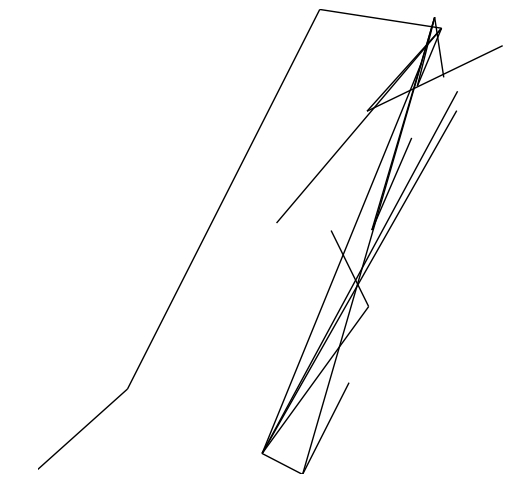

    After 20 iterations
        Discriminator Loss                         = -8.04024124146

    Generator_Loss: -9.25647163391
301
    After 20 iterations
        Discriminator Loss                         = -8.15460586548

    Generator_Loss: -7.9180264473
302
    After 20 iterations
        Discriminator Loss                         = -8.27470207214

    Generator_Loss: -10.0674152374
303
    After 20 iterations
        Discriminator Loss                         = -8.54799365997

    Generator_Loss: -8.84121704102
304
    After 20 iterations
        Discriminator Loss                         = -8.11176967621

    Generator_Loss: -9.14415359497
305
    After 20 iterations
        Discriminator Loss                         = -7.62240076065

    Generator_Loss: -9.22697257996
306
    After 20 iterations
        Discriminator Loss                         = -8.74176311493

    Generator_Loss: -11.0143852234
307
    After 20 iterations
        Discriminator Loss                         = 

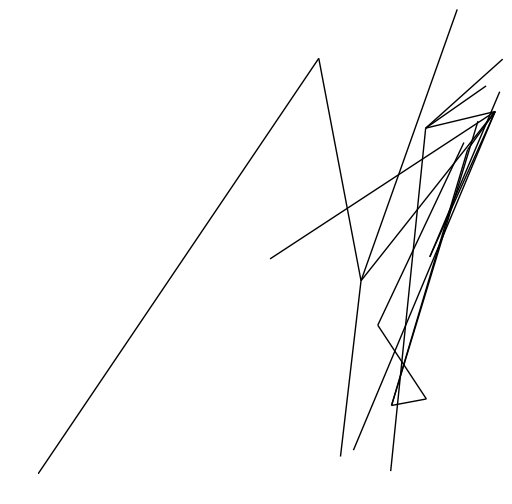

    After 20 iterations
        Discriminator Loss                         = -7.35815668106

    Generator_Loss: -7.92906904221
326
    After 20 iterations
        Discriminator Loss                         = -7.77389812469

    Generator_Loss: -9.23618793488
327
    After 20 iterations
        Discriminator Loss                         = -7.77261686325

    Generator_Loss: -10.293056488
328
    After 20 iterations
        Discriminator Loss                         = -8.00063896179

    Generator_Loss: -10.7185907364
329
    After 20 iterations
        Discriminator Loss                         = -7.25223875046

    Generator_Loss: -9.71435165405
330
    After 20 iterations
        Discriminator Loss                         = -7.4735660553

    Generator_Loss: -12.017832756
331
    After 20 iterations
        Discriminator Loss                         = -7.91327905655

    Generator_Loss: -12.4585943222
332
    After 20 iterations
        Discriminator Loss                         = -7

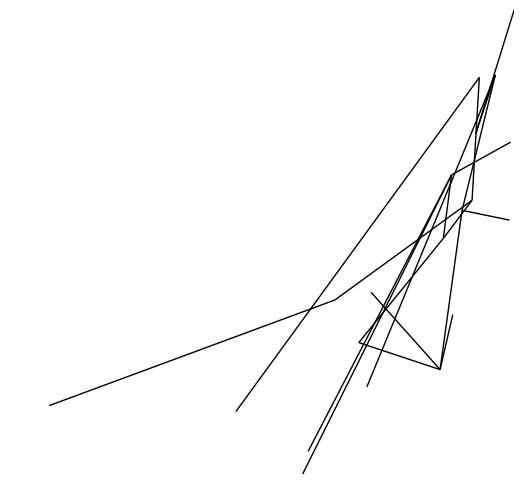

    After 20 iterations
        Discriminator Loss                         = -7.4623875618

    Generator_Loss: -11.2167787552
351
    After 20 iterations
        Discriminator Loss                         = -7.54107713699

    Generator_Loss: -10.1437101364
352
    After 20 iterations
        Discriminator Loss                         = -7.09044742584

    Generator_Loss: -11.5332355499
353
    After 20 iterations
        Discriminator Loss                         = -7.28100967407

    Generator_Loss: -8.5490732193
354
    After 20 iterations
        Discriminator Loss                         = -7.5070643425

    Generator_Loss: -9.4523191452
355
    After 20 iterations
        Discriminator Loss                         = -7.38593435287

    Generator_Loss: -9.44538879395
356
    After 20 iterations
        Discriminator Loss                         = -7.87091064453

    Generator_Loss: -12.6892147064
357
    After 20 iterations
        Discriminator Loss                         = -7.

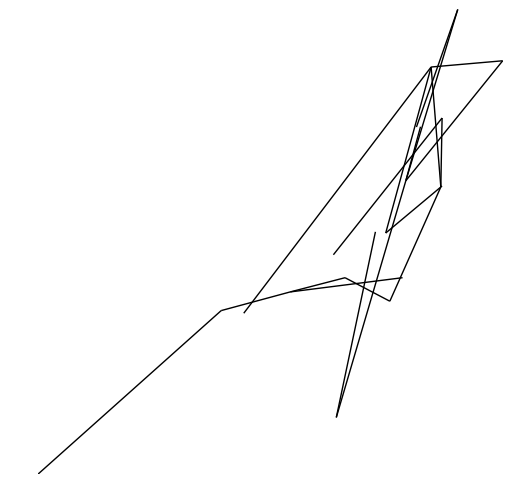

    After 20 iterations
        Discriminator Loss                         = -7.19482278824

    Generator_Loss: -12.8187332153
376
    After 20 iterations
        Discriminator Loss                         = -6.81469011307

    Generator_Loss: -11.6154003143
377
    After 20 iterations
        Discriminator Loss                         = -7.27585268021

    Generator_Loss: -8.80448532104
378
    After 20 iterations
        Discriminator Loss                         = -7.24549627304

    Generator_Loss: -12.1698503494
379
    After 20 iterations
        Discriminator Loss                         = -7.31828737259

    Generator_Loss: -9.80538654327
380
    After 20 iterations
        Discriminator Loss                         = -7.08153772354

    Generator_Loss: -10.9163475037
381
    After 20 iterations
        Discriminator Loss                         = -7.19698286057

    Generator_Loss: -12.7096672058
382
    After 20 iterations
        Discriminator Loss                         =

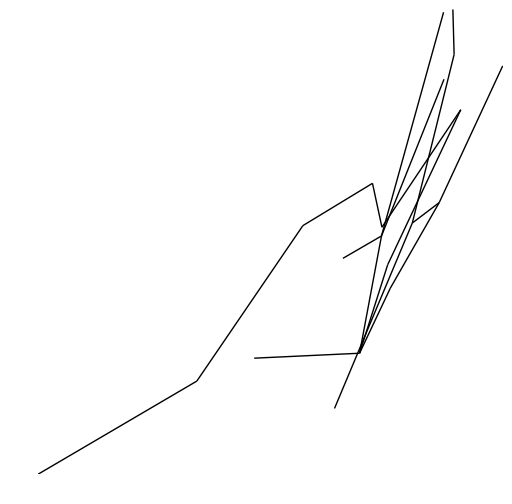

    After 20 iterations
        Discriminator Loss                         = -7.28230285645

    Generator_Loss: -8.97942638397
401
    After 20 iterations
        Discriminator Loss                         = -6.66935110092

    Generator_Loss: -11.4496917725
402
    After 20 iterations
        Discriminator Loss                         = -6.84156370163

    Generator_Loss: -10.5382061005
403
    After 20 iterations
        Discriminator Loss                         = -6.85848665237

    Generator_Loss: -13.0709686279
404
    After 20 iterations
        Discriminator Loss                         = -6.61767864227

    Generator_Loss: -11.7948598862
405
    After 20 iterations
        Discriminator Loss                         = -6.52942752838

    Generator_Loss: -11.0706596375
406
    After 20 iterations
        Discriminator Loss                         = -6.7013964653

    Generator_Loss: -11.779296875
407
    After 20 iterations
        Discriminator Loss                         = -

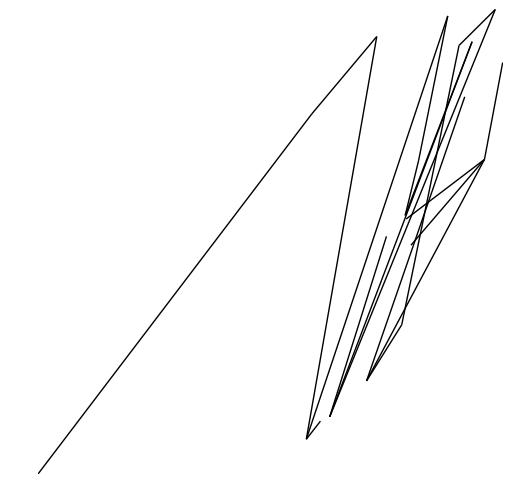

    After 20 iterations
        Discriminator Loss                         = -6.9461607933

    Generator_Loss: -8.76125144958
426
    After 20 iterations
        Discriminator Loss                         = -6.13587427139

    Generator_Loss: -12.5860080719
427
    After 20 iterations
        Discriminator Loss                         = -6.5772690773

    Generator_Loss: -14.4463500977
428
    After 20 iterations
        Discriminator Loss                         = -6.23614263535

    Generator_Loss: -13.0473995209
429
    After 20 iterations
        Discriminator Loss                         = -6.75823450089

    Generator_Loss: -11.5418205261
430
    After 20 iterations
        Discriminator Loss                         = -6.32023048401

    Generator_Loss: -11.5648021698
431
    After 20 iterations
        Discriminator Loss                         = -6.35104513168

    Generator_Loss: -12.201590538
432
    After 20 iterations
        Discriminator Loss                         = -6

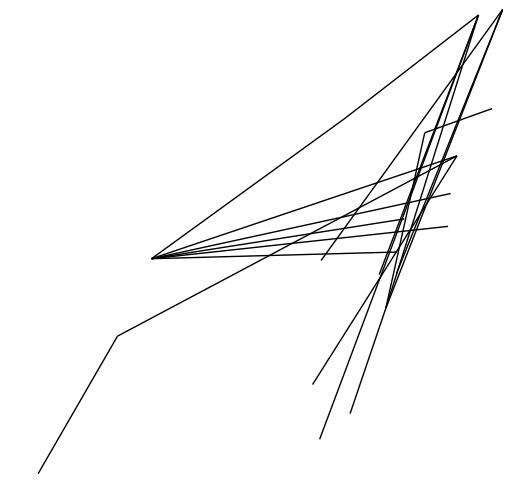

    After 20 iterations
        Discriminator Loss                         = -6.14500284195

    Generator_Loss: -12.1420116425
451
    After 20 iterations
        Discriminator Loss                         = -6.21944761276

    Generator_Loss: -11.0060253143
452
    After 20 iterations
        Discriminator Loss                         = -6.01743412018

    Generator_Loss: -11.7108774185
453
    After 20 iterations
        Discriminator Loss                         = -6.16427087784

    Generator_Loss: -11.0747127533
454
    After 20 iterations
        Discriminator Loss                         = -6.20229482651

    Generator_Loss: -13.3340864182
455
    After 20 iterations
        Discriminator Loss                         = -5.78250551224

    Generator_Loss: -13.1779336929
456
    After 20 iterations
        Discriminator Loss                         = -6.36001110077

    Generator_Loss: -14.5458202362
457
    After 20 iterations
        Discriminator Loss                         =

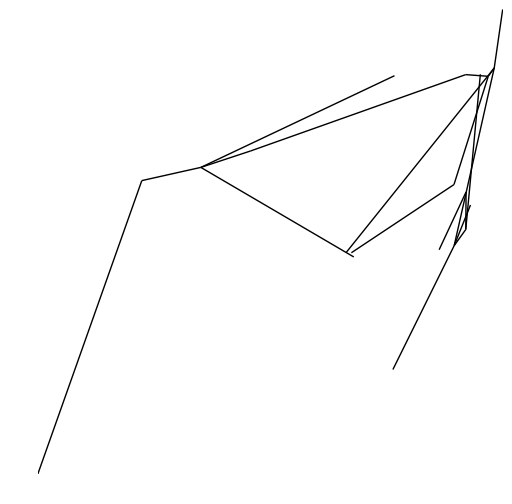

    After 20 iterations
        Discriminator Loss                         = -5.84105539322

    Generator_Loss: -10.6013498306
476
    After 20 iterations
        Discriminator Loss                         = -6.46886634827

    Generator_Loss: -8.61693286896
477
    After 20 iterations
        Discriminator Loss                         = -6.14286851883

    Generator_Loss: -10.3021850586
478
    After 20 iterations
        Discriminator Loss                         = -5.99379634857

    Generator_Loss: -14.2696819305
479
    After 20 iterations
        Discriminator Loss                         = -5.98681020737

    Generator_Loss: -16.4026565552
480
    After 20 iterations
        Discriminator Loss                         = -5.82040071487

    Generator_Loss: -14.9640378952
481
    After 20 iterations
        Discriminator Loss                         = -6.66740655899

    Generator_Loss: -10.8864250183
482
    After 20 iterations
        Discriminator Loss                         =

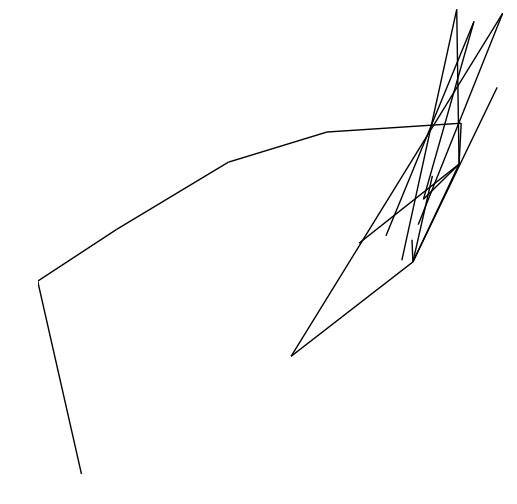

    After 20 iterations
        Discriminator Loss                         = -5.50913667679

    Generator_Loss: -12.8323078156
501
    After 20 iterations
        Discriminator Loss                         = -5.97845888138

    Generator_Loss: -10.0997819901
502
    After 20 iterations
        Discriminator Loss                         = -5.71160125732

    Generator_Loss: -13.8125228882
503
    After 20 iterations
        Discriminator Loss                         = -5.69303941727

    Generator_Loss: -11.7909603119
504
    After 20 iterations
        Discriminator Loss                         = -6.09206628799

    Generator_Loss: -7.77473545074
505
    After 20 iterations
        Discriminator Loss                         = -5.59322357178

    Generator_Loss: -9.07935810089
506
    After 20 iterations
        Discriminator Loss                         = -5.86739397049

    Generator_Loss: -11.8692951202
507
    After 20 iterations
        Discriminator Loss                         =

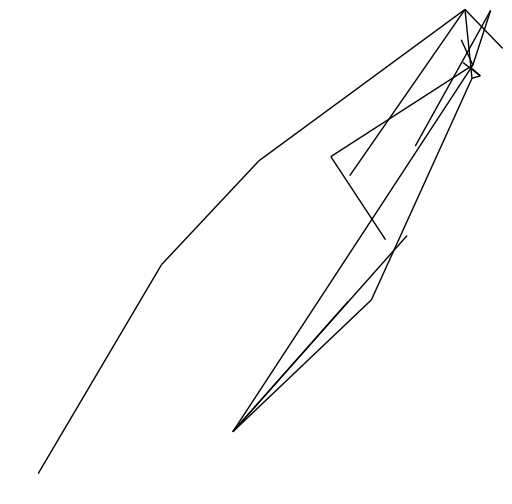

    After 20 iterations
        Discriminator Loss                         = -5.38985729218

    Generator_Loss: -15.0136785507
526
    After 20 iterations
        Discriminator Loss                         = -5.29273033142

    Generator_Loss: -16.8661594391
527
    After 20 iterations
        Discriminator Loss                         = -5.12285041809

    Generator_Loss: -12.8785352707
528
    After 20 iterations
        Discriminator Loss                         = -5.93483972549

    Generator_Loss: -11.1280174255
529
    After 20 iterations
        Discriminator Loss                         = -5.55064868927

    Generator_Loss: -7.6763882637
530
    After 20 iterations
        Discriminator Loss                         = -5.42035245895

    Generator_Loss: -16.6231365204
531
    After 20 iterations
        Discriminator Loss                         = -5.64134931564

    Generator_Loss: -13.7909259796
532
    After 20 iterations
        Discriminator Loss                         = 

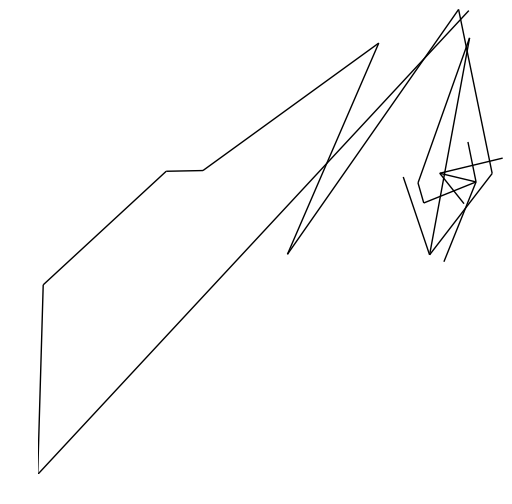

    After 20 iterations
        Discriminator Loss                         = -5.16622066498

    Generator_Loss: -17.5517635345
551
    After 20 iterations
        Discriminator Loss                         = -6.00310134888

    Generator_Loss: -6.48271894455
552
    After 20 iterations
        Discriminator Loss                         = -5.46638345718

    Generator_Loss: -5.30208873749
553
    After 20 iterations
        Discriminator Loss                         = -5.21972703934

    Generator_Loss: -9.26140213013
554
    After 20 iterations
        Discriminator Loss                         = -5.49670410156

    Generator_Loss: -5.95094347
555
    After 20 iterations
        Discriminator Loss                         = -5.25582265854

    Generator_Loss: -20.7579307556
556
    After 20 iterations
        Discriminator Loss                         = -5.19865989685

    Generator_Loss: -12.7575845718
557
    After 20 iterations
        Discriminator Loss                         = -5

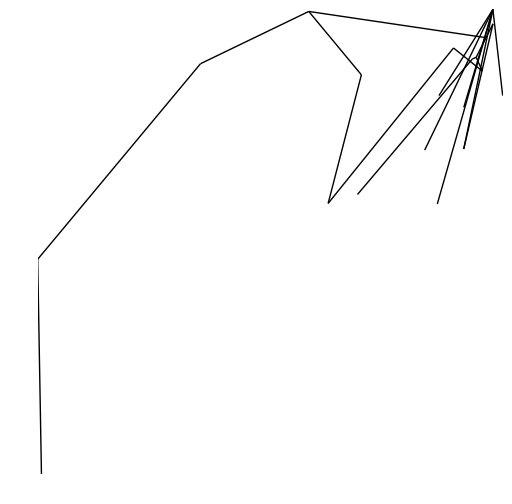

    After 20 iterations
        Discriminator Loss                         = -5.06378078461

    Generator_Loss: -9.76539802551
576
    After 20 iterations
        Discriminator Loss                         = -5.6708483696

    Generator_Loss: -4.76762008667
577
    After 20 iterations
        Discriminator Loss                         = -5.13752126694

    Generator_Loss: -8.22728443146
578
    After 20 iterations
        Discriminator Loss                         = -4.91037273407

    Generator_Loss: -11.9040870667
579
    After 20 iterations
        Discriminator Loss                         = -5.34145021439

    Generator_Loss: -9.76726722717
580
    After 20 iterations
        Discriminator Loss                         = -4.87944555283

    Generator_Loss: -14.6808252335
581
    After 20 iterations
        Discriminator Loss                         = -5.2347369194

    Generator_Loss: -8.79679679871
582
    After 20 iterations
        Discriminator Loss                         = -

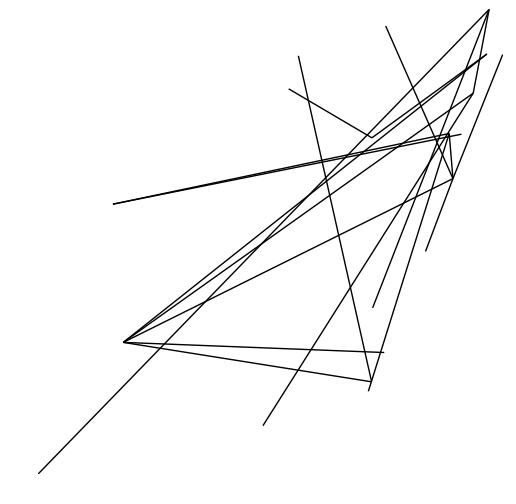

    After 20 iterations
        Discriminator Loss                         = -4.96851444244

    Generator_Loss: -13.9307289124
601
    After 20 iterations
        Discriminator Loss                         = -4.7326259613

    Generator_Loss: -9.70773792267
602
    After 20 iterations
        Discriminator Loss                         = -4.82020950317

    Generator_Loss: -10.2758617401
603
    After 20 iterations
        Discriminator Loss                         = -4.88670492172

    Generator_Loss: -6.84935188293
604
    After 20 iterations
        Discriminator Loss                         = -4.68567419052

    Generator_Loss: -10.8413190842
605
    After 20 iterations
        Discriminator Loss                         = -5.98677062988

    Generator_Loss: -0.393699496984
606
    After 20 iterations
        Discriminator Loss                         = -6.02383852005

    Generator_Loss: -0.493893831968
607
    After 20 iterations
        Discriminator Loss                         

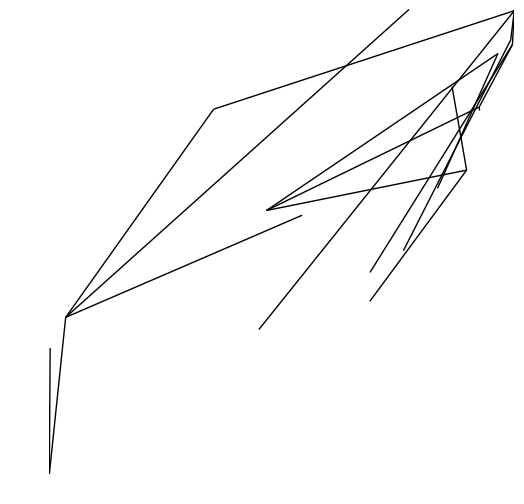

    After 20 iterations
        Discriminator Loss                         = -4.31977987289

    Generator_Loss: -11.2545690536
626
    After 20 iterations
        Discriminator Loss                         = -4.85789489746

    Generator_Loss: -7.2737994194
627
    After 20 iterations
        Discriminator Loss                         = -4.47442054749

    Generator_Loss: -17.1458511353
628
    After 20 iterations
        Discriminator Loss                         = -4.75209236145

    Generator_Loss: -19.8469142914
629
    After 20 iterations
        Discriminator Loss                         = -4.65225315094

    Generator_Loss: -10.1823854446
630
    After 20 iterations
        Discriminator Loss                         = -4.75207281113

    Generator_Loss: -20.1039161682
631
    After 20 iterations
        Discriminator Loss                         = -4.65748310089

    Generator_Loss: -6.69723367691
632
    After 20 iterations
        Discriminator Loss                         = 

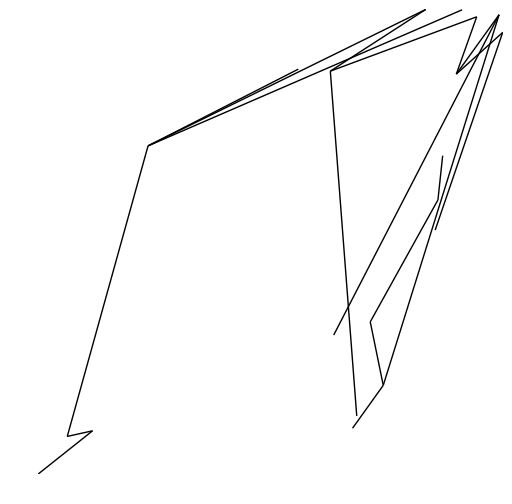

    After 20 iterations
        Discriminator Loss                         = -4.52834606171

    Generator_Loss: -1.81697225571
651
    After 20 iterations
        Discriminator Loss                         = -4.26141500473

    Generator_Loss: -11.6980476379
652
    After 20 iterations
        Discriminator Loss                         = -5.29044008255

    Generator_Loss: -1.26813077927
653
    After 20 iterations
        Discriminator Loss                         = -4.15291213989

    Generator_Loss: -14.232301712
654
    After 20 iterations
        Discriminator Loss                         = -5.47750473022

    Generator_Loss: 0.172040343285
655
    After 20 iterations
        Discriminator Loss                         = -4.40474414825

    Generator_Loss: -14.2469978333
656
    After 20 iterations
        Discriminator Loss                         = -4.4215464592

    Generator_Loss: -15.2559909821
657
    After 20 iterations
        Discriminator Loss                         = -

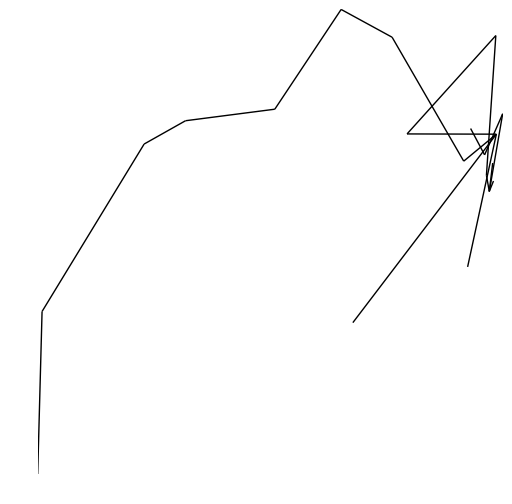

    After 20 iterations
        Discriminator Loss                         = -5.2107052803

    Generator_Loss: -1.95478475094
676
    After 20 iterations
        Discriminator Loss                         = -4.3293223381

    Generator_Loss: -5.23446369171
677
    After 20 iterations
        Discriminator Loss                         = -4.32042789459

    Generator_Loss: -5.59469890594
678
    After 20 iterations
        Discriminator Loss                         = -4.67509365082

    Generator_Loss: 0.591628193855
679
    After 20 iterations
        Discriminator Loss                         = -3.96688389778

    Generator_Loss: -12.8184051514
680
    After 20 iterations
        Discriminator Loss                         = -4.18496990204

    Generator_Loss: -14.8980979919
681
    After 20 iterations
        Discriminator Loss                         = -4.7669172287

    Generator_Loss: -8.59321975708
682
    After 20 iterations
        Discriminator Loss                         = -4

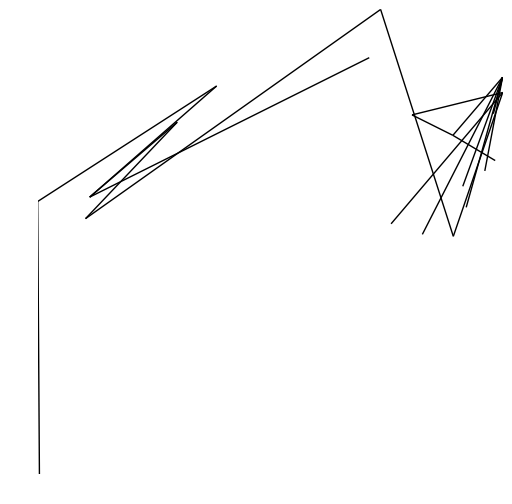

    After 20 iterations
        Discriminator Loss                         = -4.11544418335

    Generator_Loss: -8.36027908325
701
    After 20 iterations
        Discriminator Loss                         = -4.50006818771

    Generator_Loss: -3.5662779808
702
    After 20 iterations
        Discriminator Loss                         = -4.00936412811

    Generator_Loss: -4.41436338425
703
    After 20 iterations
        Discriminator Loss                         = -3.96030163765

    Generator_Loss: -14.862739563
704
    After 20 iterations
        Discriminator Loss                         = -4.62989044189

    Generator_Loss: -11.7322797775
705
    After 20 iterations
        Discriminator Loss                         = -3.97956514359

    Generator_Loss: -9.64124584198
706
    After 20 iterations
        Discriminator Loss                         = -4.11478614807

    Generator_Loss: -19.1975688934
707
    After 20 iterations
        Discriminator Loss                         = -

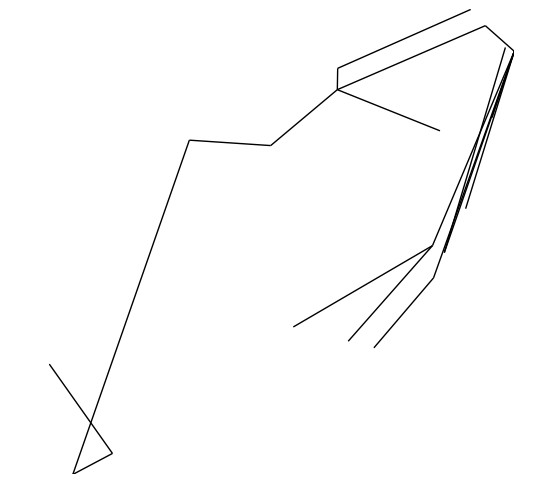

    After 20 iterations
        Discriminator Loss                         = -4.16999912262

    Generator_Loss: -9.53349304199
726
    After 20 iterations
        Discriminator Loss                         = -4.28871393204

    Generator_Loss: -8.3007068634
727
    After 20 iterations
        Discriminator Loss                         = -4.0039768219

    Generator_Loss: -13.2703647614
728
    After 20 iterations
        Discriminator Loss                         = -4.06438207626

    Generator_Loss: -21.7296123505
729
    After 20 iterations
        Discriminator Loss                         = -3.86281847954

    Generator_Loss: -15.1297903061
730
    After 20 iterations
        Discriminator Loss                         = -4.08222532272

    Generator_Loss: -22.974445343
731
    After 20 iterations
        Discriminator Loss                         = -4.02195167542

    Generator_Loss: -20.3977203369
732
    After 20 iterations
        Discriminator Loss                         = -3

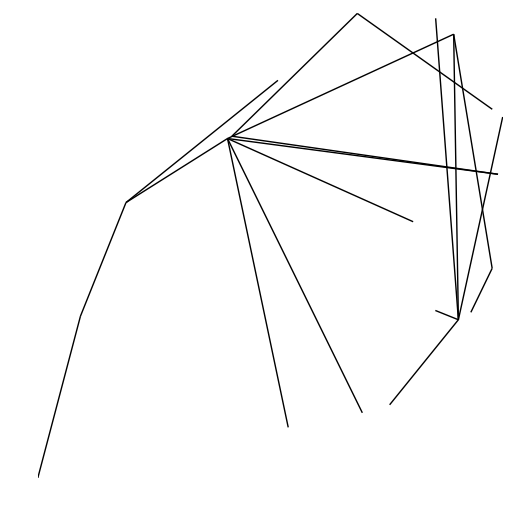

    After 20 iterations
        Discriminator Loss                         = -3.62357091904

    Generator_Loss: -10.0095233917
751
    After 20 iterations
        Discriminator Loss                         = -3.79285669327

    Generator_Loss: -5.30848360062
752
    After 20 iterations
        Discriminator Loss                         = -3.64477562904

    Generator_Loss: -16.7972774506
753
    After 20 iterations
        Discriminator Loss                         = -3.8419611454

    Generator_Loss: -19.3555793762
754
    After 20 iterations
        Discriminator Loss                         = -3.75820946693

    Generator_Loss: -10.6809968948
755
    After 20 iterations
        Discriminator Loss                         = -3.83194160461

    Generator_Loss: -15.6940336227
756
    After 20 iterations
        Discriminator Loss                         = -4.1640496254

    Generator_Loss: -26.4410839081
757
    After 20 iterations
        Discriminator Loss                         = -

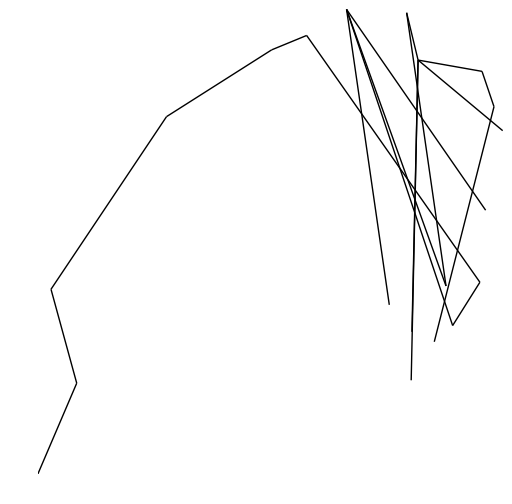

    After 20 iterations
        Discriminator Loss                         = -3.60091161728

    Generator_Loss: 3.51651453972
776
    After 20 iterations
        Discriminator Loss                         = -3.29131698608

    Generator_Loss: -11.1069841385
777
    After 20 iterations
        Discriminator Loss                         = -3.80893659592

    Generator_Loss: -16.5843410492
778
    After 20 iterations
        Discriminator Loss                         = -3.89837932587

    Generator_Loss: -27.8553028107
779
    After 20 iterations
        Discriminator Loss                         = -3.63066744804

    Generator_Loss: -19.0470104218
780
    After 20 iterations
        Discriminator Loss                         = -3.80218052864

    Generator_Loss: -23.1760139465
781

    Epoch #1

    After 20 iterations
        Discriminator Loss                         = -4.18444919586

    Generator_Loss: 0.770573616028
2
    After 20 iterations
        Discriminator Loss              

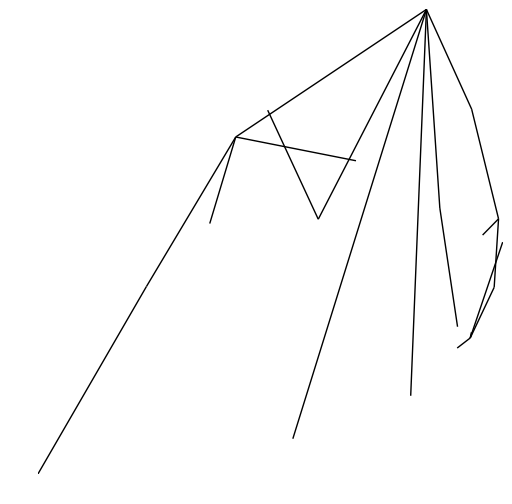

    After 20 iterations
        Discriminator Loss                         = -3.36907911301

    Generator_Loss: -6.17438077927
26
    After 20 iterations
        Discriminator Loss                         = -4.04101705551

    Generator_Loss: -25.8612613678
27
    After 20 iterations
        Discriminator Loss                         = -3.9658973217

    Generator_Loss: -0.379822164774
28
    After 20 iterations
        Discriminator Loss                         = -4.03042602539

    Generator_Loss: -4.51320171356
29
    After 20 iterations
        Discriminator Loss                         = -3.41182255745

    Generator_Loss: -2.92162132263
30
    After 20 iterations
        Discriminator Loss                         = -3.79177188873

    Generator_Loss: 2.97653317451
31
    After 20 iterations
        Discriminator Loss                         = -3.50145316124

    Generator_Loss: -13.0086488724
32
    After 20 iterations
        Discriminator Loss                         = -3.5456

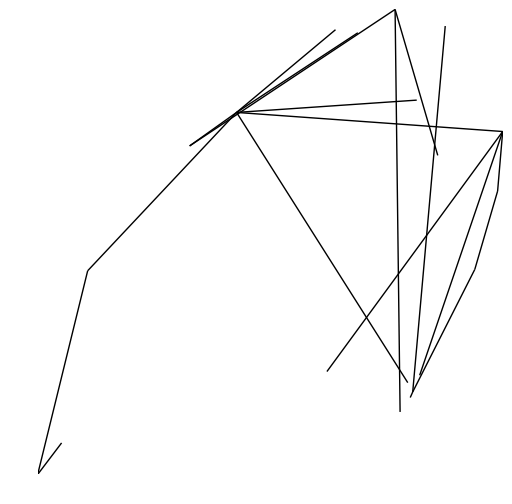

    After 20 iterations
        Discriminator Loss                         = -3.14184165001

    Generator_Loss: -11.4971046448
51
    After 20 iterations
        Discriminator Loss                         = -3.32891845703

    Generator_Loss: -10.8731431961
52
    After 20 iterations
        Discriminator Loss                         = -4.23693943024

    Generator_Loss: 4.14343070984
53
    After 20 iterations
        Discriminator Loss                         = -3.14549183846

    Generator_Loss: -3.52034425735
54
    After 20 iterations
        Discriminator Loss                         = -4.18858242035

    Generator_Loss: -2.34311366081
55
    After 20 iterations
        Discriminator Loss                         = -3.2584207058

    Generator_Loss: -8.12405967712
56
    After 20 iterations
        Discriminator Loss                         = -3.53889465332

    Generator_Loss: -22.6153869629
57
    After 20 iterations
        Discriminator Loss                         = -3.26878

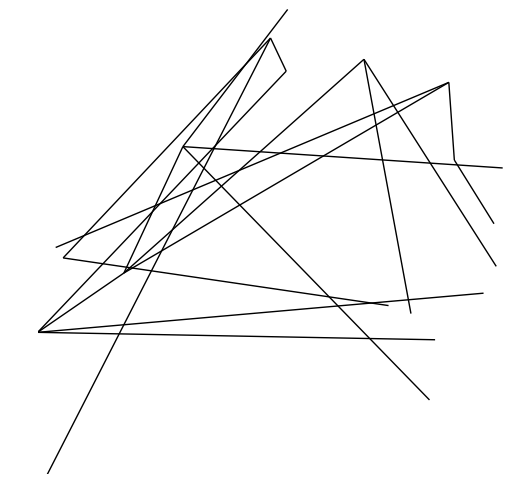

    After 20 iterations
        Discriminator Loss                         = -3.53860473633

    Generator_Loss: -30.0825977325
76
    After 20 iterations
        Discriminator Loss                         = -3.53203082085

    Generator_Loss: -28.9132328033
77
    After 20 iterations
        Discriminator Loss                         = -3.58118224144

    Generator_Loss: -3.27246379852
78
    After 20 iterations
        Discriminator Loss                         = -3.87549448013

    Generator_Loss: 0.0851592198014
79
    After 20 iterations
        Discriminator Loss                         = -3.55085587502

    Generator_Loss: 4.77928495407
80
    After 20 iterations
        Discriminator Loss                         = -3.16777586937

    Generator_Loss: -13.5789775848
81
    After 20 iterations
        Discriminator Loss                         = -3.39492726326

    Generator_Loss: -23.3183135986
82
    After 20 iterations
        Discriminator Loss                         = -3.371

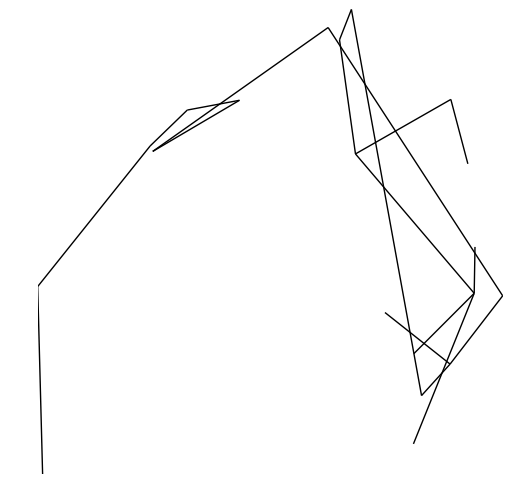

    After 20 iterations
        Discriminator Loss                         = -3.52152609825

    Generator_Loss: 5.96936130524
101
    After 20 iterations
        Discriminator Loss                         = -4.50623559952

    Generator_Loss: 4.70417785645
102
    After 20 iterations
        Discriminator Loss                         = -3.24777293205

    Generator_Loss: -23.2168064117
103
    After 20 iterations
        Discriminator Loss                         = -3.29236340523

    Generator_Loss: -19.7805557251
104
    After 20 iterations
        Discriminator Loss                         = -3.17127418518

    Generator_Loss: -13.3343029022
105
    After 20 iterations
        Discriminator Loss                         = -2.93751263618

    Generator_Loss: -6.61801767349
106
    After 20 iterations
        Discriminator Loss                         = -3.77200722694

    Generator_Loss: -0.0979067981243
107
    After 20 iterations
        Discriminator Loss                         =

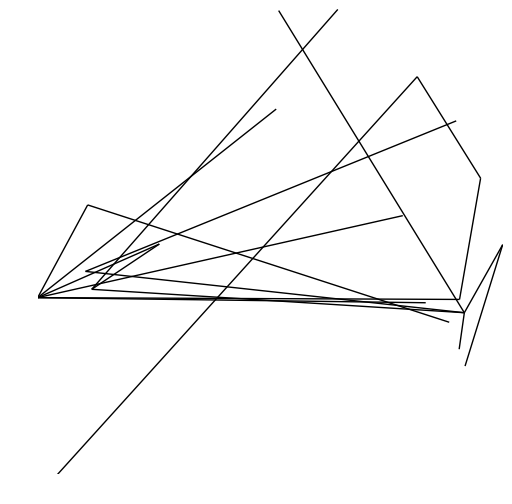

    After 20 iterations
        Discriminator Loss                         = -4.30701732635

    Generator_Loss: 5.63301897049
126
    After 20 iterations
        Discriminator Loss                         = -3.06746864319

    Generator_Loss: -7.03795814514
127
    After 20 iterations
        Discriminator Loss                         = -3.00163912773

    Generator_Loss: -22.0105991364
128
    After 20 iterations
        Discriminator Loss                         = -2.99572706223

    Generator_Loss: -8.56989383698
129
    After 20 iterations
        Discriminator Loss                         = -3.08877062798

    Generator_Loss: -19.0891284943
130
    After 20 iterations
        Discriminator Loss                         = -3.38311362267

    Generator_Loss: -31.0521755219
131
    After 20 iterations
        Discriminator Loss                         = -3.05571246147

    Generator_Loss: -26.5323085785
132
    After 20 iterations
        Discriminator Loss                         = 

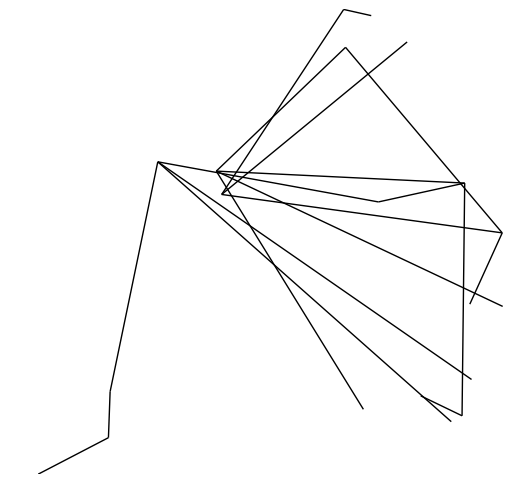

    After 20 iterations
        Discriminator Loss                         = -3.94875407219

    Generator_Loss: 1.08100628853
151
    After 20 iterations
        Discriminator Loss                         = -3.07285857201

    Generator_Loss: -16.9620552063
152
    After 20 iterations
        Discriminator Loss                         = -3.15001630783

    Generator_Loss: -11.1491689682
153
    After 20 iterations
        Discriminator Loss                         = -2.98151564598

    Generator_Loss: -3.35637974739
154
    After 20 iterations
        Discriminator Loss                         = -4.12602901459

    Generator_Loss: 4.5236287117
155
    After 20 iterations
        Discriminator Loss                         = -3.56870436668

    Generator_Loss: -3.37465500832
156
    After 20 iterations
        Discriminator Loss                         = -2.93385410309

    Generator_Loss: -4.32167863846
157
    After 20 iterations
        Discriminator Loss                         = -3

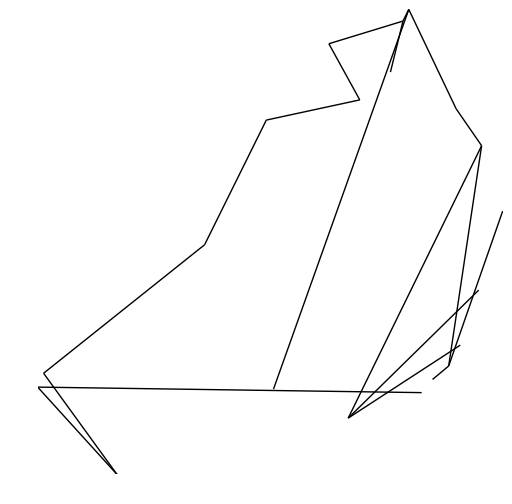

    After 20 iterations
        Discriminator Loss                         = -3.92047309875

    Generator_Loss: -0.375544607639
176
    After 20 iterations
        Discriminator Loss                         = -2.71964693069

    Generator_Loss: -6.6238360405
177
    After 20 iterations
        Discriminator Loss                         = -2.77472352982

    Generator_Loss: 2.94757723808
178
    After 20 iterations
        Discriminator Loss                         = -3.14640450478

    Generator_Loss: -0.664312839508
179
    After 20 iterations
        Discriminator Loss                         = -3.03338336945

    Generator_Loss: -26.0535736084
180
    After 20 iterations
        Discriminator Loss                         = -2.75016665459

    Generator_Loss: -26.4747905731
181
    After 20 iterations
        Discriminator Loss                         = -2.85692095757

    Generator_Loss: -17.4031009674
182
    After 20 iterations
        Discriminator Loss                         =

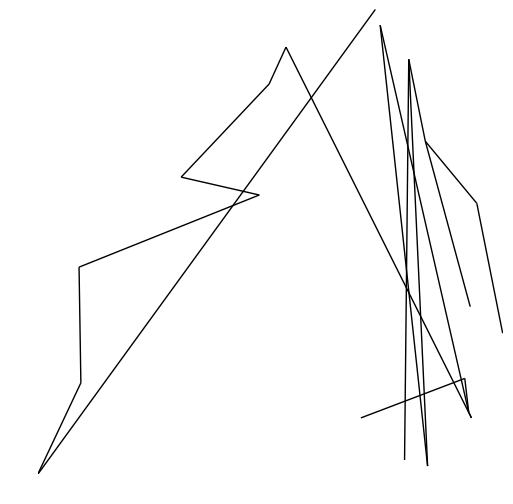

    After 20 iterations
        Discriminator Loss                         = -3.49009585381

    Generator_Loss: 6.53321886063
201
    After 20 iterations
        Discriminator Loss                         = -2.77019476891

    Generator_Loss: -18.6575508118
202
    After 20 iterations
        Discriminator Loss                         = -3.02774167061

    Generator_Loss: 5.81040239334
203
    After 20 iterations
        Discriminator Loss                         = -2.49485874176

    Generator_Loss: -13.0387439728
204
    After 20 iterations
        Discriminator Loss                         = -2.73511624336

    Generator_Loss: -19.6961135864
205
    After 20 iterations
        Discriminator Loss                         = -2.85507321358

    Generator_Loss: -13.2011165619
206
    After 20 iterations
        Discriminator Loss                         = -3.19453024864

    Generator_Loss: 4.2304649353
207
    After 20 iterations
        Discriminator Loss                         = -2.

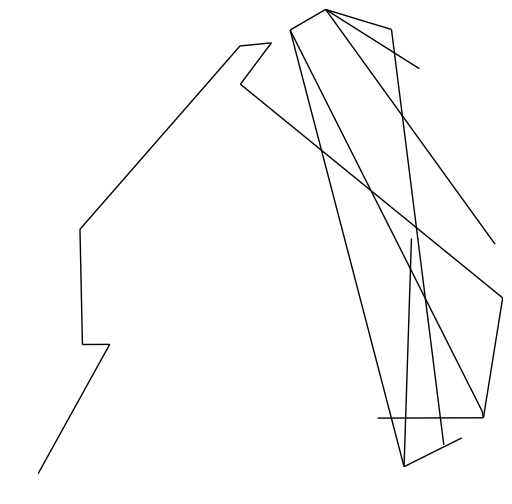

    After 20 iterations
        Discriminator Loss                         = -3.68311810493

    Generator_Loss: 10.9109582901
226
    After 20 iterations
        Discriminator Loss                         = -2.38586974144

    Generator_Loss: -3.71782016754
227
    After 20 iterations
        Discriminator Loss                         = -2.58246064186

    Generator_Loss: -6.90393924713
228
    After 20 iterations
        Discriminator Loss                         = -2.50505971909

    Generator_Loss: -16.602684021
229
    After 20 iterations
        Discriminator Loss                         = -3.37719345093

    Generator_Loss: -10.9312000275
230
    After 20 iterations
        Discriminator Loss                         = -2.75995016098

    Generator_Loss: -0.0774967223406
231
    After 20 iterations
        Discriminator Loss                         = -2.74992990494

    Generator_Loss: -24.0973110199
232
    After 20 iterations
        Discriminator Loss                         =

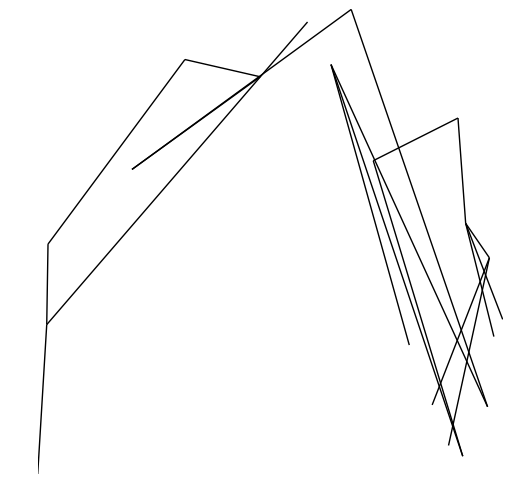

    After 20 iterations
        Discriminator Loss                         = -2.68371796608

    Generator_Loss: 2.0185713768
251
    After 20 iterations
        Discriminator Loss                         = -3.20854234695

    Generator_Loss: 0.74295681715
252
    After 20 iterations
        Discriminator Loss                         = -4.33647871017

    Generator_Loss: 12.1174898148
253
    After 20 iterations
        Discriminator Loss                         = -3.09418201447

    Generator_Loss: 7.03080844879
254
    After 20 iterations
        Discriminator Loss                         = -2.80710744858

    Generator_Loss: -5.4594039917
255
    After 20 iterations
        Discriminator Loss                         = -2.89161729813

    Generator_Loss: 2.37197303772
256
    After 20 iterations
        Discriminator Loss                         = -2.81280112267

    Generator_Loss: -21.9275417328
257
    After 20 iterations
        Discriminator Loss                         = -2.433

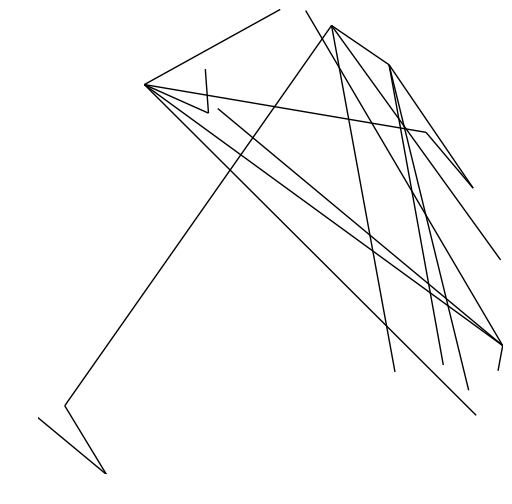

    After 20 iterations
        Discriminator Loss                         = -2.3048388958

    Generator_Loss: -6.24894237518
276
    After 20 iterations
        Discriminator Loss                         = -3.09156703949

    Generator_Loss: -3.23926901817
277
    After 20 iterations
        Discriminator Loss                         = -2.81180119514

    Generator_Loss: -19.9614830017
278
    After 20 iterations
        Discriminator Loss                         = -2.56635951996

    Generator_Loss: -3.06758069992
279
    After 20 iterations
        Discriminator Loss                         = -2.54895496368

    Generator_Loss: -6.00985765457
280
    After 20 iterations
        Discriminator Loss                         = -2.67187714577

    Generator_Loss: -14.7922849655
281
    After 20 iterations
        Discriminator Loss                         = -2.34947705269

    Generator_Loss: -11.3463096619
282
    After 20 iterations
        Discriminator Loss                         = 

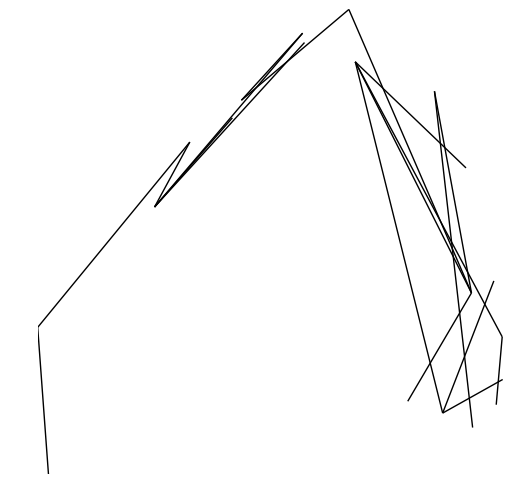

    After 20 iterations
        Discriminator Loss                         = -2.57582378387

    Generator_Loss: 5.44079828262
301
    After 20 iterations
        Discriminator Loss                         = -3.36845636368

    Generator_Loss: 7.21047258377
302
    After 20 iterations
        Discriminator Loss                         = -2.64990282059

    Generator_Loss: -2.83214092255
303
    After 20 iterations
        Discriminator Loss                         = -2.57656002045

    Generator_Loss: -17.6864242554
304
    After 20 iterations
        Discriminator Loss                         = -2.43032765388

    Generator_Loss: -14.5694179535
305
    After 20 iterations
        Discriminator Loss                         = -2.62325596809

    Generator_Loss: 8.24461078644
306
    After 20 iterations
        Discriminator Loss                         = -3.00102996826

    Generator_Loss: -27.8182487488
307
    After 20 iterations
        Discriminator Loss                         = -2

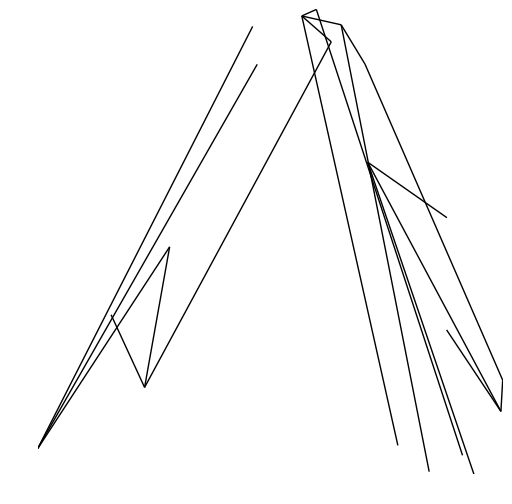

    After 20 iterations
        Discriminator Loss                         = -3.37133049965

    Generator_Loss: 10.8288135529
326
    After 20 iterations
        Discriminator Loss                         = -2.8219602108

    Generator_Loss: 9.60291671753
327
    After 20 iterations
        Discriminator Loss                         = -2.36811876297

    Generator_Loss: 0.728274822235
328
    After 20 iterations
        Discriminator Loss                         = -2.72868609428

    Generator_Loss: -19.0578632355
329
    After 20 iterations
        Discriminator Loss                         = -2.19480109215

    Generator_Loss: 0.266507655382
330
    After 20 iterations
        Discriminator Loss                         = -2.17360782623

    Generator_Loss: -17.2727146149
331
    After 20 iterations
        Discriminator Loss                         = -2.58727955818

    Generator_Loss: -23.4803504944
332
    After 20 iterations
        Discriminator Loss                         = -2

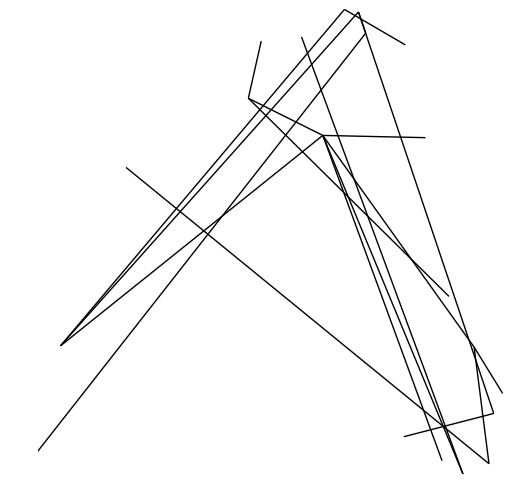

    After 20 iterations
        Discriminator Loss                         = -2.24798989296

    Generator_Loss: -17.2929973602
351
    After 20 iterations
        Discriminator Loss                         = -2.65315032005

    Generator_Loss: -8.66595840454
352
    After 20 iterations
        Discriminator Loss                         = -2.20514130592

    Generator_Loss: 2.60084152222
353
    After 20 iterations
        Discriminator Loss                         = -3.22444701195

    Generator_Loss: -4.38713932037
354
    After 20 iterations
        Discriminator Loss                         = -2.67806601524

    Generator_Loss: -16.5786705017
355
    After 20 iterations
        Discriminator Loss                         = -2.84859824181

    Generator_Loss: 6.6699385643
356
    After 20 iterations
        Discriminator Loss                         = -3.06909918785

    Generator_Loss: -16.0935897827
357
    After 20 iterations
        Discriminator Loss                         = -3

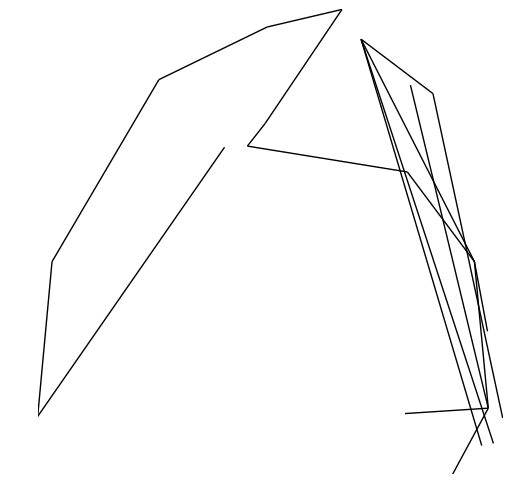

    After 20 iterations
        Discriminator Loss                         = -2.41192340851

    Generator_Loss: -11.9131994247
376
    After 20 iterations
        Discriminator Loss                         = -2.17180514336

    Generator_Loss: 5.6164355278
377
    After 20 iterations
        Discriminator Loss                         = -3.02948927879

    Generator_Loss: 8.97613143921
378
    After 20 iterations
        Discriminator Loss                         = -2.41989254951

    Generator_Loss: -25.5497436523
379
    After 20 iterations
        Discriminator Loss                         = -2.80204057693

    Generator_Loss: 13.7933082581
380
    After 20 iterations
        Discriminator Loss                         = -2.3748986721

    Generator_Loss: 4.36355638504
381
    After 20 iterations
        Discriminator Loss                         = -2.72827386856

    Generator_Loss: -10.6405096054
382
    After 20 iterations
        Discriminator Loss                         = -2.41

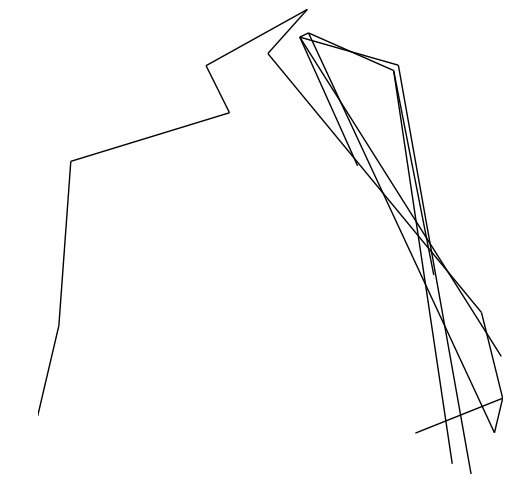

    After 20 iterations
        Discriminator Loss                         = -3.36031270027

    Generator_Loss: 4.26700592041
401
    After 20 iterations
        Discriminator Loss                         = -2.14424872398

    Generator_Loss: -9.00572872162
402
    After 20 iterations
        Discriminator Loss                         = -2.75083827972

    Generator_Loss: 13.2515945435
403
    After 20 iterations
        Discriminator Loss                         = -2.32776069641

    Generator_Loss: -10.8011827469
404
    After 20 iterations
        Discriminator Loss                         = -2.45111560822

    Generator_Loss: 5.25876522064
405
    After 20 iterations
        Discriminator Loss                         = -2.00017023087

    Generator_Loss: -8.17904949188
406
    After 20 iterations
        Discriminator Loss                         = -2.09244847298

    Generator_Loss: -20.5127658844
407
    After 20 iterations
        Discriminator Loss                         = -3

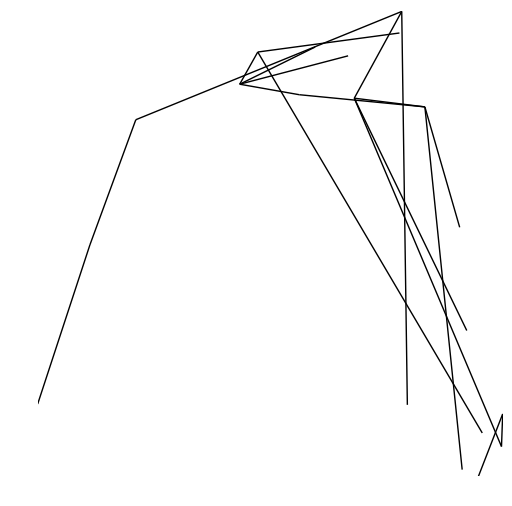

    After 20 iterations
        Discriminator Loss                         = -3.17159080505

    Generator_Loss: 8.59726238251
426
    After 20 iterations
        Discriminator Loss                         = -2.02376675606

    Generator_Loss: -6.96350908279
427
    After 20 iterations
        Discriminator Loss                         = -2.70273375511

    Generator_Loss: -31.7081451416
428
    After 20 iterations
        Discriminator Loss                         = -2.40299534798

    Generator_Loss: -9.64670085907
429
    After 20 iterations
        Discriminator Loss                         = -2.51947975159

    Generator_Loss: -6.7567486763
430
    After 20 iterations
        Discriminator Loss                         = -2.02911996841

    Generator_Loss: -4.53707456589
431
    After 20 iterations
        Discriminator Loss                         = -1.98842632771

    Generator_Loss: -17.9750804901
432
    After 20 iterations
        Discriminator Loss                         = -

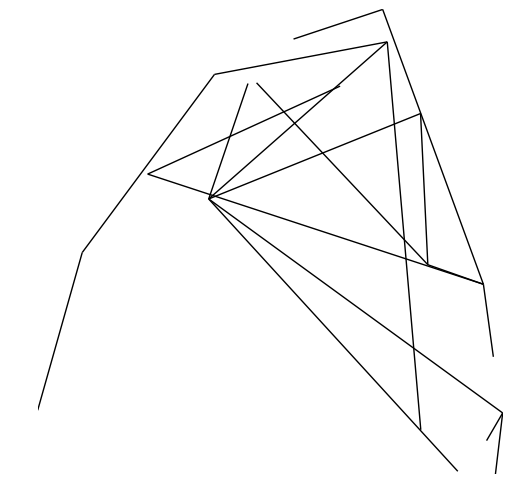

    After 20 iterations
        Discriminator Loss                         = -2.17627120018

    Generator_Loss: -1.19847011566
451
    After 20 iterations
        Discriminator Loss                         = -2.13948369026

    Generator_Loss: -14.2620248795
452
    After 20 iterations
        Discriminator Loss                         = -2.02233576775

    Generator_Loss: -6.09032869339
453
    After 20 iterations
        Discriminator Loss                         = -2.18496823311

    Generator_Loss: -3.85776686668
454
    After 20 iterations
        Discriminator Loss                         = -2.01834511757

    Generator_Loss: -20.7004261017
455
    After 20 iterations
        Discriminator Loss                         = -2.30703997612

    Generator_Loss: -0.693803846836
456
    After 20 iterations
        Discriminator Loss                         = -2.43862247467

    Generator_Loss: -24.9034347534
457
    After 20 iterations
        Discriminator Loss                         

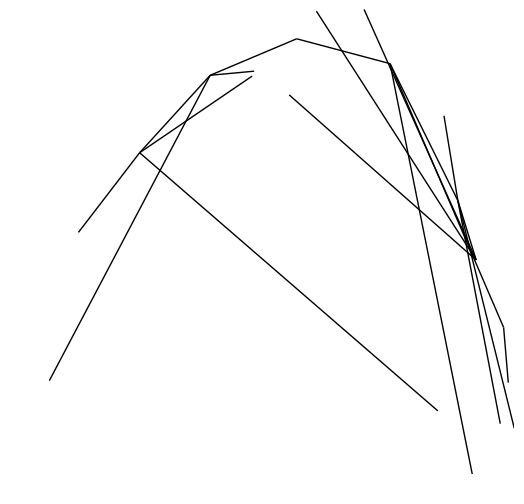

    After 20 iterations
        Discriminator Loss                         = -1.93292963505

    Generator_Loss: -5.75258398056
476
    After 20 iterations
        Discriminator Loss                         = -2.9122531414

    Generator_Loss: -3.1068956852
477
    After 20 iterations
        Discriminator Loss                         = -2.051476717

    Generator_Loss: -4.3791513443
478
    After 20 iterations
        Discriminator Loss                         = -2.16742110252

    Generator_Loss: -8.08790969849
479
    After 20 iterations
        Discriminator Loss                         = -2.67600297928

    Generator_Loss: -13.2907762527
480
    After 20 iterations
        Discriminator Loss                         = -2.14226913452

    Generator_Loss: -14.7492036819
481
    After 20 iterations
        Discriminator Loss                         = -2.99797964096

    Generator_Loss: 9.67748260498
482
    After 20 iterations
        Discriminator Loss                         = -2.04

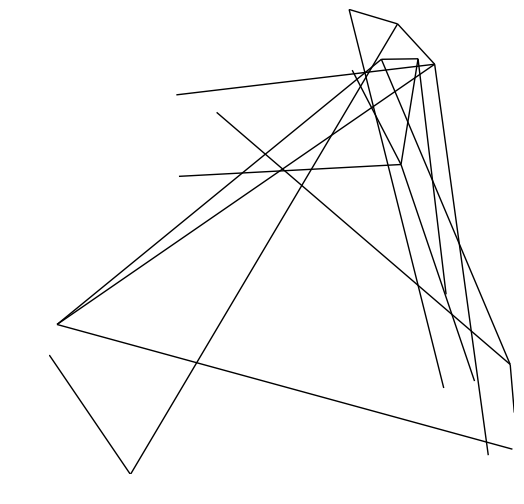

    After 20 iterations
        Discriminator Loss                         = -1.91655087471

    Generator_Loss: 2.11723208427
501
    After 20 iterations
        Discriminator Loss                         = -2.30476784706

    Generator_Loss: 7.51599836349
502
    After 20 iterations
        Discriminator Loss                         = -2.05148053169

    Generator_Loss: 2.93820762634
503
    After 20 iterations
        Discriminator Loss                         = -2.0810406208

    Generator_Loss: 6.75098371506
504
    After 20 iterations
        Discriminator Loss                         = -2.59273576736

    Generator_Loss: 6.45517730713
505
    After 20 iterations
        Discriminator Loss                         = -2.03603386879

    Generator_Loss: -7.77989578247
506
    After 20 iterations
        Discriminator Loss                         = -2.31212067604

    Generator_Loss: -12.7522783279
507
    After 20 iterations
        Discriminator Loss                         = -1.97

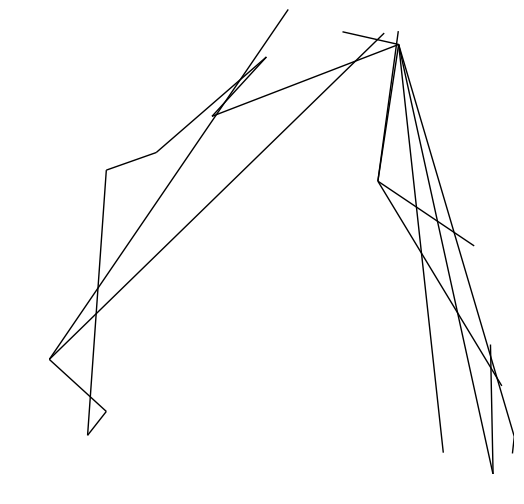

    After 20 iterations
        Discriminator Loss                         = -1.81252419949

    Generator_Loss: -9.85521888733
526
    After 20 iterations
        Discriminator Loss                         = -1.77837872505

    Generator_Loss: -27.8819770813
527
    After 20 iterations
        Discriminator Loss                         = -1.69629132748

    Generator_Loss: 5.83939123154
528
    After 20 iterations
        Discriminator Loss                         = -2.35670638084

    Generator_Loss: -16.4897899628
529
    After 20 iterations
        Discriminator Loss                         = -2.36927962303

    Generator_Loss: 18.7887268066
530
    After 20 iterations
        Discriminator Loss                         = -2.15874218941

    Generator_Loss: -9.52064037323
531
    After 20 iterations
        Discriminator Loss                         = -2.23474764824

    Generator_Loss: 3.95248818398
532
    After 20 iterations
        Discriminator Loss                         = -2

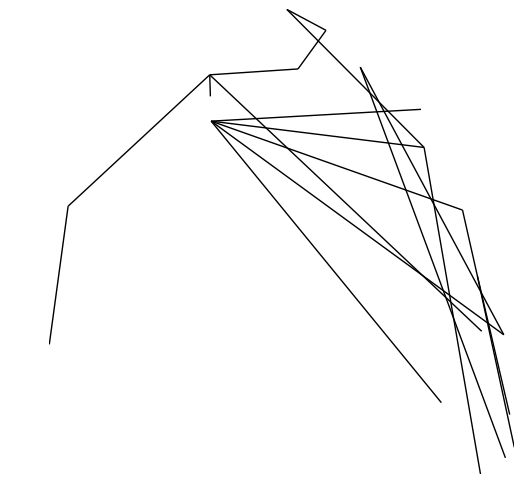

    After 20 iterations
        Discriminator Loss                         = -2.0301668644

    Generator_Loss: -16.9027042389
551
    After 20 iterations
        Discriminator Loss                         = -2.87868952751

    Generator_Loss: -0.851426720619
552
    After 20 iterations
        Discriminator Loss                         = -2.77573013306

    Generator_Loss: 20.6248874664
553
    After 20 iterations
        Discriminator Loss                         = -1.79036772251

    Generator_Loss: 4.37753152847
554
    After 20 iterations
        Discriminator Loss                         = -2.69094204903

    Generator_Loss: 15.9759521484
555
    After 20 iterations
        Discriminator Loss                         = -2.52935552597

    Generator_Loss: -32.420501709
556
    After 20 iterations
        Discriminator Loss                         = -1.75432014465

    Generator_Loss: -0.45191898942
557
    After 20 iterations
        Discriminator Loss                         = -1.

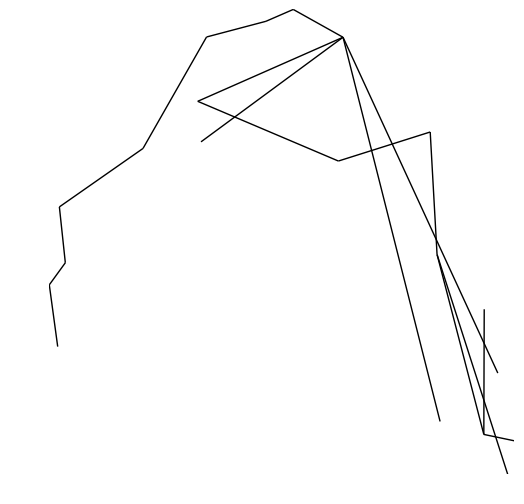

    After 20 iterations
        Discriminator Loss                         = -1.8764591217

    Generator_Loss: 4.17824888229
576
    After 20 iterations
        Discriminator Loss                         = -2.84727501869

    Generator_Loss: 14.2757616043
577
    After 20 iterations
        Discriminator Loss                         = -2.03798437119

    Generator_Loss: 10.8302297592
578
    After 20 iterations
        Discriminator Loss                         = -1.82395148277

    Generator_Loss: -1.64356732368
579
    After 20 iterations
        Discriminator Loss                         = -1.91733467579

    Generator_Loss: -4.48270225525
580
    After 20 iterations
        Discriminator Loss                         = -1.94718801975

    Generator_Loss: -10.1243257523
581
    After 20 iterations
        Discriminator Loss                         = -2.21107244492

    Generator_Loss: -17.5172958374
582
    After 20 iterations
        Discriminator Loss                         = -1.

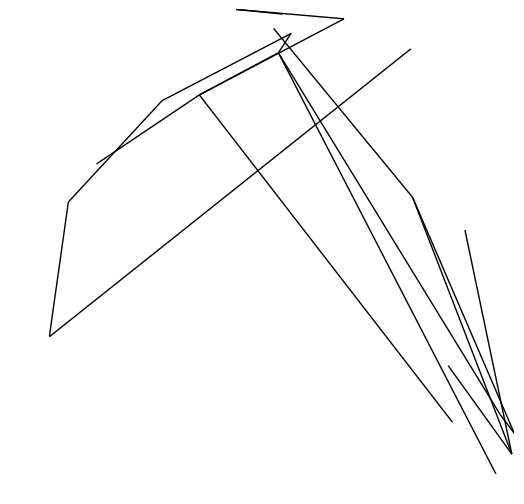

    After 20 iterations
        Discriminator Loss                         = -1.83821618557

    Generator_Loss: -25.4833698273
601
    After 20 iterations
        Discriminator Loss                         = -1.66888391972

    Generator_Loss: -3.13802957535
602
    After 20 iterations
        Discriminator Loss                         = -1.69123733044

    Generator_Loss: -6.17174005508
603
    After 20 iterations
        Discriminator Loss                         = -1.78648304939

    Generator_Loss: -8.31571006775
604
    After 20 iterations
        Discriminator Loss                         = -1.87925076485

    Generator_Loss: 9.56527328491
605
    After 20 iterations
        Discriminator Loss                         = -2.89080882072

    Generator_Loss: -8.33422660828
606
    After 20 iterations
        Discriminator Loss                         = -3.14195394516

    Generator_Loss: 1.35862267017
607
    After 20 iterations
        Discriminator Loss                         = -

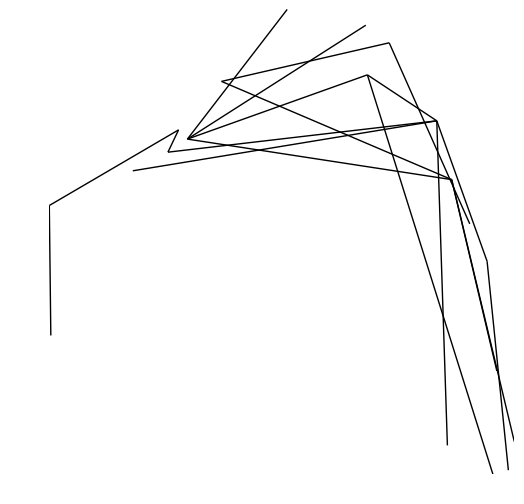

    After 20 iterations
        Discriminator Loss                         = -1.61597657204

    Generator_Loss: -11.2267866135
626
    After 20 iterations
        Discriminator Loss                         = -2.02530694008

    Generator_Loss: -15.7756748199
627
    After 20 iterations
        Discriminator Loss                         = -2.58839678764

    Generator_Loss: 1.87742376328
628
    After 20 iterations
        Discriminator Loss                         = -2.24869775772

    Generator_Loss: -24.0734825134
629
    After 20 iterations
        Discriminator Loss                         = -1.70030283928

    Generator_Loss: -5.70804357529
630
    After 20 iterations
        Discriminator Loss                         = -2.1559343338

    Generator_Loss: -32.0152587891
631
    After 20 iterations
        Discriminator Loss                         = -1.7467019558

    Generator_Loss: 8.24306678772
632
    After 20 iterations
        Discriminator Loss                         = -1.

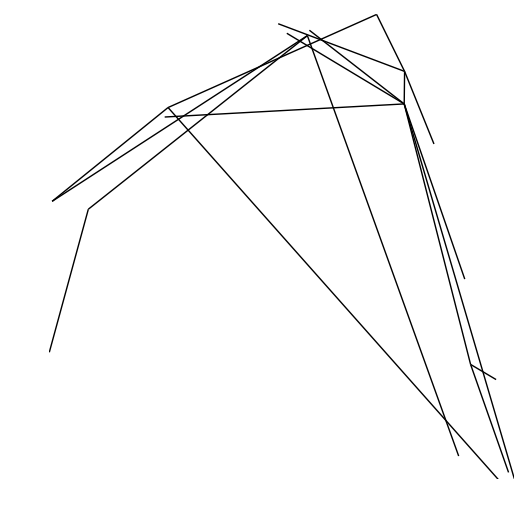

    After 20 iterations
        Discriminator Loss                         = -2.05465388298

    Generator_Loss: 12.0354270935
651
    After 20 iterations
        Discriminator Loss                         = -1.59196567535

    Generator_Loss: -10.233549118
652
    After 20 iterations
        Discriminator Loss                         = -2.67837047577

    Generator_Loss: -9.41783237457
653
    After 20 iterations
        Discriminator Loss                         = -1.71797704697

    Generator_Loss: -14.3671226501
654
    After 20 iterations
        Discriminator Loss                         = -2.6396112442

    Generator_Loss: -9.29738426208
655
    After 20 iterations
        Discriminator Loss                         = -1.97163963318

    Generator_Loss: -9.1956243515
656
    After 20 iterations
        Discriminator Loss                         = -1.75227093697

    Generator_Loss: -4.64550495148
657
    After 20 iterations
        Discriminator Loss                         = -2.

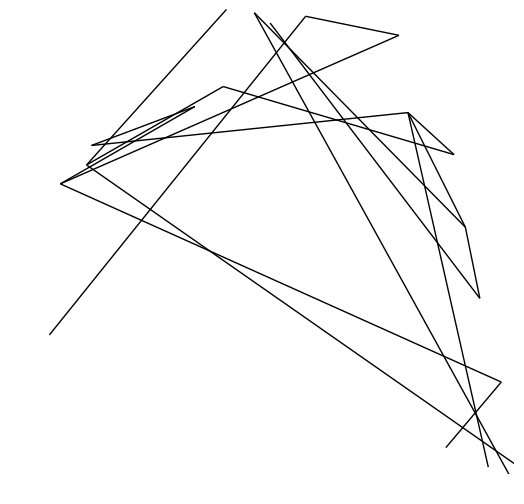

    After 20 iterations
        Discriminator Loss                         = -2.44595360756

    Generator_Loss: -16.0750274658
676
    After 20 iterations
        Discriminator Loss                         = -1.64783656597

    Generator_Loss: 8.17151832581
677
    After 20 iterations
        Discriminator Loss                         = -1.94621253014

    Generator_Loss: 12.5936803818
678
    After 20 iterations
        Discriminator Loss                         = -2.59668850899

    Generator_Loss: 22.2920455933
679
    After 20 iterations
        Discriminator Loss                         = -1.5584359169

    Generator_Loss: -8.1094417572
680
    After 20 iterations
        Discriminator Loss                         = -2.23220324516

    Generator_Loss: -24.920917511
681
    After 20 iterations
        Discriminator Loss                         = -2.12743616104

    Generator_Loss: -23.0462493896
682
    After 20 iterations
        Discriminator Loss                         = -1.79

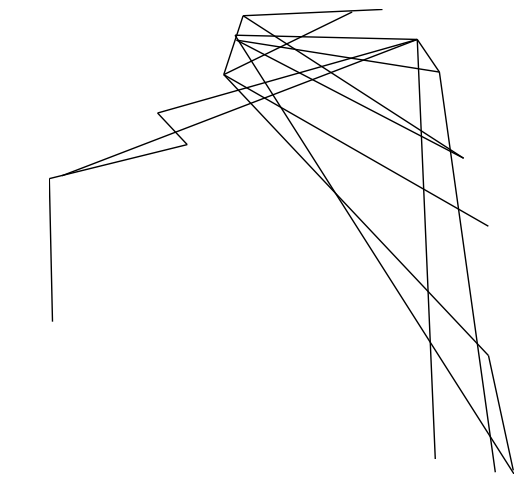

    After 20 iterations
        Discriminator Loss                         = -1.93857431412

    Generator_Loss: 11.9831209183
701
    After 20 iterations
        Discriminator Loss                         = -2.05045080185

    Generator_Loss: -5.93671941757
702
    After 20 iterations
        Discriminator Loss                         = -1.68074405193

    Generator_Loss: -8.82429695129
703
    After 20 iterations
        Discriminator Loss                         = -1.64110076427

    Generator_Loss: -16.5750637054
704
    After 20 iterations
        Discriminator Loss                         = -2.13157534599

    Generator_Loss: -2.37399411201
705
    After 20 iterations
        Discriminator Loss                         = -1.38981723785

    Generator_Loss: 1.92061960697
706
    After 20 iterations
        Discriminator Loss                         = -2.18659734726

    Generator_Loss: -27.7086601257
707
    After 20 iterations
        Discriminator Loss                         = -

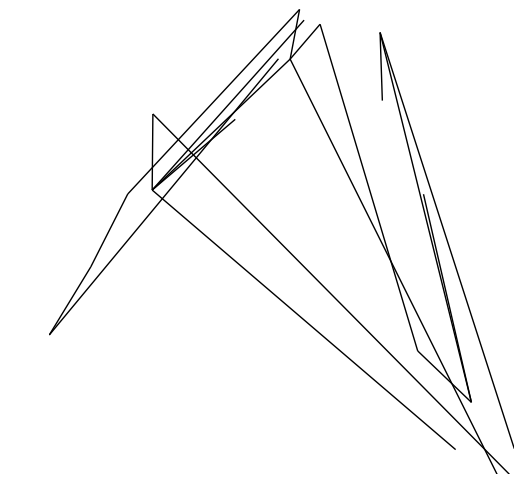

    After 20 iterations
        Discriminator Loss                         = -2.20960664749

    Generator_Loss: 6.32002878189
726
    After 20 iterations
        Discriminator Loss                         = -1.9312620163

    Generator_Loss: -12.9207191467
727
    After 20 iterations
        Discriminator Loss                         = -1.93848907948

    Generator_Loss: 7.30919837952
728
    After 20 iterations
        Discriminator Loss                         = -1.53133189678

    Generator_Loss: -24.1079368591
729
    After 20 iterations
        Discriminator Loss                         = -1.69115281105

    Generator_Loss: -2.6270442009
730
    After 20 iterations
        Discriminator Loss                         = -2.13292074203

    Generator_Loss: -15.4312057495
731
    After 20 iterations
        Discriminator Loss                         = -2.30800509453

    Generator_Loss: -17.1999931335
732
    After 20 iterations
        Discriminator Loss                         = -1.

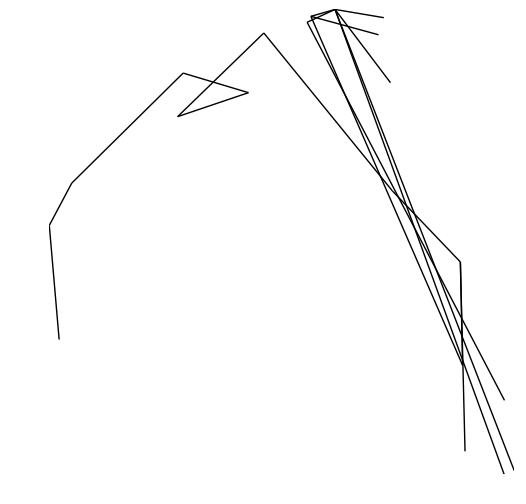

    After 20 iterations
        Discriminator Loss                         = -1.86836874485

    Generator_Loss: 12.2954263687
751
    After 20 iterations
        Discriminator Loss                         = -1.84974038601

    Generator_Loss: 6.64173841476
752
    After 20 iterations
        Discriminator Loss                         = -1.69720721245

    Generator_Loss: 2.01307630539
753
    After 20 iterations
        Discriminator Loss                         = -1.71151328087

    Generator_Loss: -12.5288171768
754
    After 20 iterations
        Discriminator Loss                         = -1.56474554539

    Generator_Loss: 4.72327566147
755
    After 20 iterations
        Discriminator Loss                         = -1.88370037079

    Generator_Loss: -9.66965293884
756
    After 20 iterations
        Discriminator Loss                         = -1.86196196079

    Generator_Loss: -29.3590660095
757
    After 20 iterations
        Discriminator Loss                         = -1.

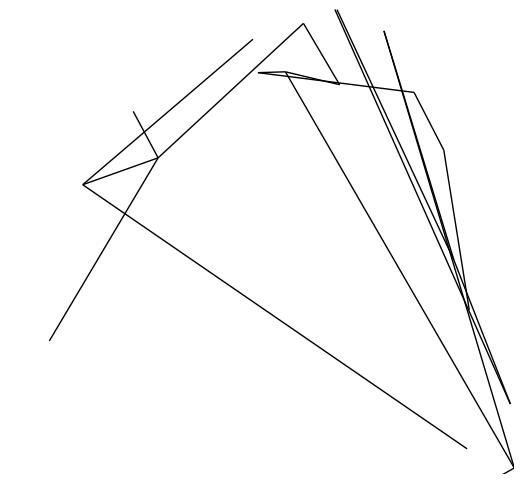

    After 20 iterations
        Discriminator Loss                         = -1.94375419617

    Generator_Loss: 20.4162406921
776
    After 20 iterations
        Discriminator Loss                         = -1.19662129879

    Generator_Loss: -17.6372585297
777
    After 20 iterations
        Discriminator Loss                         = -1.88077735901

    Generator_Loss: -17.2280235291
778
    After 20 iterations
        Discriminator Loss                         = -2.40272808075

    Generator_Loss: -33.3360710144
779
    After 20 iterations
        Discriminator Loss                         = -1.61440229416

    Generator_Loss: -9.8921995163
780
    After 20 iterations
        Discriminator Loss                         = -1.70216739178

    Generator_Loss: -18.4328289032
781

    Epoch #2

    After 20 iterations
        Discriminator Loss                         = -2.0483417511

    Generator_Loss: 10.9882459641
2
    After 20 iterations
        Discriminator Loss                 

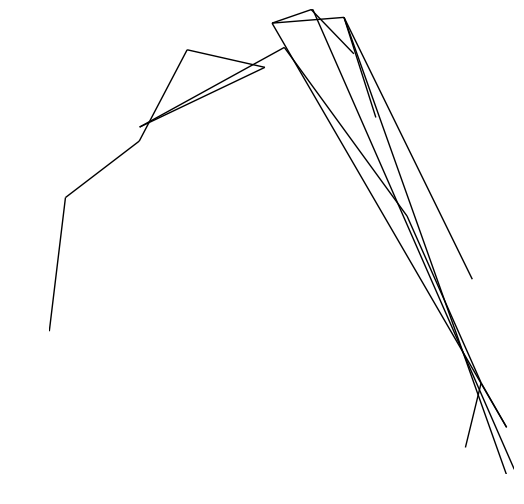

    After 20 iterations
        Discriminator Loss                         = -1.48038840294

    Generator_Loss: -20.528963089
26
    After 20 iterations
        Discriminator Loss                         = -2.51137709618

    Generator_Loss: -20.2296161652
27
    After 20 iterations
        Discriminator Loss                         = -2.26842069626

    Generator_Loss: 20.4628944397
28
    After 20 iterations
        Discriminator Loss                         = -1.88605713844

    Generator_Loss: -14.8313598633
29
    After 20 iterations
        Discriminator Loss                         = -1.26013970375

    Generator_Loss: -3.94493484497
30
    After 20 iterations
        Discriminator Loss                         = -2.24530744553

    Generator_Loss: 22.5643749237
31
    After 20 iterations
        Discriminator Loss                         = -2.15042448044

    Generator_Loss: -0.940626144409
32
    After 20 iterations
        Discriminator Loss                         = -2.33170

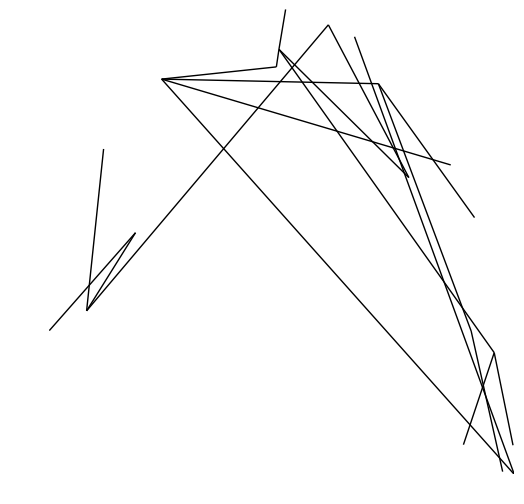

    After 20 iterations
        Discriminator Loss                         = -1.54627454281

    Generator_Loss: 11.7228183746
51
    After 20 iterations
        Discriminator Loss                         = -1.32380139828

    Generator_Loss: 7.95299863815
52
    After 20 iterations
        Discriminator Loss                         = -2.41908764839

    Generator_Loss: 14.1295309067
53
    After 20 iterations
        Discriminator Loss                         = -1.65275621414

    Generator_Loss: 17.7426185608
54
    After 20 iterations
        Discriminator Loss                         = -2.32433986664

    Generator_Loss: -3.23870611191
55
    After 20 iterations
        Discriminator Loss                         = -1.53775990009

    Generator_Loss: 11.1921405792
56
    After 20 iterations
        Discriminator Loss                         = -2.54375720024

    Generator_Loss: -30.745464325
57
    After 20 iterations
        Discriminator Loss                         = -1.641889452

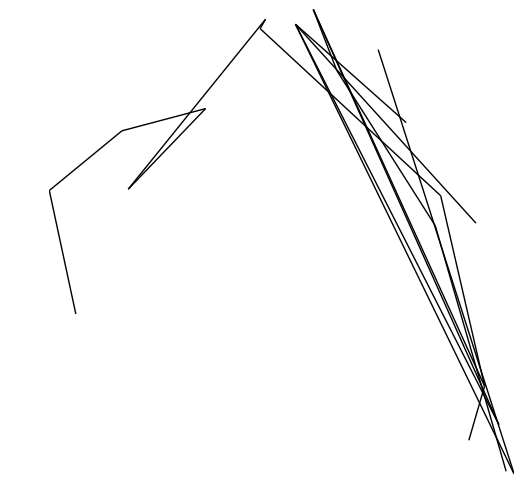

    After 20 iterations
        Discriminator Loss                         = -2.17081570625

    Generator_Loss: -19.4930763245
76
    After 20 iterations
        Discriminator Loss                         = -1.59499275684

    Generator_Loss: -30.4345626831
77
    After 20 iterations
        Discriminator Loss                         = -1.66932559013

    Generator_Loss: -4.57525444031
78
    After 20 iterations
        Discriminator Loss                         = -2.14938235283

    Generator_Loss: 6.68295717239
79
    After 20 iterations
        Discriminator Loss                         = -1.61571717262

    Generator_Loss: 2.0569589138
80
    After 20 iterations
        Discriminator Loss                         = -1.57144474983

    Generator_Loss: -13.6608848572
81
    After 20 iterations
        Discriminator Loss                         = -1.9885802269

    Generator_Loss: -18.2116508484
82
    After 20 iterations
        Discriminator Loss                         = -2.3196582

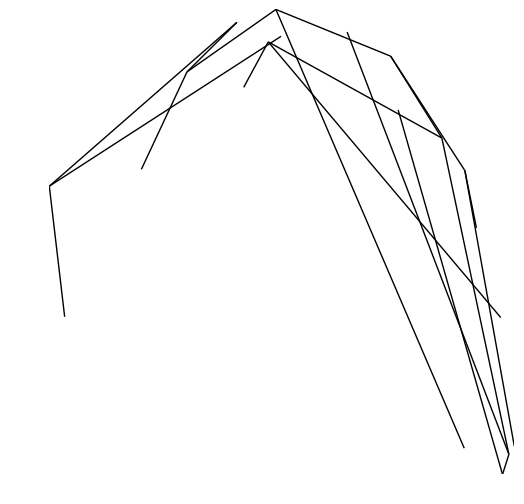

    After 20 iterations
        Discriminator Loss                         = -1.82854509354

    Generator_Loss: 5.08883523941
101
    After 20 iterations
        Discriminator Loss                         = -2.98001408577

    Generator_Loss: 19.9723453522
102
    After 20 iterations
        Discriminator Loss                         = -1.77916145325

    Generator_Loss: -23.3215236664
103
    After 20 iterations
        Discriminator Loss                         = -1.62330651283

    Generator_Loss: -21.3958015442
104
    After 20 iterations
        Discriminator Loss                         = -1.78783535957

    Generator_Loss: 1.55694377422
105
    After 20 iterations
        Discriminator Loss                         = -1.31353032589

    Generator_Loss: 6.17969036102
106
    After 20 iterations
        Discriminator Loss                         = -2.27849245071

    Generator_Loss: 14.2763986588
107
    After 20 iterations
        Discriminator Loss                         = -2.8

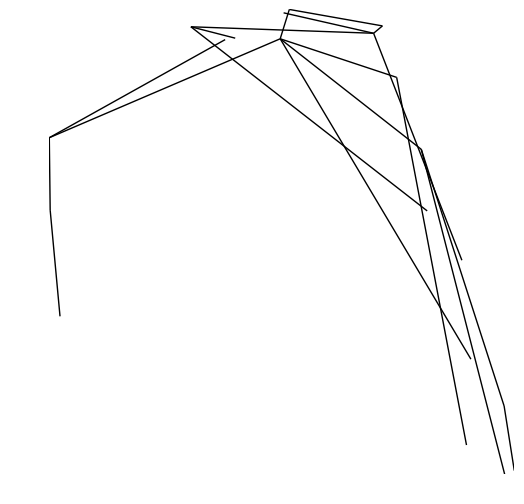

    After 20 iterations
        Discriminator Loss                         = -2.82531309128

    Generator_Loss: 13.7092027664
126
    After 20 iterations
        Discriminator Loss                         = -1.56059098244

    Generator_Loss: 12.625793457
127
    After 20 iterations
        Discriminator Loss                         = -1.9103000164

    Generator_Loss: -22.5443325043
128
    After 20 iterations
        Discriminator Loss                         = -1.52880144119

    Generator_Loss: -15.0353460312
129
    After 20 iterations
        Discriminator Loss                         = -1.66943836212

    Generator_Loss: -9.70736217499
130
    After 20 iterations
        Discriminator Loss                         = -1.85583770275

    Generator_Loss: -22.6915721893
131
    After 20 iterations
        Discriminator Loss                         = -1.74951732159

    Generator_Loss: -16.5262336731
132
    After 20 iterations
        Discriminator Loss                         = -2.

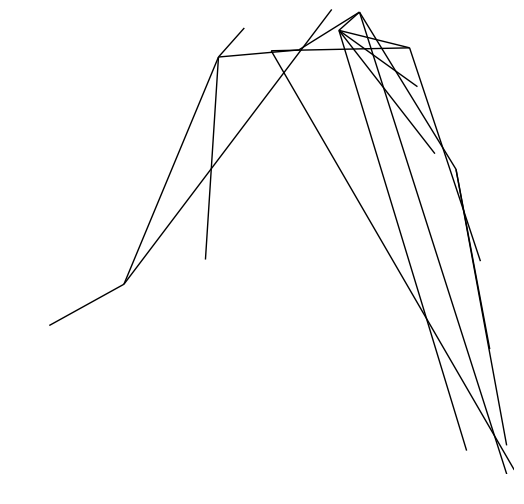

    After 20 iterations
        Discriminator Loss                         = -2.33562016487

    Generator_Loss: -8.66069030762
151
    After 20 iterations
        Discriminator Loss                         = -1.56739914417

    Generator_Loss: -4.51691579819
152
    After 20 iterations
        Discriminator Loss                         = -1.63290202618

    Generator_Loss: -5.24406957626
153
    After 20 iterations
        Discriminator Loss                         = -1.88780295849

    Generator_Loss: 13.7884283066
154
    After 20 iterations
        Discriminator Loss                         = -2.62857103348

    Generator_Loss: -1.43551945686
155
    After 20 iterations
        Discriminator Loss                         = -2.04203009605

    Generator_Loss: -4.782122612
156
    After 20 iterations
        Discriminator Loss                         = -1.47656095028

    Generator_Loss: 9.25771808624
157
    After 20 iterations
        Discriminator Loss                         = -2.

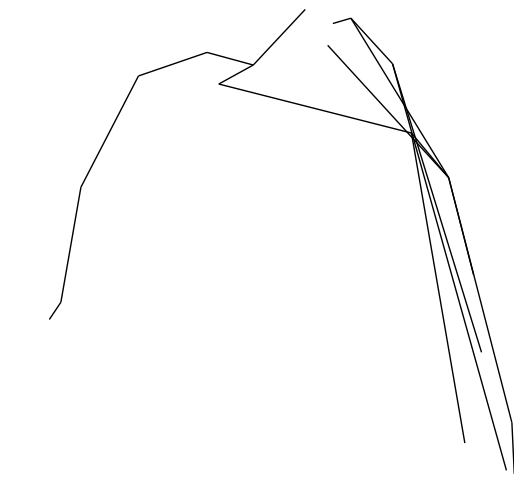

    After 20 iterations
        Discriminator Loss                         = -2.34809827805

    Generator_Loss: -6.61206102371
176
    After 20 iterations
        Discriminator Loss                         = -1.58792829514

    Generator_Loss: 2.46446204185
177
    After 20 iterations
        Discriminator Loss                         = -1.70422697067

    Generator_Loss: 18.1742324829
178
    After 20 iterations
        Discriminator Loss                         = -1.63718938828

    Generator_Loss: 11.0669898987
179
    After 20 iterations
        Discriminator Loss                         = -1.91334033012

    Generator_Loss: -23.6615104675
180
    After 20 iterations
        Discriminator Loss                         = -1.4702436924

    Generator_Loss: -21.2021865845
181
    After 20 iterations
        Discriminator Loss                         = -1.33442533016

    Generator_Loss: -20.1207408905
182
    After 20 iterations
        Discriminator Loss                         = -1.

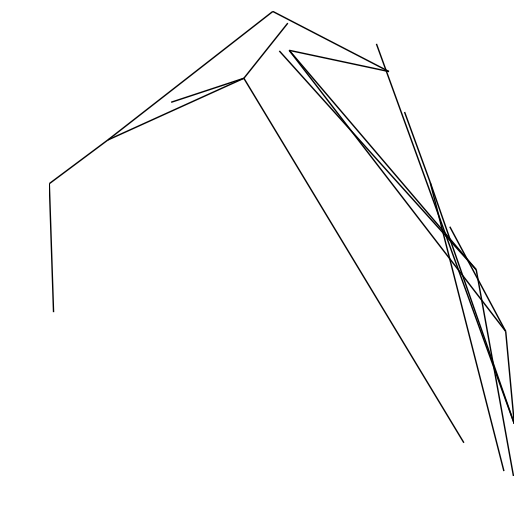

    After 20 iterations
        Discriminator Loss                         = -2.2034676075

    Generator_Loss: 9.40151691437
201
    After 20 iterations
        Discriminator Loss                         = -1.80114209652

    Generator_Loss: -8.53328990936
202
    After 20 iterations
        Discriminator Loss                         = -1.68202865124

    Generator_Loss: 19.0924434662
203
    After 20 iterations
        Discriminator Loss                         = -1.56112015247

    Generator_Loss: -18.8433456421
204
    After 20 iterations
        Discriminator Loss                         = -1.94182467461

    Generator_Loss: -32.3214073181
205
    After 20 iterations
        Discriminator Loss                         = -1.54285168648

    Generator_Loss: -11.7979221344
206
    After 20 iterations
        Discriminator Loss                         = -1.80591833591

    Generator_Loss: 17.4156532288
207
    After 20 iterations
        Discriminator Loss                         = -1.

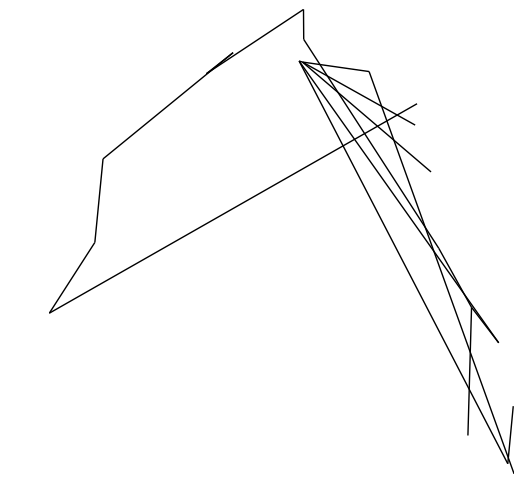

    After 20 iterations
        Discriminator Loss                         = -2.73091840744

    Generator_Loss: 21.6639232635
226
    After 20 iterations
        Discriminator Loss                         = -1.21970415115

    Generator_Loss: 13.3926391602
227
    After 20 iterations
        Discriminator Loss                         = -1.70675456524

    Generator_Loss: 15.6429672241
228
    After 20 iterations
        Discriminator Loss                         = -1.59509754181

    Generator_Loss: -1.52585375309
229
    After 20 iterations
        Discriminator Loss                         = -2.12211823463

    Generator_Loss: 0.0366279110312
230
    After 20 iterations
        Discriminator Loss                         = -1.41353201866

    Generator_Loss: 1.70929574966
231
    After 20 iterations
        Discriminator Loss                         = -1.85603034496

    Generator_Loss: -10.9470777512
232
    After 20 iterations
        Discriminator Loss                         = -1

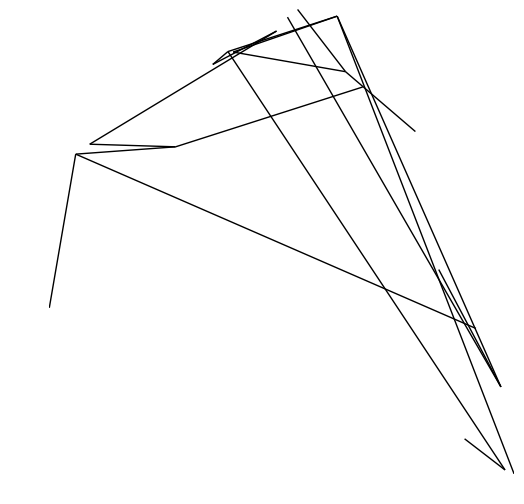

    After 20 iterations
        Discriminator Loss                         = -1.52801334858

    Generator_Loss: 14.8465690613
251
    After 20 iterations
        Discriminator Loss                         = -2.25370168686

    Generator_Loss: 8.63324356079
252
    After 20 iterations
        Discriminator Loss                         = -3.3765642643

    Generator_Loss: 21.4815387726
253
    After 20 iterations
        Discriminator Loss                         = -1.72039103508

    Generator_Loss: 13.2807359695
254
    After 20 iterations
        Discriminator Loss                         = -1.64395797253

    Generator_Loss: -14.0702342987
255
    After 20 iterations
        Discriminator Loss                         = -1.83810961246

    Generator_Loss: 14.7171821594
256
    After 20 iterations
        Discriminator Loss                         = -1.95517170429

    Generator_Loss: -11.6899499893
257
    After 20 iterations
        Discriminator Loss                         = -1.45

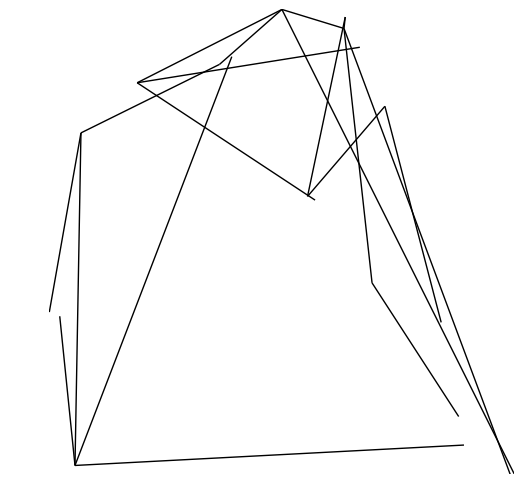

    After 20 iterations
        Discriminator Loss                         = -1.18433856964

    Generator_Loss: -8.12423229218
276
    After 20 iterations
        Discriminator Loss                         = -1.92724895477

    Generator_Loss: -4.74510717392
277
    After 20 iterations
        Discriminator Loss                         = -1.55670511723

    Generator_Loss: -24.7467784882
278
    After 20 iterations
        Discriminator Loss                         = -1.41254723072

    Generator_Loss: 6.18176746368
279
    After 20 iterations
        Discriminator Loss                         = -1.80075609684

    Generator_Loss: 3.66630458832
280
    After 20 iterations
        Discriminator Loss                         = -1.66251087189

    Generator_Loss: 2.59987401962
281
    After 20 iterations
        Discriminator Loss                         = -1.46572268009

    Generator_Loss: 1.08243334293
282
    After 20 iterations
        Discriminator Loss                         = -1.

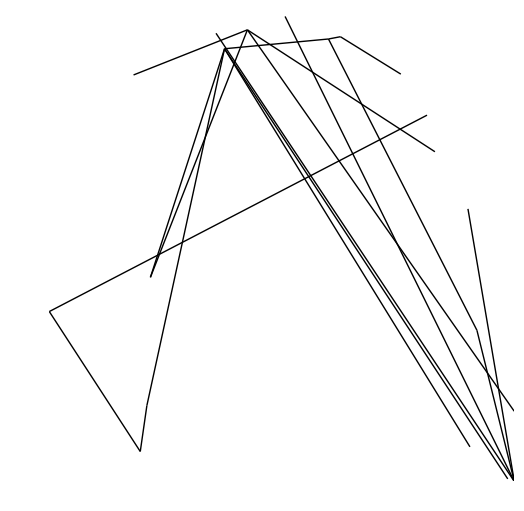

    After 20 iterations
        Discriminator Loss                         = -1.66636621952

    Generator_Loss: 19.3898887634
301
    After 20 iterations
        Discriminator Loss                         = -2.3062813282

    Generator_Loss: 21.3801670074
302
    After 20 iterations
        Discriminator Loss                         = -1.87213301659

    Generator_Loss: 6.60486364365
303
    After 20 iterations
        Discriminator Loss                         = -1.50758254528

    Generator_Loss: -18.7810726166
304
    After 20 iterations
        Discriminator Loss                         = -1.73646783829

    Generator_Loss: -10.5317554474
305
    After 20 iterations
        Discriminator Loss                         = -1.45243132114

    Generator_Loss: 13.9870615005
306
    After 20 iterations
        Discriminator Loss                         = -2.22953271866

    Generator_Loss: -33.4123382568
307
    After 20 iterations
        Discriminator Loss                         = -1.4

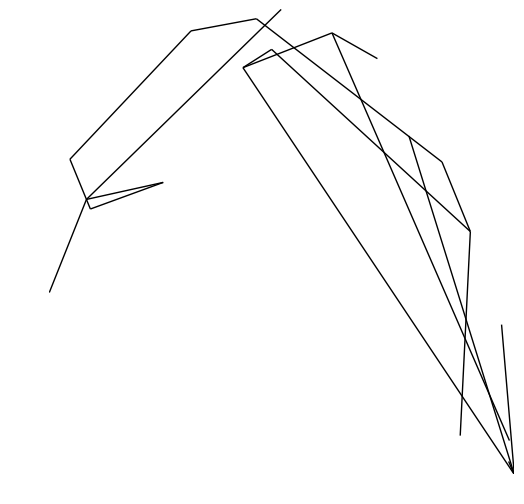

    After 20 iterations
        Discriminator Loss                         = -2.65035295486

    Generator_Loss: 24.1325321198
326
    After 20 iterations
        Discriminator Loss                         = -1.77685534954

    Generator_Loss: 15.7818899155
327
    After 20 iterations
        Discriminator Loss                         = -1.28580141068

    Generator_Loss: 3.56033778191
328
    After 20 iterations
        Discriminator Loss                         = -2.12028646469

    Generator_Loss: -7.3386425972
329
    After 20 iterations
        Discriminator Loss                         = -1.1488121748

    Generator_Loss: 10.3982067108
330
    After 20 iterations
        Discriminator Loss                         = -1.49296891689

    Generator_Loss: -9.15911006927
331
    After 20 iterations
        Discriminator Loss                         = -1.72591590881

    Generator_Loss: -26.1473255157
332
    After 20 iterations
        Discriminator Loss                         = -1.83

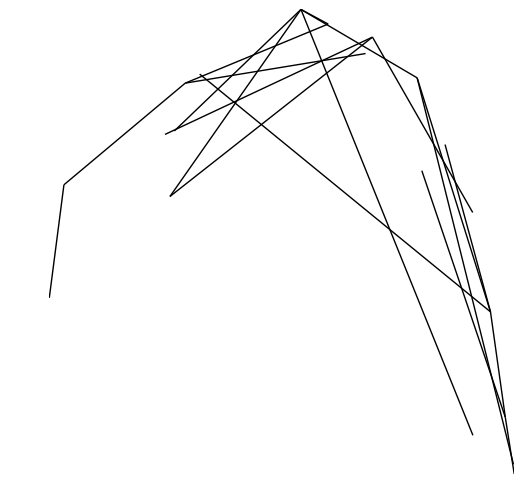

    After 20 iterations
        Discriminator Loss                         = -1.4551705122

    Generator_Loss: -21.8584442139
351
    After 20 iterations
        Discriminator Loss                         = -1.62680768967

    Generator_Loss: 1.87753629684
352
    After 20 iterations
        Discriminator Loss                         = -1.46229445934

    Generator_Loss: -5.11029148102
353
    After 20 iterations
        Discriminator Loss                         = -2.3208463192

    Generator_Loss: -1.39817631245
354
    After 20 iterations
        Discriminator Loss                         = -1.76438784599

    Generator_Loss: -17.1980190277
355
    After 20 iterations
        Discriminator Loss                         = -1.9771541357

    Generator_Loss: 16.5271968842
356
    After 20 iterations
        Discriminator Loss                         = -2.05824995041

    Generator_Loss: -17.9582557678
357
    After 20 iterations
        Discriminator Loss                         = -2.6

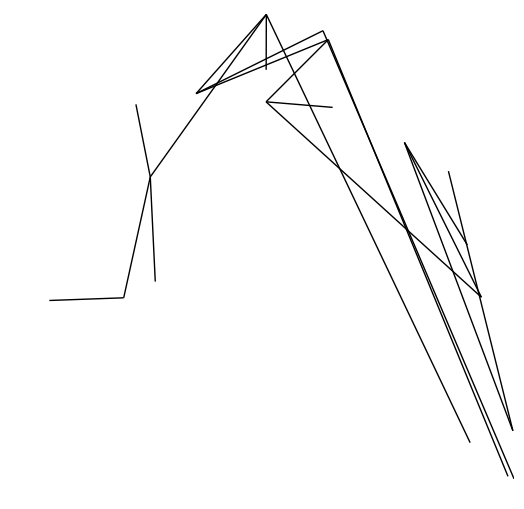

    After 20 iterations
        Discriminator Loss                         = -1.57544636726

    Generator_Loss: -13.6578111649
376
    After 20 iterations
        Discriminator Loss                         = -1.39560329914

    Generator_Loss: 13.6870718002
377
    After 20 iterations
        Discriminator Loss                         = -2.12731480598

    Generator_Loss: 14.0450925827
378
    After 20 iterations
        Discriminator Loss                         = -1.96423447132

    Generator_Loss: -29.1019668579
379
    After 20 iterations
        Discriminator Loss                         = -2.08510756493

    Generator_Loss: 20.005241394
380
    After 20 iterations
        Discriminator Loss                         = -1.50368142128

    Generator_Loss: 11.1346654892
381
    After 20 iterations
        Discriminator Loss                         = -2.16437768936

    Generator_Loss: -6.65471124649
382
    After 20 iterations
        Discriminator Loss                         = -1.5

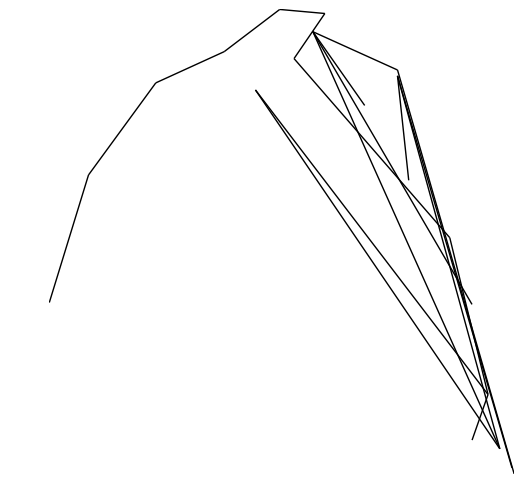

    After 20 iterations
        Discriminator Loss                         = -2.51797556877

    Generator_Loss: 2.41031861305
401
    After 20 iterations
        Discriminator Loss                         = -1.45510995388

    Generator_Loss: 3.61510753632
402
    After 20 iterations
        Discriminator Loss                         = -1.93526387215

    Generator_Loss: 22.8737716675
403
    After 20 iterations
        Discriminator Loss                         = -1.83868169785

    Generator_Loss: -11.1483917236
404
    After 20 iterations
        Discriminator Loss                         = -1.96835398674

    Generator_Loss: 15.9303379059
405
    After 20 iterations
        Discriminator Loss                         = -1.34047079086

    Generator_Loss: -5.68732309341
406
    After 20 iterations
        Discriminator Loss                         = -1.42294001579

    Generator_Loss: -11.9370679855
407
    After 20 iterations
        Discriminator Loss                         = -2.

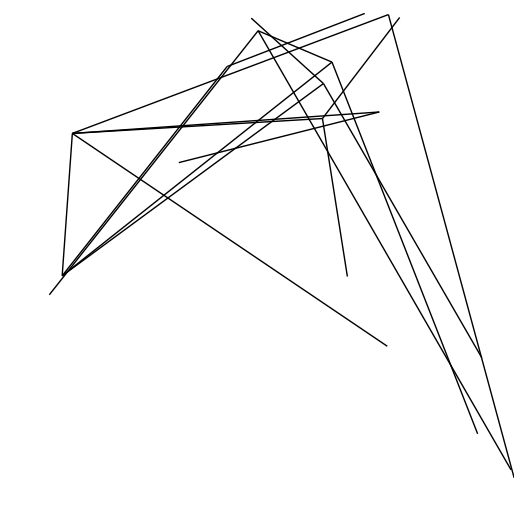

    After 20 iterations
        Discriminator Loss                         = -2.44126749039

    Generator_Loss: 7.19337272644
426
    After 20 iterations
        Discriminator Loss                         = -1.28689920902

    Generator_Loss: -9.14125347137
427
    After 20 iterations
        Discriminator Loss                         = -2.35503315926

    Generator_Loss: -29.5307025909
428
    After 20 iterations
        Discriminator Loss                         = -1.92759227753

    Generator_Loss: 4.56474494934
429
    After 20 iterations
        Discriminator Loss                         = -1.79046177864

    Generator_Loss: 3.44965100288
430
    After 20 iterations
        Discriminator Loss                         = -1.40889847279

    Generator_Loss: -3.07460451126
431
    After 20 iterations
        Discriminator Loss                         = -1.31652057171

    Generator_Loss: -17.281375885
432
    After 20 iterations
        Discriminator Loss                         = -1.

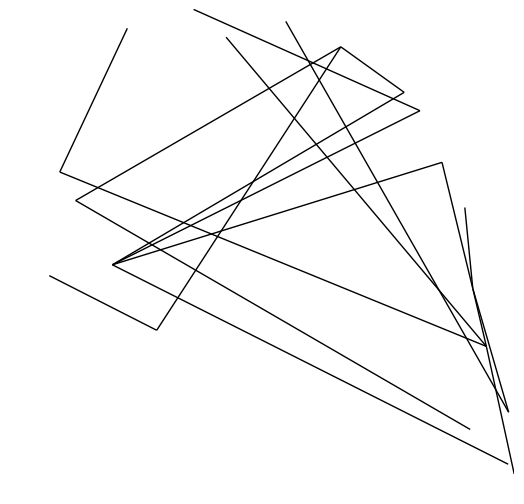

    After 20 iterations
        Discriminator Loss                         = -1.59378492832

    Generator_Loss: -8.67978572845
451
    After 20 iterations
        Discriminator Loss                         = -1.3952422142

    Generator_Loss: -8.05098724365
452
    After 20 iterations
        Discriminator Loss                         = -1.57572126389

    Generator_Loss: 2.54717898369
453
    After 20 iterations
        Discriminator Loss                         = -1.57143461704

    Generator_Loss: 6.4986615181
454
    After 20 iterations
        Discriminator Loss                         = -1.63298785686

    Generator_Loss: -15.3444776535
455
    After 20 iterations
        Discriminator Loss                         = -2.07702970505

    Generator_Loss: 5.62535142899
456
    After 20 iterations
        Discriminator Loss                         = -2.23587942123

    Generator_Loss: -16.5466747284
457
    After 20 iterations
        Discriminator Loss                         = -1.6

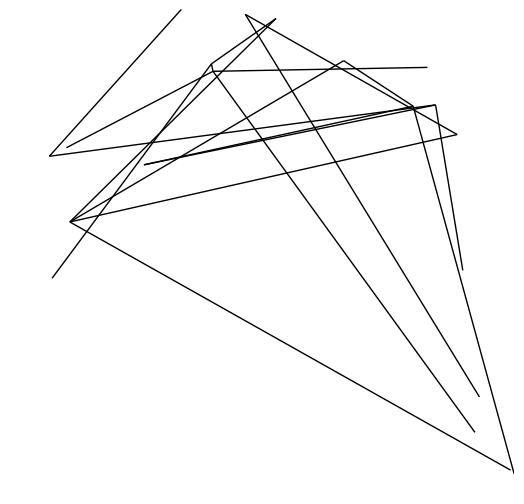

    After 20 iterations
        Discriminator Loss                         = -1.33330500126

    Generator_Loss: -10.1854324341
476
    After 20 iterations
        Discriminator Loss                         = -2.20553994179

    Generator_Loss: -6.66959619522
477
    After 20 iterations
        Discriminator Loss                         = -1.42173218727

    Generator_Loss: -5.67994642258
478
    After 20 iterations
        Discriminator Loss                         = -1.41844010353

    Generator_Loss: -0.203651055694
479
    After 20 iterations
        Discriminator Loss                         = -2.47529530525

    Generator_Loss: -3.42688298225
480
    After 20 iterations
        Discriminator Loss                         = -1.73020088673

    Generator_Loss: -14.723200798
481
    After 20 iterations
        Discriminator Loss                         = -2.49278450012

    Generator_Loss: 17.2724761963
482
    After 20 iterations
        Discriminator Loss                         = 

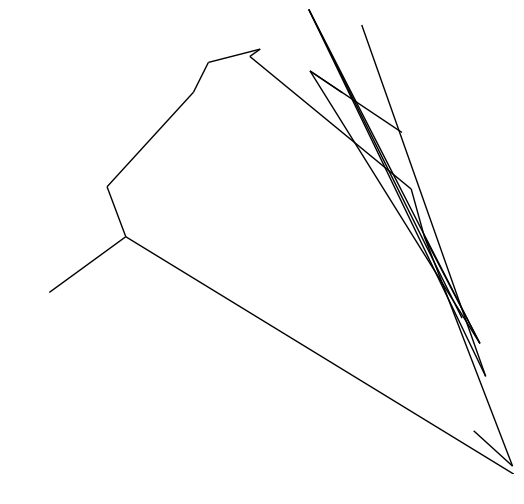

    After 20 iterations
        Discriminator Loss                         = -1.45176887512

    Generator_Loss: 9.79080677032
501
    After 20 iterations
        Discriminator Loss                         = -1.94910633564

    Generator_Loss: 10.5465650558
502
    After 20 iterations
        Discriminator Loss                         = -1.40947234631

    Generator_Loss: -4.12995529175
503
    After 20 iterations
        Discriminator Loss                         = -1.47000408173

    Generator_Loss: 14.2231988907
504
    After 20 iterations
        Discriminator Loss                         = -2.07629585266

    Generator_Loss: 6.83845615387
505
    After 20 iterations
        Discriminator Loss                         = -1.53106617928

    Generator_Loss: -11.8201026917
506
    After 20 iterations
        Discriminator Loss                         = -1.76034522057

    Generator_Loss: -10.5420751572
507
    After 20 iterations
        Discriminator Loss                         = -1.

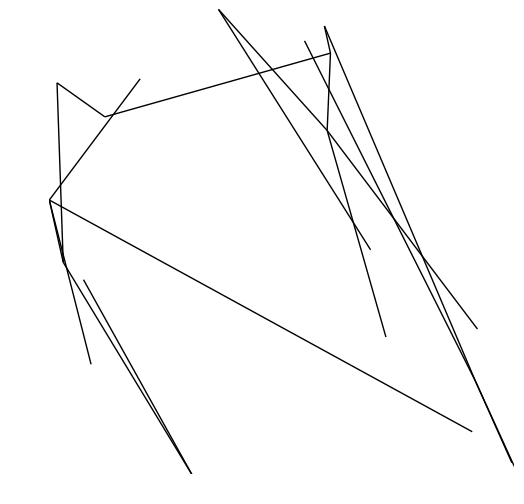

    After 20 iterations
        Discriminator Loss                         = -1.47411441803

    Generator_Loss: -7.20075035095
526
    After 20 iterations
        Discriminator Loss                         = -1.48720133305

    Generator_Loss: -28.4593830109
527
    After 20 iterations
        Discriminator Loss                         = -1.24247014523

    Generator_Loss: 10.8347082138
528
    After 20 iterations
        Discriminator Loss                         = -1.93131649494

    Generator_Loss: -18.9563045502
529
    After 20 iterations
        Discriminator Loss                         = -2.09706926346

    Generator_Loss: 23.6121959686
530
    After 20 iterations
        Discriminator Loss                         = -1.67767417431

    Generator_Loss: -2.6872048378
531
    After 20 iterations
        Discriminator Loss                         = -1.67551934719

    Generator_Loss: 7.3052148819
532
    After 20 iterations
        Discriminator Loss                         = -1.9

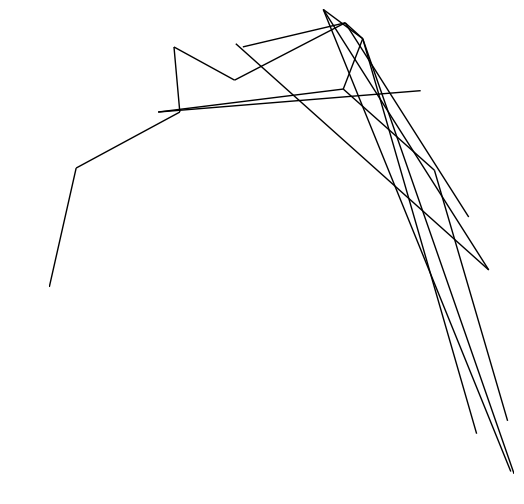

    After 20 iterations
        Discriminator Loss                         = -1.87612521648

    Generator_Loss: -12.9555540085
551
    After 20 iterations
        Discriminator Loss                         = -2.57516336441

    Generator_Loss: 0.432491928339
552
    After 20 iterations
        Discriminator Loss                         = -2.37002062798

    Generator_Loss: 24.6625175476
553
    After 20 iterations
        Discriminator Loss                         = -1.3549298048

    Generator_Loss: 5.30928611755
554
    After 20 iterations
        Discriminator Loss                         = -2.20105314255

    Generator_Loss: 18.3637733459
555
    After 20 iterations
        Discriminator Loss                         = -2.28749442101

    Generator_Loss: -35.8190803528
556
    After 20 iterations
        Discriminator Loss                         = -1.12632894516

    Generator_Loss: 2.96712255478
557
    After 20 iterations
        Discriminator Loss                         = -1.5

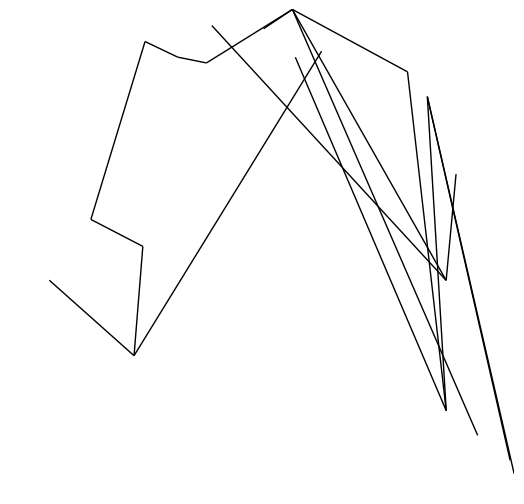

    After 20 iterations
        Discriminator Loss                         = -1.48796606064

    Generator_Loss: 11.4567184448
576
    After 20 iterations
        Discriminator Loss                         = -2.39021134377

    Generator_Loss: 16.3364524841
577
    After 20 iterations
        Discriminator Loss                         = -1.74097597599

    Generator_Loss: 15.8365097046
578
    After 20 iterations
        Discriminator Loss                         = -1.56387495995

    Generator_Loss: 5.52667856216
579
    After 20 iterations
        Discriminator Loss                         = -1.59888195992

    Generator_Loss: -3.15360593796
580
    After 20 iterations
        Discriminator Loss                         = -1.58422768116

    Generator_Loss: -5.89991092682
581
    After 20 iterations
        Discriminator Loss                         = -1.76465201378

    Generator_Loss: -14.7257652283
582
    After 20 iterations
        Discriminator Loss                         = -1.

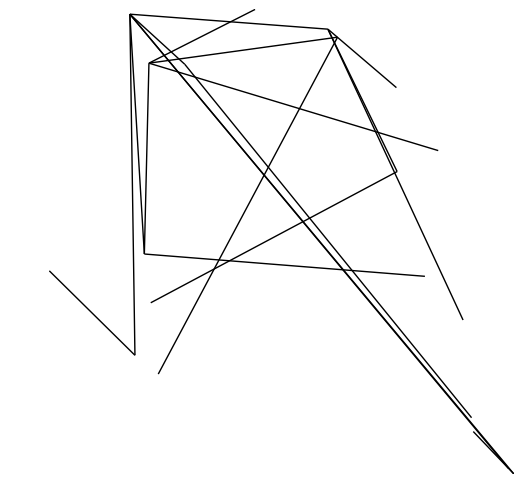

    After 20 iterations
        Discriminator Loss                         = -1.41958284378

    Generator_Loss: -17.9631900787
601
    After 20 iterations
        Discriminator Loss                         = -1.28422117233

    Generator_Loss: 0.647345721722
602
    After 20 iterations
        Discriminator Loss                         = -1.44254612923

    Generator_Loss: -0.981526017189
603
    After 20 iterations
        Discriminator Loss                         = -1.60215258598

    Generator_Loss: -6.87108755112
604
    After 20 iterations
        Discriminator Loss                         = -1.49604058266

    Generator_Loss: 14.5649900436
605
    After 20 iterations
        Discriminator Loss                         = -2.70387244225

    Generator_Loss: -9.50277709961
606
    After 20 iterations
        Discriminator Loss                         = -2.72133398056

    Generator_Loss: -0.586453437805
607
    After 20 iterations
        Discriminator Loss                         

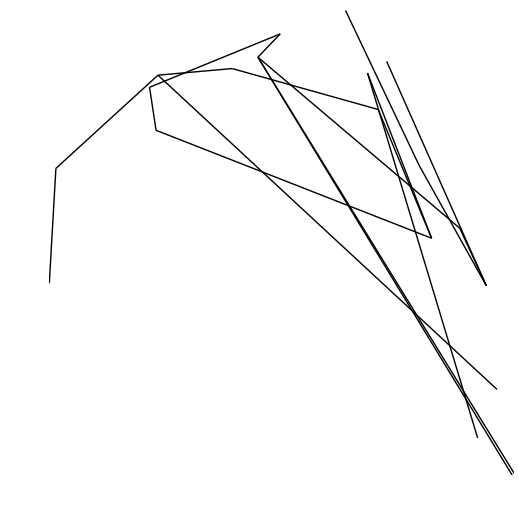

    After 20 iterations
        Discriminator Loss                         = -1.43801057339

    Generator_Loss: -13.8798465729
626
    After 20 iterations
        Discriminator Loss                         = -1.5773857832

    Generator_Loss: -15.4849824905
627
    After 20 iterations
        Discriminator Loss                         = -2.60880374908

    Generator_Loss: 7.37755346298
628
    After 20 iterations
        Discriminator Loss                         = -2.13993096352

    Generator_Loss: -19.8386039734
629
    After 20 iterations
        Discriminator Loss                         = -1.25347900391

    Generator_Loss: -6.84008073807
630
    After 20 iterations
        Discriminator Loss                         = -2.04546046257

    Generator_Loss: -32.7698326111
631
    After 20 iterations
        Discriminator Loss                         = -1.45924901962

    Generator_Loss: 5.16028499603
632
    After 20 iterations
        Discriminator Loss                         = -1

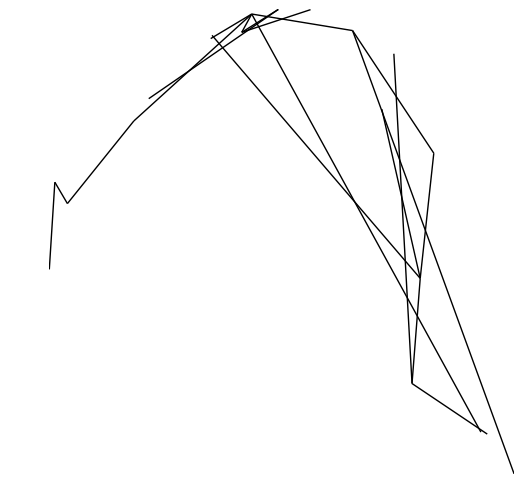

    After 20 iterations
        Discriminator Loss                         = -1.82757592201

    Generator_Loss: 20.770154953
651
    After 20 iterations
        Discriminator Loss                         = -1.33185780048

    Generator_Loss: -12.4582605362
652
    After 20 iterations
        Discriminator Loss                         = -2.24145793915

    Generator_Loss: -13.8035736084
653
    After 20 iterations
        Discriminator Loss                         = -1.74833250046

    Generator_Loss: -13.7319841385
654
    After 20 iterations
        Discriminator Loss                         = -2.57475662231

    Generator_Loss: -8.80889606476
655
    After 20 iterations
        Discriminator Loss                         = -1.70490562916

    Generator_Loss: -6.9578127861
656
    After 20 iterations
        Discriminator Loss                         = -1.40330696106

    Generator_Loss: -2.03683185577
657
    After 20 iterations
        Discriminator Loss                         = -1

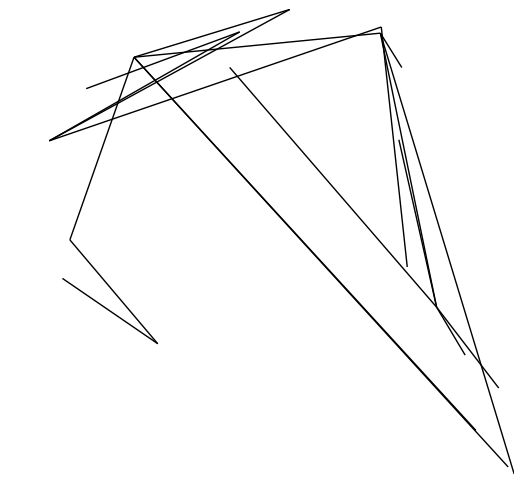

    After 20 iterations
        Discriminator Loss                         = -2.18203997612

    Generator_Loss: -17.0528125763
676
    After 20 iterations
        Discriminator Loss                         = -1.37668097019

    Generator_Loss: 5.02177381516
677
    After 20 iterations
        Discriminator Loss                         = -1.63660299778

    Generator_Loss: 19.6043510437
678
    After 20 iterations
        Discriminator Loss                         = -2.2839744091

    Generator_Loss: 25.3122196198
679
    After 20 iterations
        Discriminator Loss                         = -1.34843146801

    Generator_Loss: -2.28183174133
680
    After 20 iterations
        Discriminator Loss                         = -2.24774074554

    Generator_Loss: -17.3241004944
681
    After 20 iterations
        Discriminator Loss                         = -1.7333958149

    Generator_Loss: -24.8743457794
682
    After 20 iterations
        Discriminator Loss                         = -1.7

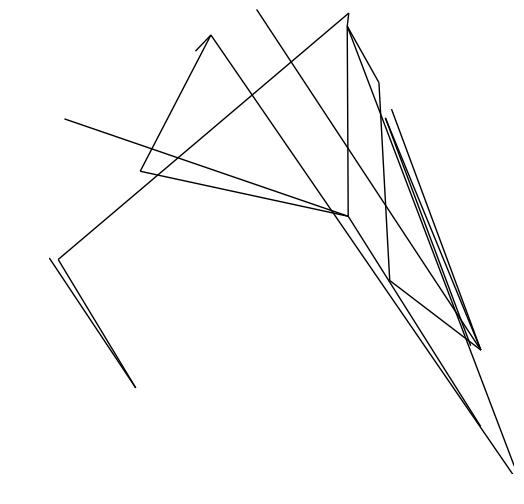

    After 20 iterations
        Discriminator Loss                         = -1.7320536375

    Generator_Loss: 16.2670478821
701
    After 20 iterations
        Discriminator Loss                         = -1.74162697792

    Generator_Loss: -7.16440343857
702
    After 20 iterations
        Discriminator Loss                         = -1.4798964262

    Generator_Loss: -3.94700193405
703
    After 20 iterations
        Discriminator Loss                         = -1.56094110012

    Generator_Loss: -22.0521621704
704
    After 20 iterations
        Discriminator Loss                         = -1.9389193058

    Generator_Loss: -0.567749023438
705
    After 20 iterations
        Discriminator Loss                         = -1.10189044476

    Generator_Loss: 5.01401853561
706
    After 20 iterations
        Discriminator Loss                         = -2.23418498039

    Generator_Loss: -27.8928871155
707
    After 20 iterations
        Discriminator Loss                         = -2.

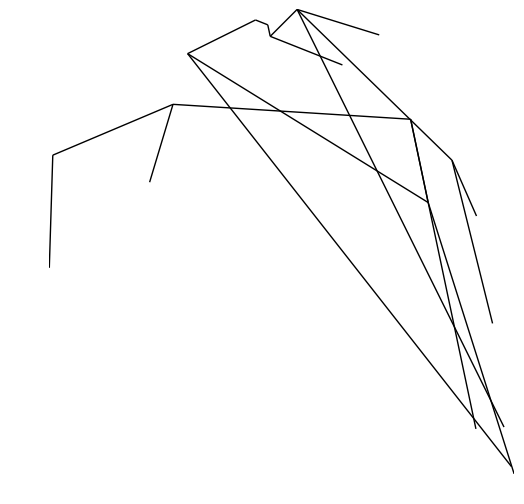

    After 20 iterations
        Discriminator Loss                         = -2.13474678993

    Generator_Loss: 4.64960956573
726
    After 20 iterations
        Discriminator Loss                         = -1.62296748161

    Generator_Loss: -9.55033874512
727
    After 20 iterations
        Discriminator Loss                         = -1.73732292652

    Generator_Loss: 6.72616815567
728
    After 20 iterations
        Discriminator Loss                         = -1.21534836292

    Generator_Loss: -24.2737140656
729
    After 20 iterations
        Discriminator Loss                         = -1.53907072544

    Generator_Loss: 6.93063592911
730
    After 20 iterations
        Discriminator Loss                         = -1.95112812519

    Generator_Loss: -2.82551646233
731
    After 20 iterations
        Discriminator Loss                         = -2.2448143959

    Generator_Loss: -13.5217695236
732
    After 20 iterations
        Discriminator Loss                         = -1.

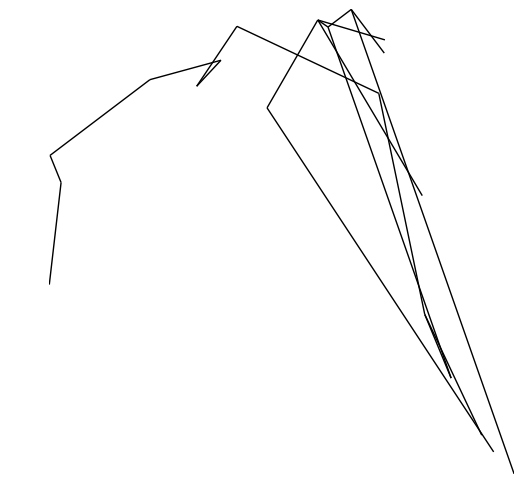

    After 20 iterations
        Discriminator Loss                         = -1.67829966545

    Generator_Loss: 17.6021709442
751
    After 20 iterations
        Discriminator Loss                         = -1.60504543781

    Generator_Loss: 10.1406259537
752
    After 20 iterations
        Discriminator Loss                         = -1.43986833096

    Generator_Loss: 4.00327682495
753
    After 20 iterations
        Discriminator Loss                         = -1.58710980415

    Generator_Loss: -14.0179815292
754
    After 20 iterations
        Discriminator Loss                         = -1.38314330578

    Generator_Loss: 11.1337795258
755
    After 20 iterations
        Discriminator Loss                         = -1.60109555721

    Generator_Loss: -7.33082389832
756
    After 20 iterations
        Discriminator Loss                         = -1.57592904568

    Generator_Loss: -32.2122039795
757
    After 20 iterations
        Discriminator Loss                         = -1.

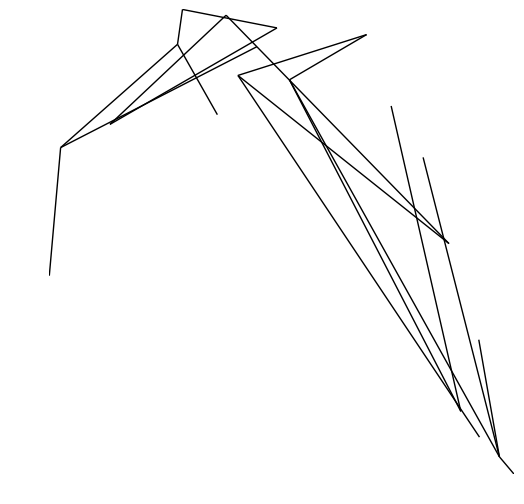

    After 20 iterations
        Discriminator Loss                         = -1.68115162849

    Generator_Loss: 23.6622390747
776
    After 20 iterations
        Discriminator Loss                         = -1.1649273634

    Generator_Loss: -19.3469753265
777
    After 20 iterations
        Discriminator Loss                         = -1.73452913761

    Generator_Loss: -12.4665622711
778
    After 20 iterations
        Discriminator Loss                         = -2.46773338318

    Generator_Loss: -33.1790542603
779
    After 20 iterations
        Discriminator Loss                         = -1.27238810062

    Generator_Loss: -3.68730735779
780
    After 20 iterations
        Discriminator Loss                         = -1.36565053463

    Generator_Loss: -19.4976215363
781

    Epoch #3

    After 20 iterations
        Discriminator Loss                         = -1.69820141792

    Generator_Loss: 4.66013622284
2
    After 20 iterations
        Discriminator Loss                

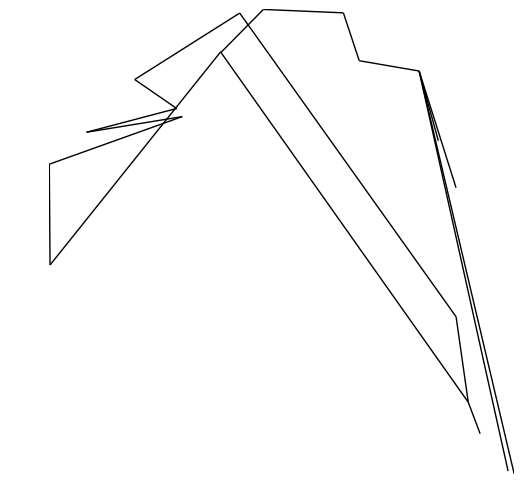

    After 20 iterations
        Discriminator Loss                         = -1.44913613796

    Generator_Loss: -14.3901777267
26
    After 20 iterations
        Discriminator Loss                         = -2.39317154884

    Generator_Loss: -18.4715442657
27
    After 20 iterations
        Discriminator Loss                         = -1.85081720352

    Generator_Loss: 17.9414749146
28
    After 20 iterations
        Discriminator Loss                         = -1.63378441334

    Generator_Loss: -16.2169475555
29
    After 20 iterations
        Discriminator Loss                         = -1.06703197956

    Generator_Loss: -2.24839901924
30
    After 20 iterations
        Discriminator Loss                         = -2.09866547585

    Generator_Loss: 26.371799469
31
    After 20 iterations
        Discriminator Loss                         = -2.23267316818

    Generator_Loss: -1.00462806225
32
    After 20 iterations
        Discriminator Loss                         = -2.111076

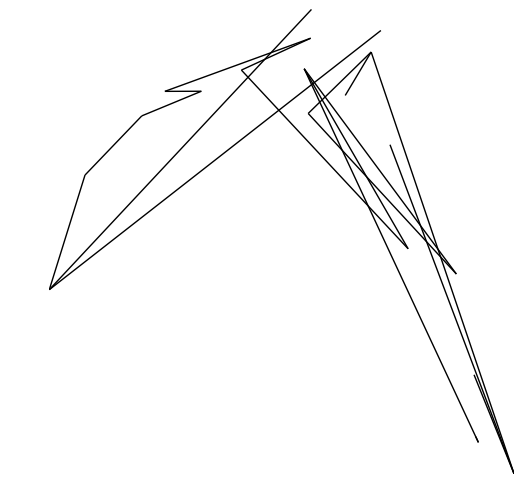

    After 20 iterations
        Discriminator Loss                         = -1.54692745209

    Generator_Loss: 18.7491569519
51
    After 20 iterations
        Discriminator Loss                         = -1.12783575058

    Generator_Loss: 6.58581113815
52
    After 20 iterations
        Discriminator Loss                         = -2.29186654091

    Generator_Loss: 13.6127033234
53
    After 20 iterations
        Discriminator Loss                         = -1.3655602932

    Generator_Loss: 16.2849388123
54
    After 20 iterations
        Discriminator Loss                         = -2.0421974659

    Generator_Loss: 1.62305188179
55
    After 20 iterations
        Discriminator Loss                         = -1.44289672375

    Generator_Loss: 9.5174741745
56
    After 20 iterations
        Discriminator Loss                         = -2.45877218246

    Generator_Loss: -24.9012355804
57
    After 20 iterations
        Discriminator Loss                         = -1.60529267788


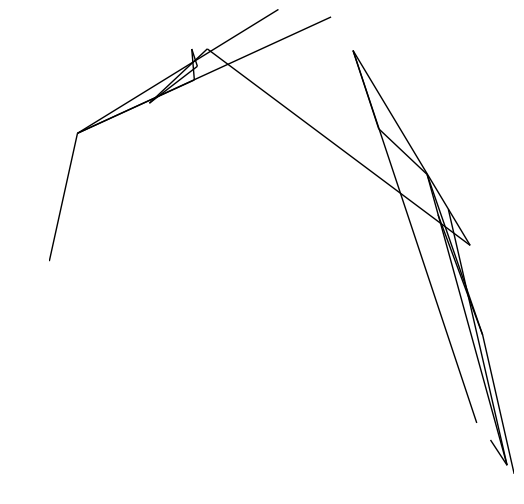

    After 20 iterations
        Discriminator Loss                         = -2.08270955086

    Generator_Loss: -11.2868862152
76
    After 20 iterations
        Discriminator Loss                         = -1.70883512497

    Generator_Loss: -35.1490974426
77
    After 20 iterations
        Discriminator Loss                         = -1.49886369705

    Generator_Loss: 0.639692008495
78
    After 20 iterations
        Discriminator Loss                         = -1.86444807053

    Generator_Loss: 5.48485183716
79
    After 20 iterations
        Discriminator Loss                         = -1.59956002235

    Generator_Loss: 5.39097499847
80
    After 20 iterations
        Discriminator Loss                         = -1.42476534843

    Generator_Loss: -9.68070316315
81
    After 20 iterations
        Discriminator Loss                         = -1.74143087864

    Generator_Loss: -10.5893745422
82
    After 20 iterations
        Discriminator Loss                         = -2.32705

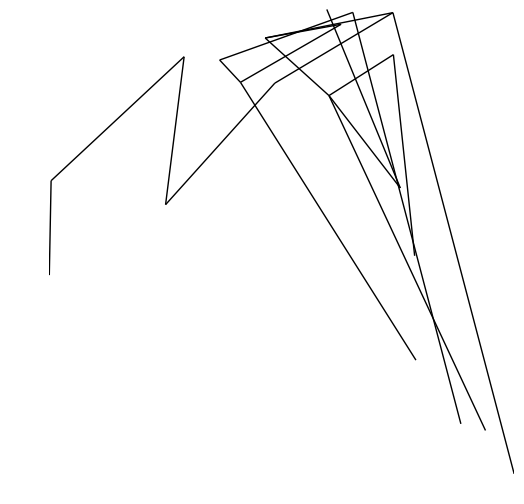

    After 20 iterations
        Discriminator Loss                         = -1.71280348301

    Generator_Loss: 4.38009262085
101
    After 20 iterations
        Discriminator Loss                         = -2.7467610836

    Generator_Loss: 22.273065567
102
    After 20 iterations
        Discriminator Loss                         = -1.87656927109

    Generator_Loss: -24.0103645325
103
    After 20 iterations
        Discriminator Loss                         = -1.36299538612

    Generator_Loss: -16.5294837952
104
    After 20 iterations
        Discriminator Loss                         = -1.67539608479

    Generator_Loss: 5.30850458145
105
    After 20 iterations
        Discriminator Loss                         = -1.13957750797

    Generator_Loss: 6.30648374557
106
    After 20 iterations
        Discriminator Loss                         = -2.13700270653

    Generator_Loss: 20.5467376709
107
    After 20 iterations
        Discriminator Loss                         = -2.690

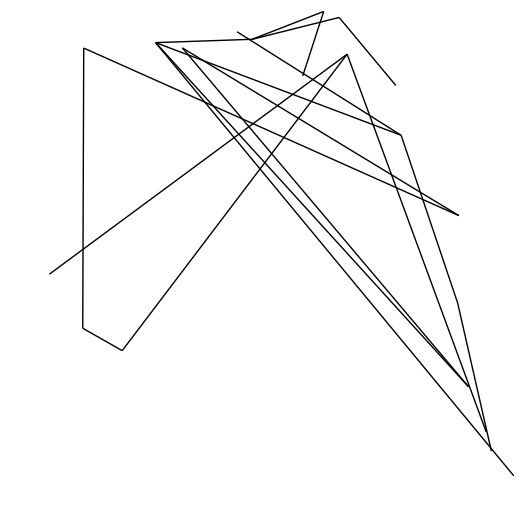

    After 20 iterations
        Discriminator Loss                         = -2.45297408104

    Generator_Loss: 11.9110946655
126
    After 20 iterations
        Discriminator Loss                         = -1.52284753323

    Generator_Loss: 13.1354637146
127
    After 20 iterations
        Discriminator Loss                         = -1.83994150162

    Generator_Loss: -25.42237854
128
    After 20 iterations
        Discriminator Loss                         = -1.48934113979

    Generator_Loss: -13.936009407
129
    After 20 iterations
        Discriminator Loss                         = -1.42037403584

    Generator_Loss: -0.367735624313
130
    After 20 iterations
        Discriminator Loss                         = -1.66605830193

    Generator_Loss: -14.3482761383
131
    After 20 iterations
        Discriminator Loss                         = -1.59155929089

    Generator_Loss: -9.17069911957
132
    After 20 iterations
        Discriminator Loss                         = -2.

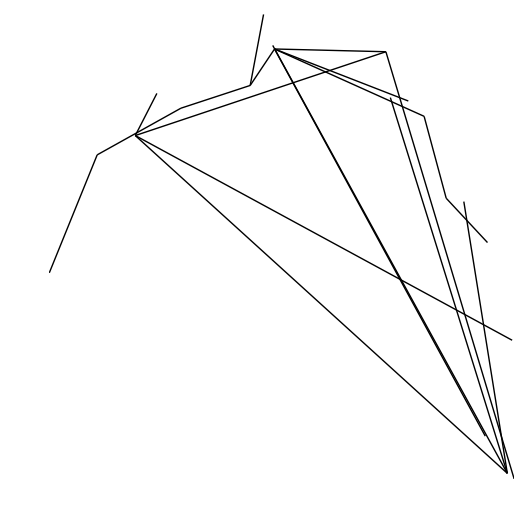

    After 20 iterations
        Discriminator Loss                         = -2.23971486092

    Generator_Loss: -10.1758537292
151
    After 20 iterations
        Discriminator Loss                         = -1.42054259777

    Generator_Loss: -4.37190580368
152
    After 20 iterations
        Discriminator Loss                         = -1.34081506729

    Generator_Loss: -7.19631433487
153
    After 20 iterations
        Discriminator Loss                         = -1.90324282646

    Generator_Loss: 17.697435379
154
    After 20 iterations
        Discriminator Loss                         = -2.41187310219

    Generator_Loss: -6.78685569763
155
    After 20 iterations
        Discriminator Loss                         = -1.84774637222

    Generator_Loss: -8.20173931122
156
    After 20 iterations
        Discriminator Loss                         = -1.28431916237

    Generator_Loss: 15.1131048203
157
    After 20 iterations
        Discriminator Loss                         = -2

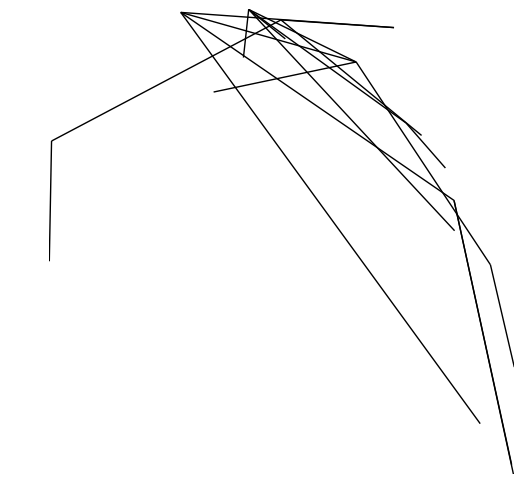

    After 20 iterations
        Discriminator Loss                         = -2.19188785553

    Generator_Loss: -2.83369064331
176
    After 20 iterations
        Discriminator Loss                         = -1.38513565063

    Generator_Loss: 10.7025146484
177
    After 20 iterations
        Discriminator Loss                         = -1.51319861412

    Generator_Loss: 20.6021270752
178
    After 20 iterations
        Discriminator Loss                         = -1.49485719204

    Generator_Loss: 10.6530256271
179
    After 20 iterations
        Discriminator Loss                         = -1.80492913723

    Generator_Loss: -21.0088214874
180
    After 20 iterations
        Discriminator Loss                         = -1.40088701248

    Generator_Loss: -18.4803562164
181
    After 20 iterations
        Discriminator Loss                         = -1.13254880905

    Generator_Loss: -20.6570148468
182
    After 20 iterations
        Discriminator Loss                         = -1

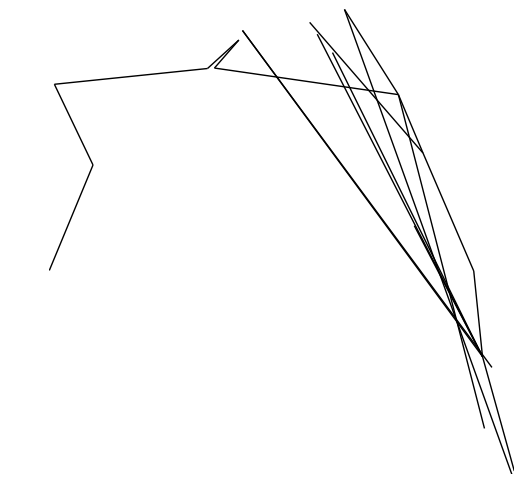

    After 20 iterations
        Discriminator Loss                         = -2.05300378799

    Generator_Loss: 5.92201519012
201
    After 20 iterations
        Discriminator Loss                         = -1.83433949947

    Generator_Loss: -3.84568500519
202
    After 20 iterations
        Discriminator Loss                         = -1.55633306503

    Generator_Loss: 23.257068634
203
    After 20 iterations
        Discriminator Loss                         = -1.31373643875

    Generator_Loss: -8.20126914978
204
    After 20 iterations
        Discriminator Loss                         = -1.79161500931

    Generator_Loss: -29.109210968
205
    After 20 iterations
        Discriminator Loss                         = -1.34593224525

    Generator_Loss: -18.8849506378
206
    After 20 iterations
        Discriminator Loss                         = -1.52337193489

    Generator_Loss: 13.0689315796
207
    After 20 iterations
        Discriminator Loss                         = -1.3

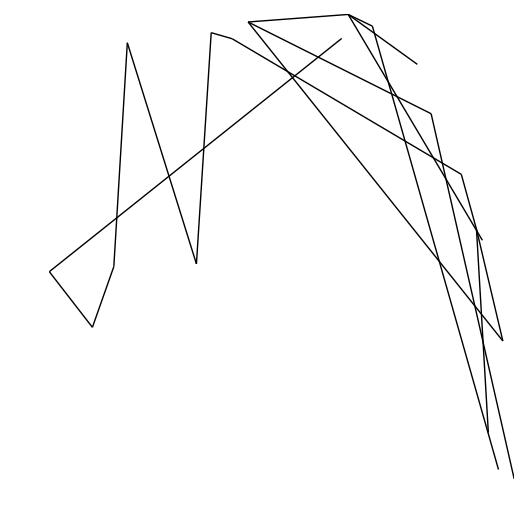

    After 20 iterations
        Discriminator Loss                         = -2.55502700806

    Generator_Loss: 23.2630195618
226
    After 20 iterations
        Discriminator Loss                         = -1.18461501598

    Generator_Loss: 15.6099367142
227
    After 20 iterations
        Discriminator Loss                         = -1.61276078224

    Generator_Loss: 10.5813961029
228
    After 20 iterations
        Discriminator Loss                         = -1.48045325279

    Generator_Loss: 3.75699520111
229
    After 20 iterations
        Discriminator Loss                         = -1.91074490547

    Generator_Loss: 5.15500354767
230
    After 20 iterations
        Discriminator Loss                         = -1.53568375111

    Generator_Loss: -1.04836237431
231
    After 20 iterations
        Discriminator Loss                         = -1.82747960091

    Generator_Loss: -12.130355835
232
    After 20 iterations
        Discriminator Loss                         = -1.32

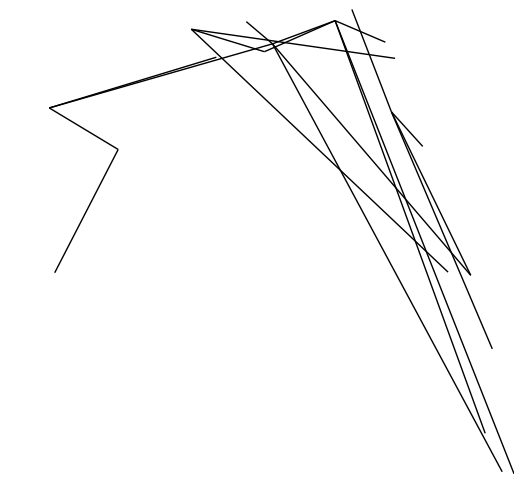

    After 20 iterations
        Discriminator Loss                         = -1.42722976208

    Generator_Loss: 21.7316513062
251
    After 20 iterations
        Discriminator Loss                         = -2.13037753105

    Generator_Loss: 9.82577705383
252
    After 20 iterations
        Discriminator Loss                         = -3.18274402618

    Generator_Loss: 26.2236175537
253
    After 20 iterations
        Discriminator Loss                         = -1.61856031418

    Generator_Loss: 11.7970027924
254
    After 20 iterations
        Discriminator Loss                         = -1.54681694508

    Generator_Loss: -13.9338817596
255
    After 20 iterations
        Discriminator Loss                         = -1.70898294449

    Generator_Loss: 18.1853103638
256
    After 20 iterations
        Discriminator Loss                         = -1.91999435425

    Generator_Loss: -7.35870313644
257
    After 20 iterations
        Discriminator Loss                         = -1.3

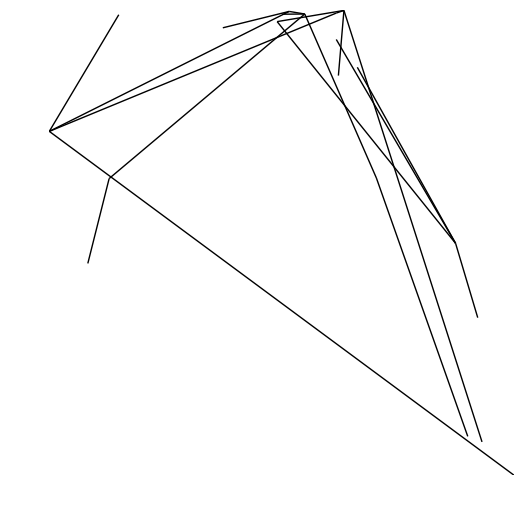

    After 20 iterations
        Discriminator Loss                         = -1.0881305933

    Generator_Loss: -16.2276191711
276
    After 20 iterations
        Discriminator Loss                         = -1.7831466198

    Generator_Loss: -2.97608137131
277
    After 20 iterations
        Discriminator Loss                         = -1.48763227463

    Generator_Loss: -21.7700920105
278
    After 20 iterations
        Discriminator Loss                         = -1.26128709316

    Generator_Loss: 1.11027872562
279
    After 20 iterations
        Discriminator Loss                         = -1.87822139263

    Generator_Loss: -0.0989893600345
280
    After 20 iterations
        Discriminator Loss                         = -1.45499765873

    Generator_Loss: 6.02697515488
281
    After 20 iterations
        Discriminator Loss                         = -1.49287796021

    Generator_Loss: 9.47482585907
282
    After 20 iterations
        Discriminator Loss                         = -1

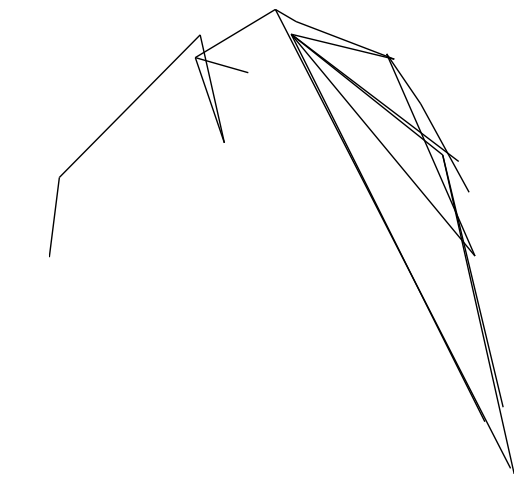

    After 20 iterations
        Discriminator Loss                         = -1.48240709305

    Generator_Loss: 23.201839447
301
    After 20 iterations
        Discriminator Loss                         = -2.11528396606

    Generator_Loss: 19.0228824615
302
    After 20 iterations
        Discriminator Loss                         = -1.99747562408

    Generator_Loss: 10.27784729
303
    After 20 iterations
        Discriminator Loss                         = -1.4239770174

    Generator_Loss: -23.4793434143
304
    After 20 iterations
        Discriminator Loss                         = -1.66496098042

    Generator_Loss: -8.18353939056
305
    After 20 iterations
        Discriminator Loss                         = -1.44425082207

    Generator_Loss: 20.495716095
306
    After 20 iterations
        Discriminator Loss                         = -2.17118906975

    Generator_Loss: -27.2766780853
307
    After 20 iterations
        Discriminator Loss                         = -1.23874

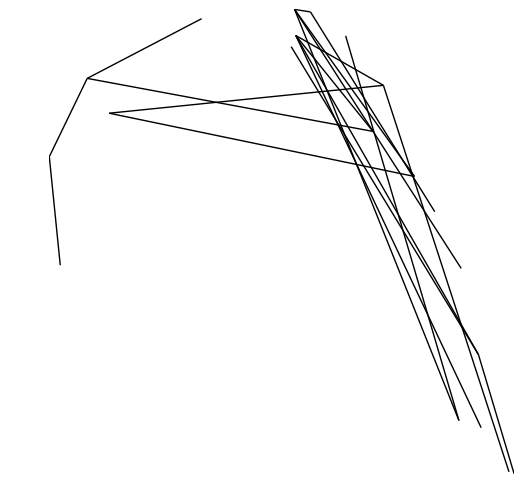

    After 20 iterations
        Discriminator Loss                         = -2.54072332382

    Generator_Loss: 24.6904449463
326
    After 20 iterations
        Discriminator Loss                         = -1.61466693878

    Generator_Loss: 17.0735321045
327
    After 20 iterations
        Discriminator Loss                         = -1.10310506821

    Generator_Loss: 8.863240242
328
    After 20 iterations
        Discriminator Loss                         = -1.97479820251

    Generator_Loss: -3.75732398033
329
    After 20 iterations
        Discriminator Loss                         = -1.13057672977

    Generator_Loss: 17.9678573608
330
    After 20 iterations
        Discriminator Loss                         = -1.31965649128

    Generator_Loss: -8.67113208771
331
    After 20 iterations
        Discriminator Loss                         = -1.43126690388

    Generator_Loss: -19.5816268921
332
    After 20 iterations
        Discriminator Loss                         = -1.57

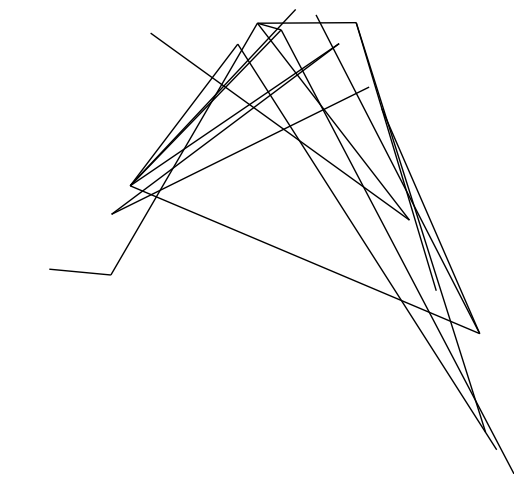

    After 20 iterations
        Discriminator Loss                         = -1.39139270782

    Generator_Loss: -23.4989852905
351
    After 20 iterations
        Discriminator Loss                         = -1.5477669239

    Generator_Loss: 1.30627334118
352
    After 20 iterations
        Discriminator Loss                         = -1.51554560661

    Generator_Loss: -3.72862076759
353
    After 20 iterations
        Discriminator Loss                         = -2.23003816605

    Generator_Loss: 0.111945606768
354
    After 20 iterations
        Discriminator Loss                         = -1.57022047043

    Generator_Loss: -16.4621658325
355
    After 20 iterations
        Discriminator Loss                         = -1.81683421135

    Generator_Loss: 21.9349575043
356
    After 20 iterations
        Discriminator Loss                         = -2.13924503326

    Generator_Loss: -22.1741428375
357
    After 20 iterations
        Discriminator Loss                         = -2

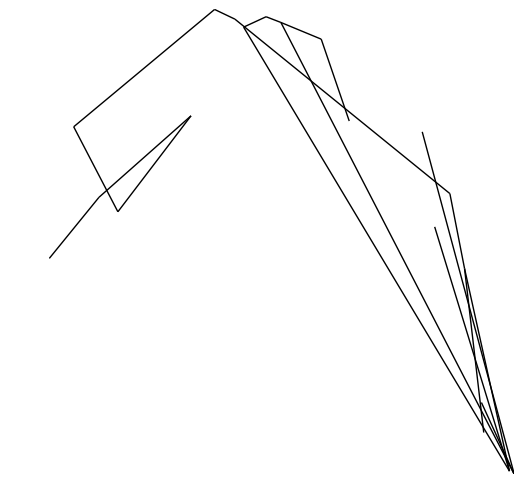

    After 20 iterations
        Discriminator Loss                         = -1.40385127068

    Generator_Loss: -14.7361822128
376
    After 20 iterations
        Discriminator Loss                         = -1.12777304649

    Generator_Loss: 11.7596416473
377
    After 20 iterations
        Discriminator Loss                         = -1.91309738159

    Generator_Loss: 12.313325882
378
    After 20 iterations
        Discriminator Loss                         = -1.84535872936

    Generator_Loss: -25.0461368561
379
    After 20 iterations
        Discriminator Loss                         = -1.97773146629

    Generator_Loss: 23.3909950256
380
    After 20 iterations
        Discriminator Loss                         = -1.45355427265

    Generator_Loss: 11.8878355026
381
    After 20 iterations
        Discriminator Loss                         = -2.15129566193

    Generator_Loss: 2.53154587746
382
    After 20 iterations
        Discriminator Loss                         = -1.47

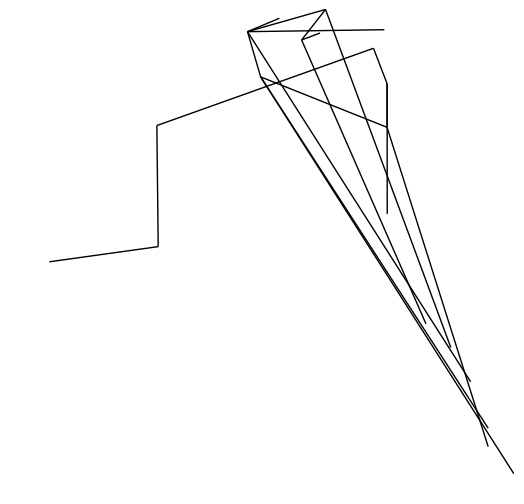

    After 20 iterations
        Discriminator Loss                         = -2.24203324318

    Generator_Loss: 0.448250710964
401
    After 20 iterations
        Discriminator Loss                         = -1.30313491821

    Generator_Loss: 4.25634479523
402
    After 20 iterations
        Discriminator Loss                         = -1.76461207867

    Generator_Loss: 19.4216957092
403
    After 20 iterations
        Discriminator Loss                         = -1.69178283215

    Generator_Loss: -7.22127485275
404
    After 20 iterations
        Discriminator Loss                         = -1.79976677895

    Generator_Loss: 17.0738925934
405
    After 20 iterations
        Discriminator Loss                         = -1.11952543259

    Generator_Loss: -5.0371799469
406
    After 20 iterations
        Discriminator Loss                         = -1.27618455887

    Generator_Loss: -10.7604389191
407
    After 20 iterations
        Discriminator Loss                         = -2.

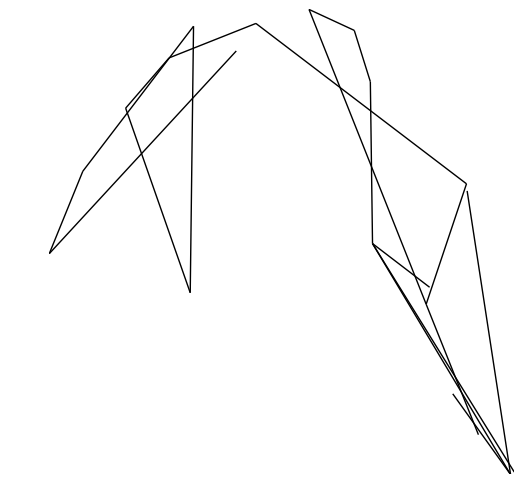

    After 20 iterations
        Discriminator Loss                         = -2.28259325027

    Generator_Loss: 7.4049038887
426
    After 20 iterations
        Discriminator Loss                         = -1.27970039845

    Generator_Loss: -9.11608219147
427
    After 20 iterations
        Discriminator Loss                         = -2.49419522285

    Generator_Loss: -27.1335353851
428
    After 20 iterations
        Discriminator Loss                         = -1.89549839497

    Generator_Loss: 4.09646892548
429
    After 20 iterations
        Discriminator Loss                         = -1.63536739349

    Generator_Loss: 7.29295396805
430
    After 20 iterations
        Discriminator Loss                         = -1.25125062466

    Generator_Loss: 1.0684273243
431
    After 20 iterations
        Discriminator Loss                         = -1.21160960197

    Generator_Loss: -16.2996673584
432
    After 20 iterations
        Discriminator Loss                         = -1.58

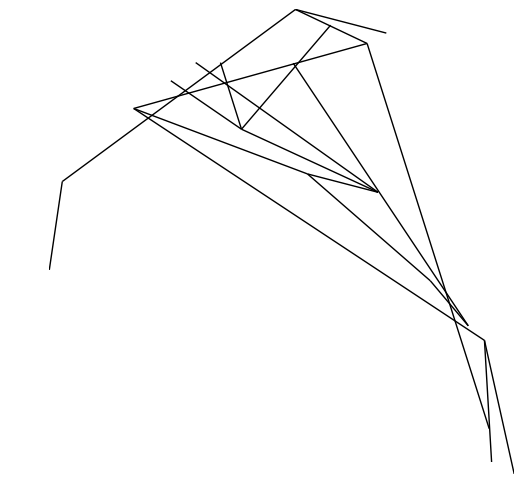

    After 20 iterations
        Discriminator Loss                         = -1.39002001286

    Generator_Loss: -6.43996620178
451
    After 20 iterations
        Discriminator Loss                         = -1.19529771805

    Generator_Loss: -8.62738132477
452
    After 20 iterations
        Discriminator Loss                         = -1.42319333553

    Generator_Loss: 7.79130315781
453
    After 20 iterations
        Discriminator Loss                         = -1.54364156723

    Generator_Loss: 10.4675693512
454
    After 20 iterations
        Discriminator Loss                         = -1.52723121643

    Generator_Loss: -15.8244752884
455
    After 20 iterations
        Discriminator Loss                         = -1.96228885651

    Generator_Loss: 3.23375034332
456
    After 20 iterations
        Discriminator Loss                         = -2.18102240562

    Generator_Loss: -19.632806778
457
    After 20 iterations
        Discriminator Loss                         = -1.

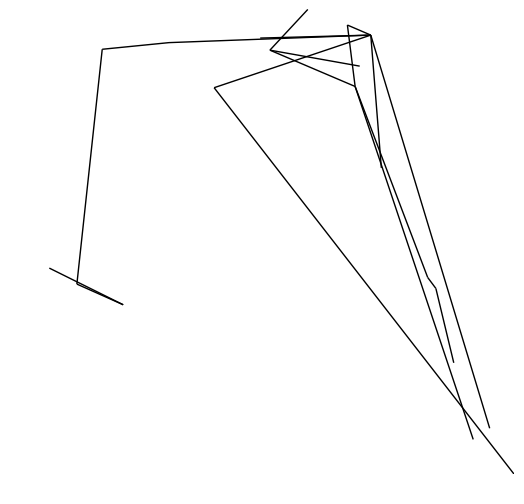

    After 20 iterations
        Discriminator Loss                         = -1.2790119648

    Generator_Loss: -12.1652326584
476
    After 20 iterations
        Discriminator Loss                         = -2.0355861187

    Generator_Loss: -5.04539346695
477
    After 20 iterations
        Discriminator Loss                         = -1.31252539158

    Generator_Loss: -8.13905715942
478
    After 20 iterations
        Discriminator Loss                         = -1.40161323547

    Generator_Loss: -0.311847090721
479
    After 20 iterations
        Discriminator Loss                         = -2.43855643272

    Generator_Loss: -1.54441154003
480
    After 20 iterations
        Discriminator Loss                         = -1.76247143745

    Generator_Loss: -13.2704048157
481
    After 20 iterations
        Discriminator Loss                         = -2.29291963577

    Generator_Loss: 7.62671661377
482
    After 20 iterations
        Discriminator Loss                         = -

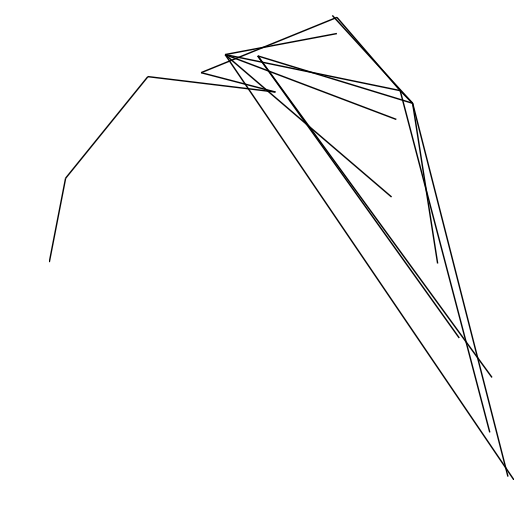

    After 20 iterations
        Discriminator Loss                         = -1.45861554146

    Generator_Loss: 11.8898181915
501
    After 20 iterations
        Discriminator Loss                         = -1.72319698334

    Generator_Loss: 16.0196495056
502
    After 20 iterations
        Discriminator Loss                         = -1.22282791138

    Generator_Loss: -2.13261365891
503
    After 20 iterations
        Discriminator Loss                         = -1.32584357262

    Generator_Loss: 14.2729892731
504
    After 20 iterations
        Discriminator Loss                         = -1.9324747324

    Generator_Loss: 3.170576334
505
    After 20 iterations
        Discriminator Loss                         = -1.25229418278

    Generator_Loss: -10.0212965012
506
    After 20 iterations
        Discriminator Loss                         = -1.62600898743

    Generator_Loss: -8.62630844116
507
    After 20 iterations
        Discriminator Loss                         = -1.666

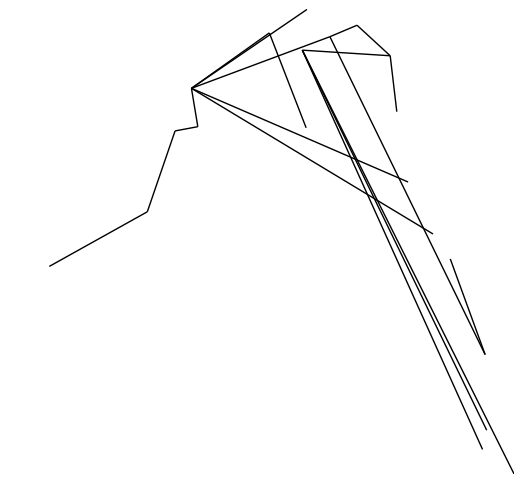

    After 20 iterations
        Discriminator Loss                         = -1.34176671505

    Generator_Loss: -2.72923398018
526
    After 20 iterations
        Discriminator Loss                         = -1.52475452423

    Generator_Loss: -29.3225746155
527
    After 20 iterations
        Discriminator Loss                         = -1.13431322575

    Generator_Loss: 14.7518882751
528
    After 20 iterations
        Discriminator Loss                         = -1.77679526806

    Generator_Loss: -16.1686401367
529
    After 20 iterations
        Discriminator Loss                         = -1.9345895052

    Generator_Loss: 23.900642395
530
    After 20 iterations
        Discriminator Loss                         = -1.65567708015

    Generator_Loss: -3.208152771
531
    After 20 iterations
        Discriminator Loss                         = -1.45684206486

    Generator_Loss: 12.1453943253
532
    After 20 iterations
        Discriminator Loss                         = -1.693

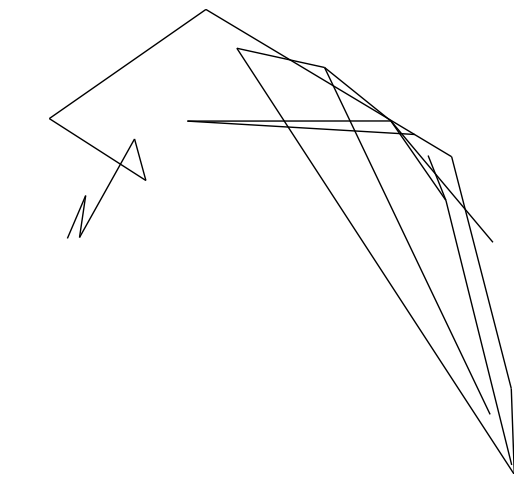

    After 20 iterations
        Discriminator Loss                         = -1.92990422249

    Generator_Loss: -8.26023864746
551
    After 20 iterations
        Discriminator Loss                         = -2.50506019592

    Generator_Loss: 6.46602344513
552
    After 20 iterations
        Discriminator Loss                         = -2.17188620567

    Generator_Loss: 28.4753322601
553
    After 20 iterations
        Discriminator Loss                         = -1.23593485355

    Generator_Loss: 3.37174725533
554
    After 20 iterations
        Discriminator Loss                         = -2.10480809212

    Generator_Loss: 19.6520633698
555
    After 20 iterations
        Discriminator Loss                         = -2.32780241966

    Generator_Loss: -36.3295440674
556
    After 20 iterations
        Discriminator Loss                         = -1.06603229046

    Generator_Loss: 2.98439717293
557
    After 20 iterations
        Discriminator Loss                         = -1.2

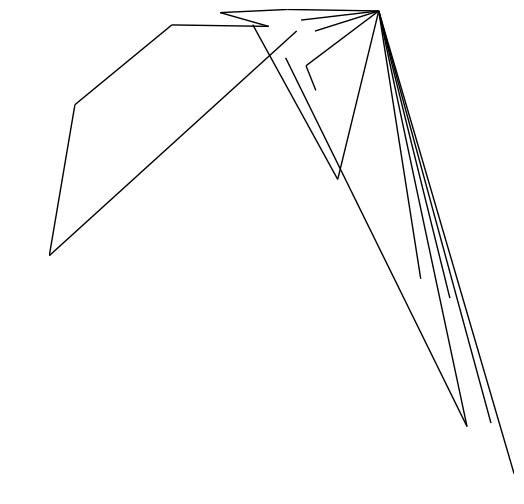

    After 20 iterations
        Discriminator Loss                         = -1.27732551098

    Generator_Loss: 16.7370967865
576
    After 20 iterations
        Discriminator Loss                         = -2.27936172485

    Generator_Loss: 12.8982782364
577
    After 20 iterations
        Discriminator Loss                         = -1.57428836823

    Generator_Loss: 15.5431413651
578
    After 20 iterations
        Discriminator Loss                         = -1.4356225729

    Generator_Loss: 8.13911819458
579
    After 20 iterations
        Discriminator Loss                         = -1.37402510643

    Generator_Loss: -1.09077787399
580
    After 20 iterations
        Discriminator Loss                         = -1.49124085903

    Generator_Loss: 2.2230026722
581
    After 20 iterations
        Discriminator Loss                         = -1.61976909637

    Generator_Loss: -19.7226104736
582
    After 20 iterations
        Discriminator Loss                         = -1.182

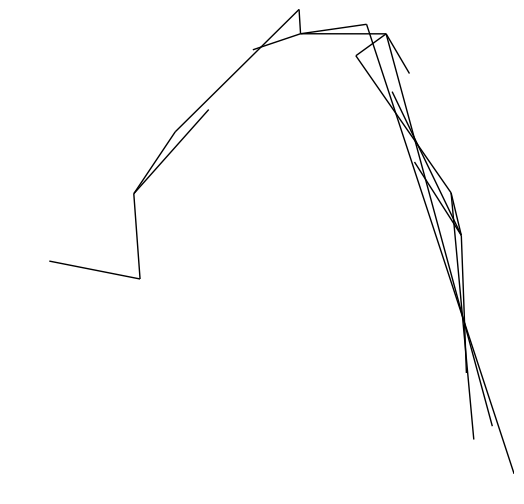

    After 20 iterations
        Discriminator Loss                         = -1.40308582783

    Generator_Loss: -17.2344589233
601
    After 20 iterations
        Discriminator Loss                         = -1.29863286018

    Generator_Loss: 1.47515964508
602
    After 20 iterations
        Discriminator Loss                         = -1.18229186535

    Generator_Loss: 1.85061943531
603
    After 20 iterations
        Discriminator Loss                         = -1.25756168365

    Generator_Loss: -7.3723154068
604
    After 20 iterations
        Discriminator Loss                         = -1.40356421471

    Generator_Loss: 14.436923027
605
    After 20 iterations
        Discriminator Loss                         = -2.4164018631

    Generator_Loss: -10.8814458847
606
    After 20 iterations
        Discriminator Loss                         = -2.62228369713

    Generator_Loss: -2.23833036423
607
    After 20 iterations
        Discriminator Loss                         = -1.97

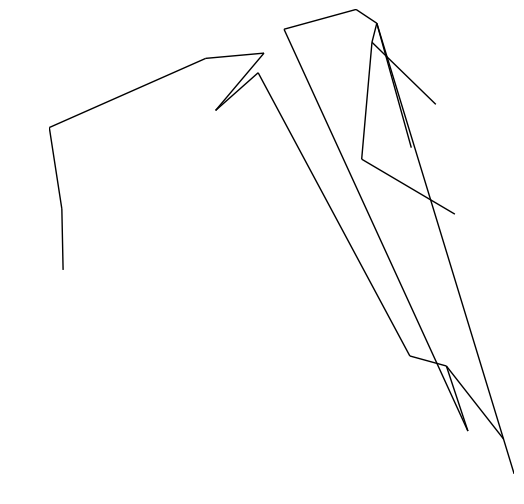

    After 20 iterations
        Discriminator Loss                         = -1.40930664539

    Generator_Loss: -10.1696453094
626
    After 20 iterations
        Discriminator Loss                         = -1.73005485535

    Generator_Loss: -17.1585845947
627
    After 20 iterations
        Discriminator Loss                         = -2.72456741333

    Generator_Loss: 9.57830047607
628
    After 20 iterations
        Discriminator Loss                         = -2.23525977135

    Generator_Loss: -20.8738517761
629
    After 20 iterations
        Discriminator Loss                         = -1.06477844715

    Generator_Loss: -3.53521418571
630
    After 20 iterations
        Discriminator Loss                         = -2.02659749985

    Generator_Loss: -30.9202880859
631
    After 20 iterations
        Discriminator Loss                         = -1.36001038551

    Generator_Loss: 4.16603708267
632
    After 20 iterations
        Discriminator Loss                         = -

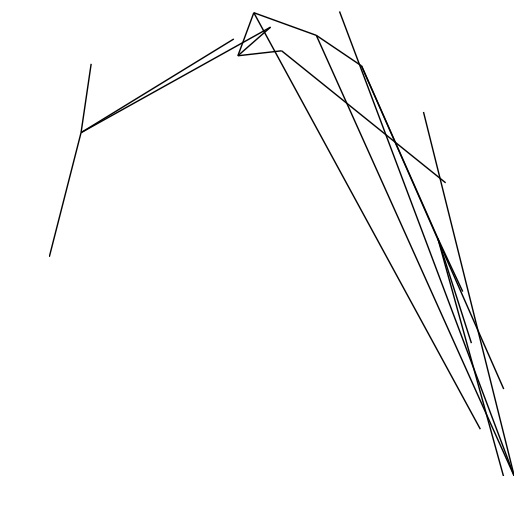

    After 20 iterations
        Discriminator Loss                         = -1.64634084702

    Generator_Loss: 20.0514240265
651
    After 20 iterations
        Discriminator Loss                         = -1.39167451859

    Generator_Loss: -12.3819351196
652
    After 20 iterations
        Discriminator Loss                         = -2.23840379715

    Generator_Loss: -12.085603714
653
    After 20 iterations
        Discriminator Loss                         = -1.64887630939

    Generator_Loss: -12.7192792892
654
    After 20 iterations
        Discriminator Loss                         = -2.32400512695

    Generator_Loss: -8.52755451202
655
    After 20 iterations
        Discriminator Loss                         = -1.74368333817

    Generator_Loss: -1.65425872803
656
    After 20 iterations
        Discriminator Loss                         = -1.49644231796

    Generator_Loss: -2.24256491661
657
    After 20 iterations
        Discriminator Loss                         = -

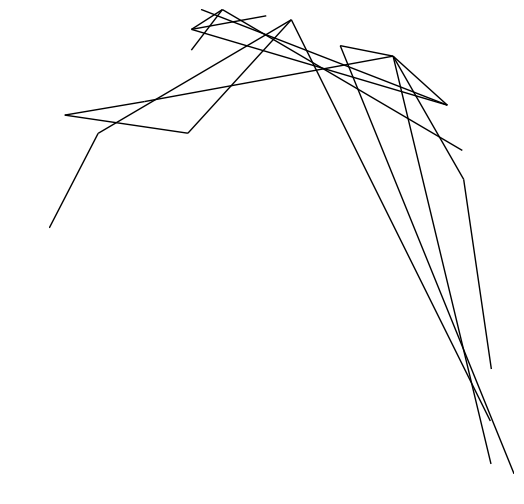

    After 20 iterations
        Discriminator Loss                         = -2.10579752922

    Generator_Loss: -14.7215423584
676
    After 20 iterations
        Discriminator Loss                         = -1.31743609905

    Generator_Loss: -0.930102348328
677
    After 20 iterations
        Discriminator Loss                         = -1.66203773022

    Generator_Loss: 23.6011753082
678
    After 20 iterations
        Discriminator Loss                         = -2.30989122391

    Generator_Loss: 26.982509613
679
    After 20 iterations
        Discriminator Loss                         = -1.19077908993

    Generator_Loss: 5.26343917847
680
    After 20 iterations
        Discriminator Loss                         = -2.24954652786

    Generator_Loss: -17.9118843079
681
    After 20 iterations
        Discriminator Loss                         = -1.70882952213

    Generator_Loss: -23.3643894196
682
    After 20 iterations
        Discriminator Loss                         = -1

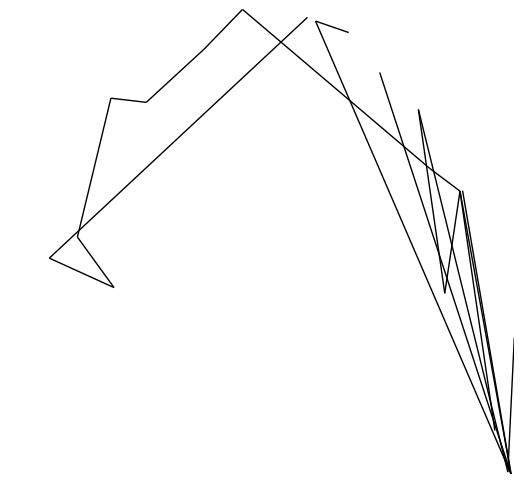

    After 20 iterations
        Discriminator Loss                         = -1.5791260004

    Generator_Loss: 14.6261482239
701
    After 20 iterations
        Discriminator Loss                         = -1.48560285568

    Generator_Loss: -5.47997617722
702
    After 20 iterations
        Discriminator Loss                         = -1.30126273632

    Generator_Loss: -0.7939016819
703
    After 20 iterations
        Discriminator Loss                         = -1.54792785645

    Generator_Loss: -25.6101818085
704
    After 20 iterations
        Discriminator Loss                         = -1.82784867287

    Generator_Loss: 2.68082547188
705
    After 20 iterations
        Discriminator Loss                         = -1.11897802353

    Generator_Loss: 9.61657810211
706
    After 20 iterations
        Discriminator Loss                         = -2.16117215157

    Generator_Loss: -25.6116828918
707
    After 20 iterations
        Discriminator Loss                         = -2.4

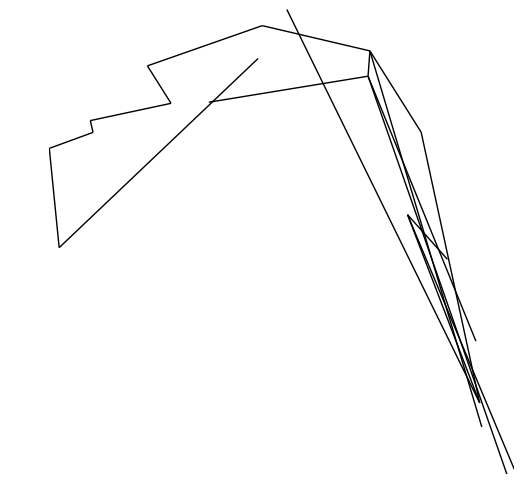

    After 20 iterations
        Discriminator Loss                         = -2.02563786507

    Generator_Loss: 5.63168668747
726
    After 20 iterations
        Discriminator Loss                         = -1.55055403709

    Generator_Loss: -4.8540263176
727
    After 20 iterations
        Discriminator Loss                         = -1.52200233936

    Generator_Loss: 11.4303283691
728
    After 20 iterations
        Discriminator Loss                         = -1.15708220005

    Generator_Loss: -24.9366378784
729
    After 20 iterations
        Discriminator Loss                         = -1.29931461811

    Generator_Loss: 6.69489240646
730
    After 20 iterations
        Discriminator Loss                         = -1.89219808578

    Generator_Loss: -4.16034078598
731
    After 20 iterations
        Discriminator Loss                         = -2.22709417343

    Generator_Loss: -14.5880556107
732
    After 20 iterations
        Discriminator Loss                         = -1.

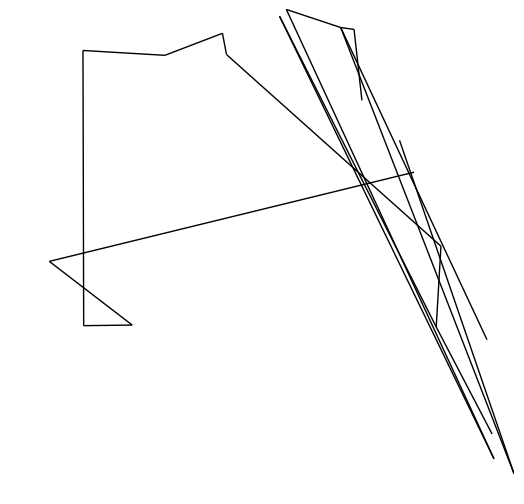

    After 20 iterations
        Discriminator Loss                         = -1.75718438625

    Generator_Loss: 22.3105144501
751
    After 20 iterations
        Discriminator Loss                         = -1.36498904228

    Generator_Loss: 9.14523124695
752
    After 20 iterations
        Discriminator Loss                         = -1.37586569786

    Generator_Loss: 5.16867828369
753
    After 20 iterations
        Discriminator Loss                         = -1.4298363924

    Generator_Loss: -18.3153095245
754
    After 20 iterations
        Discriminator Loss                         = -1.36107575893

    Generator_Loss: 10.8244771957
755
    After 20 iterations
        Discriminator Loss                         = -1.55946230888

    Generator_Loss: -7.57301092148
756
    After 20 iterations
        Discriminator Loss                         = -1.57797729969

    Generator_Loss: -34.7036361694
757
    After 20 iterations
        Discriminator Loss                         = -1.1

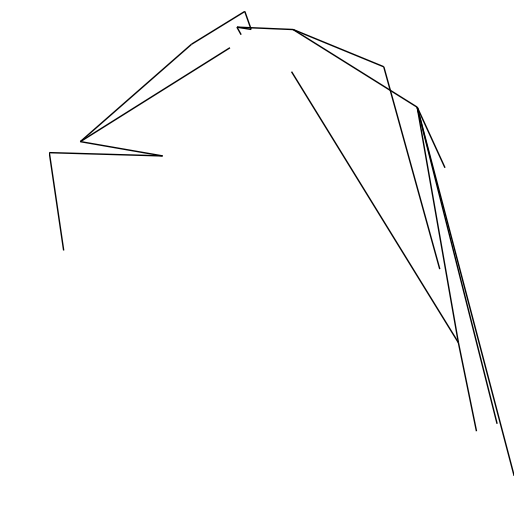

    After 20 iterations
        Discriminator Loss                         = -1.57739508152

    Generator_Loss: 25.0830307007
776
    After 20 iterations
        Discriminator Loss                         = -1.13587880135

    Generator_Loss: -15.5233545303
777
    After 20 iterations
        Discriminator Loss                         = -1.67888331413

    Generator_Loss: -10.4759483337
778
    After 20 iterations
        Discriminator Loss                         = -2.50061392784

    Generator_Loss: -29.853679657
779
    After 20 iterations
        Discriminator Loss                         = -1.13497710228

    Generator_Loss: -4.42703676224
780
    After 20 iterations
        Discriminator Loss                         = -1.37117171288

    Generator_Loss: -18.9816551208
781

    Epoch #4

    After 20 iterations
        Discriminator Loss                         = -1.65376055241

    Generator_Loss: 6.05587387085
2
    After 20 iterations
        Discriminator Loss                

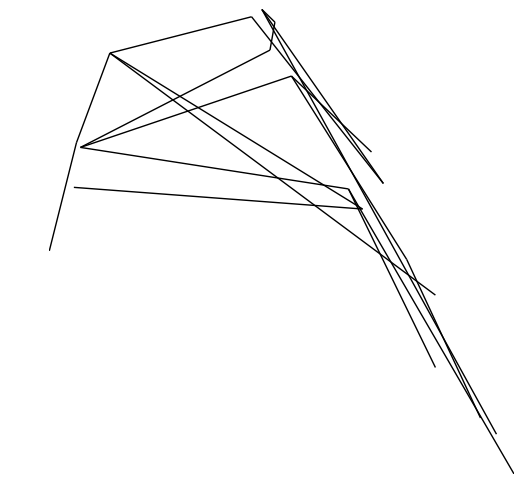

    After 20 iterations
        Discriminator Loss                         = -1.39130711555

    Generator_Loss: -11.4672269821
26
    After 20 iterations
        Discriminator Loss                         = -2.30682730675

    Generator_Loss: -17.7016887665
27
    After 20 iterations
        Discriminator Loss                         = -1.79489135742

    Generator_Loss: 24.5164966583
28
    After 20 iterations
        Discriminator Loss                         = -1.4536241293

    Generator_Loss: -15.1204242706
29
    After 20 iterations
        Discriminator Loss                         = -1.03248476982

    Generator_Loss: -4.68188905716
30
    After 20 iterations
        Discriminator Loss                         = -1.93621230125

    Generator_Loss: 24.4341831207
31
    After 20 iterations
        Discriminator Loss                         = -2.18259358406

    Generator_Loss: -2.98026275635
32
    After 20 iterations
        Discriminator Loss                         = -2.033014

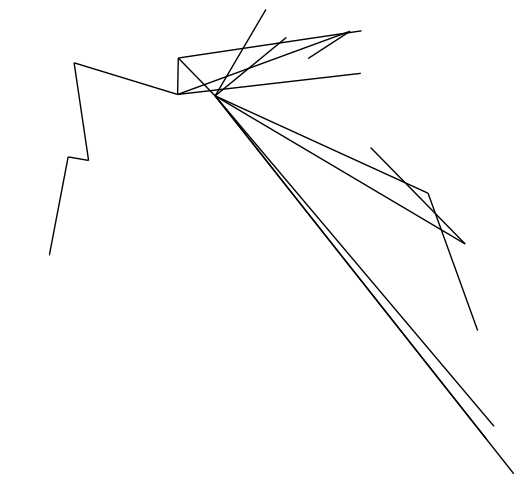

    After 20 iterations
        Discriminator Loss                         = -1.32824838161

    Generator_Loss: 13.6225032806
51
    After 20 iterations
        Discriminator Loss                         = -1.01996302605

    Generator_Loss: 4.20931243896
52
    After 20 iterations
        Discriminator Loss                         = -2.15721511841

    Generator_Loss: 17.6340885162
53
    After 20 iterations
        Discriminator Loss                         = -1.16205179691

    Generator_Loss: 14.5553064346
54
    After 20 iterations
        Discriminator Loss                         = -2.01799511909

    Generator_Loss: -0.578040957451
55
    After 20 iterations
        Discriminator Loss                         = -1.28889417648

    Generator_Loss: 7.33939504623
56
    After 20 iterations
        Discriminator Loss                         = -2.37988734245

    Generator_Loss: -26.2835254669
57
    After 20 iterations
        Discriminator Loss                         = -1.5649586

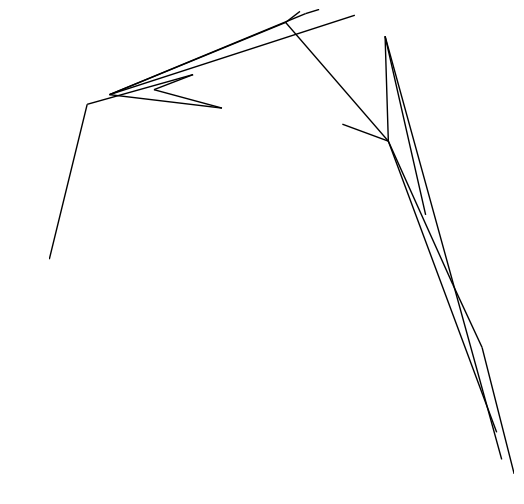

    After 20 iterations
        Discriminator Loss                         = -2.20625591278

    Generator_Loss: -12.4789009094
76
    After 20 iterations
        Discriminator Loss                         = -1.5029630661

    Generator_Loss: -28.1351222992
77
    After 20 iterations
        Discriminator Loss                         = -1.29931294918

    Generator_Loss: -5.3306055069
78
    After 20 iterations
        Discriminator Loss                         = -1.74150323868

    Generator_Loss: 6.01331758499
79
    After 20 iterations
        Discriminator Loss                         = -1.4973334074

    Generator_Loss: 3.44230890274
80
    After 20 iterations
        Discriminator Loss                         = -1.46123743057

    Generator_Loss: -6.94281864166
81
    After 20 iterations
        Discriminator Loss                         = -1.72629320621

    Generator_Loss: -10.13945961
82
    After 20 iterations
        Discriminator Loss                         = -2.3797500133

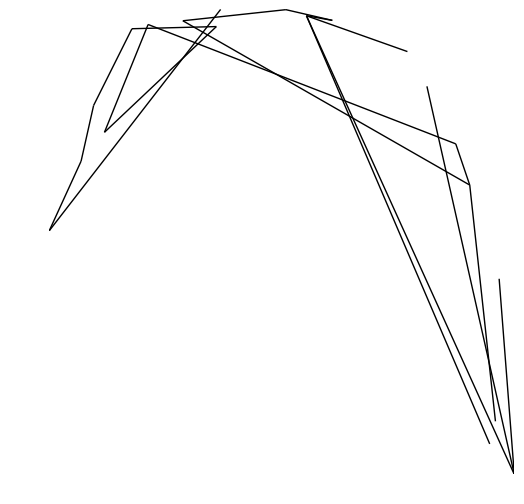

    After 20 iterations
        Discriminator Loss                         = -1.61467885971

    Generator_Loss: 7.12323713303
101
    After 20 iterations
        Discriminator Loss                         = -2.66443181038

    Generator_Loss: 24.5300807953
102
    After 20 iterations
        Discriminator Loss                         = -1.59661352634

    Generator_Loss: -20.2728214264
103
    After 20 iterations
        Discriminator Loss                         = -1.40858018398

    Generator_Loss: -18.9778137207
104
    After 20 iterations
        Discriminator Loss                         = -1.55081784725

    Generator_Loss: 5.76278114319
105
    After 20 iterations
        Discriminator Loss                         = -1.17656099796

    Generator_Loss: 8.00672912598
106
    After 20 iterations
        Discriminator Loss                         = -2.13585853577

    Generator_Loss: 15.028093338
107
    After 20 iterations
        Discriminator Loss                         = -2.55

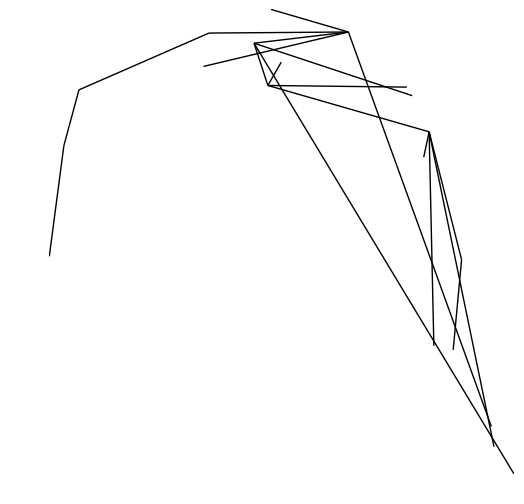

    After 20 iterations
        Discriminator Loss                         = -2.43695139885

    Generator_Loss: 12.0890455246
126
    After 20 iterations
        Discriminator Loss                         = -1.36269891262

    Generator_Loss: 14.2077665329
127
    After 20 iterations
        Discriminator Loss                         = -1.72899484634

    Generator_Loss: -16.9443778992
128
    After 20 iterations
        Discriminator Loss                         = -1.3114682436

    Generator_Loss: -16.5833358765
129
    After 20 iterations
        Discriminator Loss                         = -1.41127109528

    Generator_Loss: 2.53326320648
130
    After 20 iterations
        Discriminator Loss                         = -1.57205593586

    Generator_Loss: -12.7108106613
131
    After 20 iterations
        Discriminator Loss                         = -1.70910358429

    Generator_Loss: -13.701833725
132
    After 20 iterations
        Discriminator Loss                         = -1.9

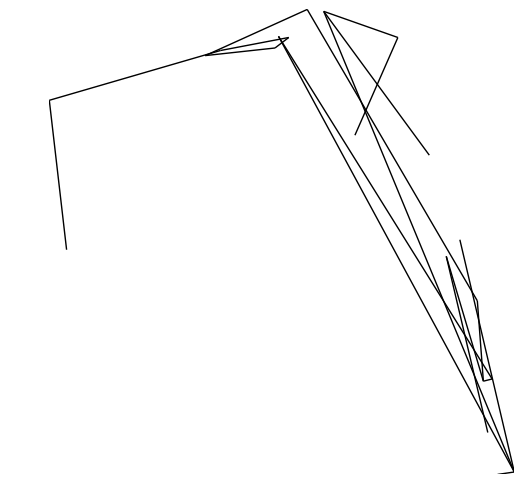

    After 20 iterations
        Discriminator Loss                         = -2.17944407463

    Generator_Loss: -8.16499996185
151
    After 20 iterations
        Discriminator Loss                         = -1.21439397335

    Generator_Loss: -6.03315830231
152
    After 20 iterations
        Discriminator Loss                         = -1.27025771141

    Generator_Loss: -6.66534757614
153
    After 20 iterations
        Discriminator Loss                         = -1.88249588013

    Generator_Loss: 18.4982414246
154
    After 20 iterations
        Discriminator Loss                         = -2.28827142715

    Generator_Loss: -6.14968109131
155
    After 20 iterations
        Discriminator Loss                         = -1.70663285255

    Generator_Loss: -8.13561344147
156
    After 20 iterations
        Discriminator Loss                         = -1.0413724184

    Generator_Loss: 13.633099556
157
    After 20 iterations
        Discriminator Loss                         = -2.

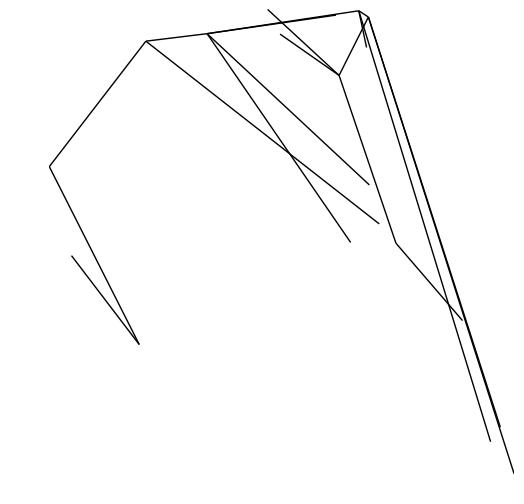

    After 20 iterations
        Discriminator Loss                         = -1.99436664581

    Generator_Loss: -2.60617613792
176
    After 20 iterations
        Discriminator Loss                         = -1.33512806892

    Generator_Loss: 8.98063373566
177
    After 20 iterations
        Discriminator Loss                         = -1.60024797916

    Generator_Loss: 28.2297401428
178
    After 20 iterations
        Discriminator Loss                         = -1.42485046387

    Generator_Loss: 11.5363769531
179
    After 20 iterations
        Discriminator Loss                         = -1.83109688759

    Generator_Loss: -21.1952838898
180
    After 20 iterations
        Discriminator Loss                         = -1.30706012249

    Generator_Loss: -12.4602766037
181
    After 20 iterations
        Discriminator Loss                         = -1.02310311794

    Generator_Loss: -15.8391103745
182
    After 20 iterations
        Discriminator Loss                         = -1

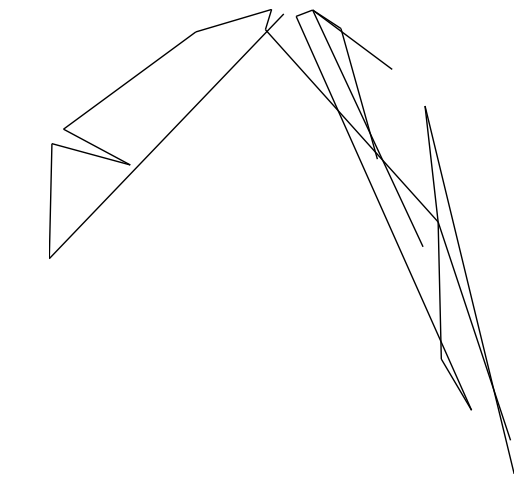

    After 20 iterations
        Discriminator Loss                         = -1.85903525352

    Generator_Loss: 4.36328935623
201
    After 20 iterations
        Discriminator Loss                         = -1.6715118885

    Generator_Loss: -4.52559900284
202
    After 20 iterations
        Discriminator Loss                         = -1.37217628956

    Generator_Loss: 22.4386672974
203
    After 20 iterations
        Discriminator Loss                         = -1.3531293869

    Generator_Loss: -8.82685375214
204
    After 20 iterations
        Discriminator Loss                         = -1.74547791481

    Generator_Loss: -31.8530273438
205
    After 20 iterations
        Discriminator Loss                         = -1.33038949966

    Generator_Loss: -19.1065788269
206
    After 20 iterations
        Discriminator Loss                         = -1.60139369965

    Generator_Loss: 16.3717193604
207
    After 20 iterations
        Discriminator Loss                         = -1.3

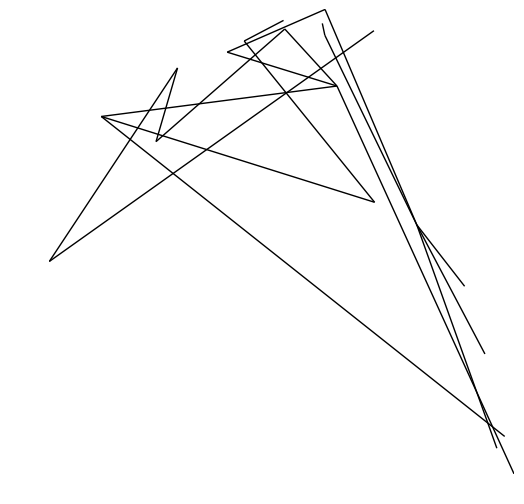

    After 20 iterations
        Discriminator Loss                         = -2.46911692619

    Generator_Loss: 25.5248794556
226
    After 20 iterations
        Discriminator Loss                         = -1.24283790588

    Generator_Loss: 16.965763092
227
    After 20 iterations
        Discriminator Loss                         = -1.57753801346

    Generator_Loss: 16.1433467865
228
    After 20 iterations
        Discriminator Loss                         = -1.57411050797

    Generator_Loss: 9.20219135284
229
    After 20 iterations
        Discriminator Loss                         = -1.91159427166

    Generator_Loss: -0.288309335709
230
    After 20 iterations
        Discriminator Loss                         = -1.28664624691

    Generator_Loss: 2.51548147202
231
    After 20 iterations
        Discriminator Loss                         = -1.7518196106

    Generator_Loss: -14.4318323135
232
    After 20 iterations
        Discriminator Loss                         = -1.29

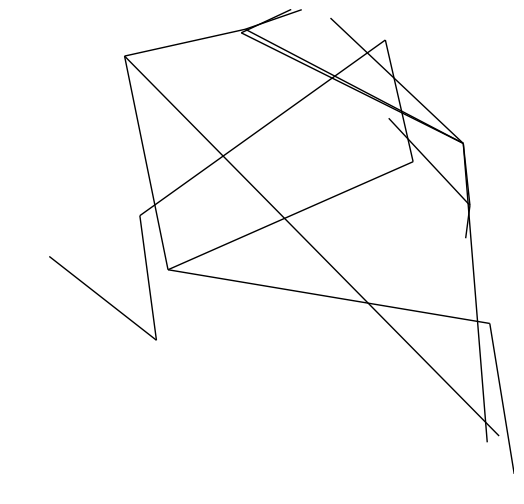

    After 20 iterations
        Discriminator Loss                         = -1.42315530777

    Generator_Loss: 23.6725311279
251
    After 20 iterations
        Discriminator Loss                         = -1.95824992657

    Generator_Loss: 16.6771812439
252
    After 20 iterations
        Discriminator Loss                         = -3.21219182014

    Generator_Loss: 27.4314804077
253
    After 20 iterations
        Discriminator Loss                         = -1.60261023045

    Generator_Loss: 9.95465660095
254
    After 20 iterations
        Discriminator Loss                         = -1.43983972073

    Generator_Loss: -13.3359260559
255
    After 20 iterations
        Discriminator Loss                         = -1.62688374519

    Generator_Loss: 19.088186264
256
    After 20 iterations
        Discriminator Loss                         = -2.03693056107

    Generator_Loss: -4.90181827545
257
    After 20 iterations
        Discriminator Loss                         = -1.20

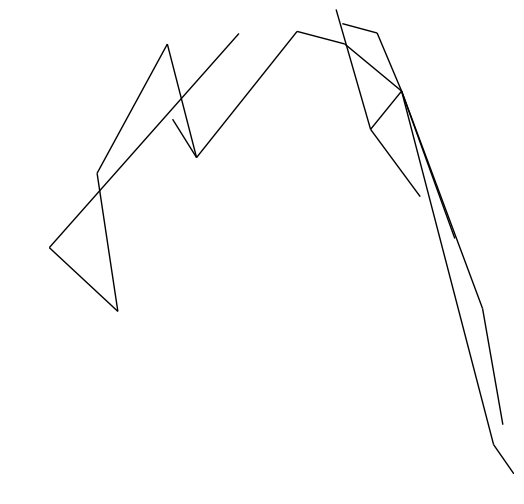

    After 20 iterations
        Discriminator Loss                         = -1.01958632469

    Generator_Loss: -7.67903804779
276
    After 20 iterations
        Discriminator Loss                         = -1.71365833282

    Generator_Loss: -2.49265789986
277
    After 20 iterations
        Discriminator Loss                         = -1.30667185783

    Generator_Loss: -23.9844608307
278
    After 20 iterations
        Discriminator Loss                         = -1.07504379749

    Generator_Loss: 2.53684043884
279
    After 20 iterations
        Discriminator Loss                         = -1.86976993084

    Generator_Loss: 0.570636987686
280
    After 20 iterations
        Discriminator Loss                         = -1.33706235886

    Generator_Loss: 5.78048706055
281
    After 20 iterations
        Discriminator Loss                         = -1.24324703217

    Generator_Loss: 7.12125396729
282
    After 20 iterations
        Discriminator Loss                         = -1

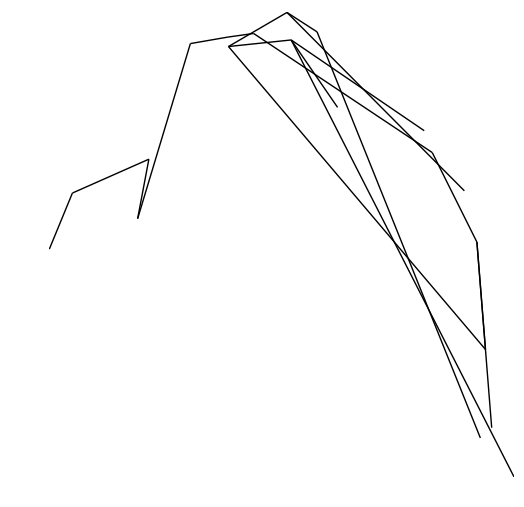

    After 20 iterations
        Discriminator Loss                         = -1.442045331

    Generator_Loss: 20.190328598
301
    After 20 iterations
        Discriminator Loss                         = -2.08214473724

    Generator_Loss: 21.2229156494
302
    After 20 iterations
        Discriminator Loss                         = -1.86843216419

    Generator_Loss: 15.5000543594
303
    After 20 iterations
        Discriminator Loss                         = -1.33145987988

    Generator_Loss: -20.8097743988
304
    After 20 iterations
        Discriminator Loss                         = -1.69151306152

    Generator_Loss: -2.25853395462
305
    After 20 iterations
        Discriminator Loss                         = -1.2571015358

    Generator_Loss: 21.1372871399
306
    After 20 iterations
        Discriminator Loss                         = -2.22137475014

    Generator_Loss: -30.1247749329
307
    After 20 iterations
        Discriminator Loss                         = -1.0566

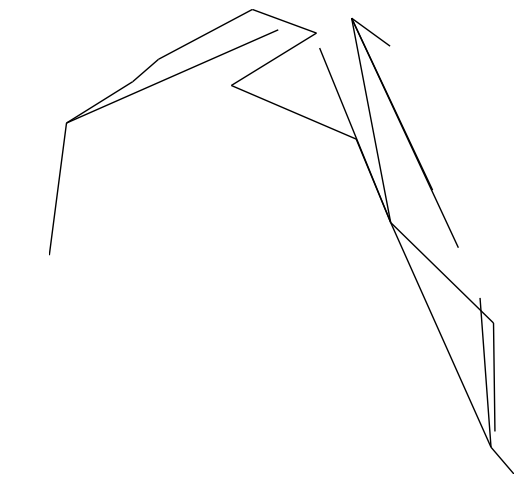

    After 20 iterations
        Discriminator Loss                         = -2.448097229

    Generator_Loss: 24.7427558899
326
    After 20 iterations
        Discriminator Loss                         = -1.39298808575

    Generator_Loss: 15.469329834
327
    After 20 iterations
        Discriminator Loss                         = -1.14248025417

    Generator_Loss: 13.6267585754
328
    After 20 iterations
        Discriminator Loss                         = -2.0357208252

    Generator_Loss: -0.518525779247
329
    After 20 iterations
        Discriminator Loss                         = -1.07372176647

    Generator_Loss: 15.2713747025
330
    After 20 iterations
        Discriminator Loss                         = -1.36486780643

    Generator_Loss: -8.66821670532
331
    After 20 iterations
        Discriminator Loss                         = -1.32410681248

    Generator_Loss: -17.4723396301
332
    After 20 iterations
        Discriminator Loss                         = -1.447

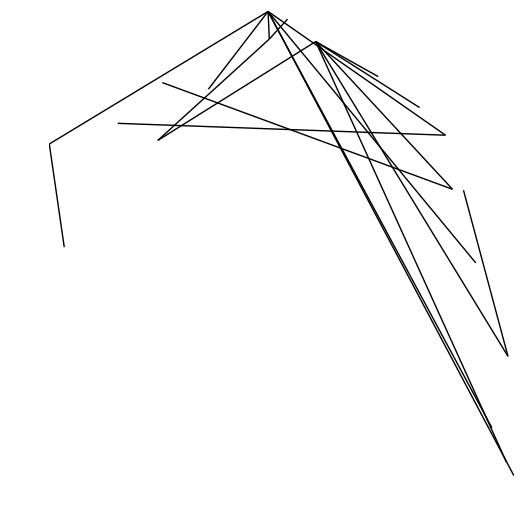

    After 20 iterations
        Discriminator Loss                         = -1.22887599468

    Generator_Loss: -18.0755519867
351
    After 20 iterations
        Discriminator Loss                         = -1.47701406479

    Generator_Loss: -2.14599561691
352
    After 20 iterations
        Discriminator Loss                         = -1.45753109455

    Generator_Loss: -5.38487577438
353
    After 20 iterations
        Discriminator Loss                         = -2.1839761734

    Generator_Loss: -2.45186209679
354
    After 20 iterations
        Discriminator Loss                         = -1.44916510582

    Generator_Loss: -18.2665061951
355
    After 20 iterations
        Discriminator Loss                         = -1.71696615219

    Generator_Loss: 21.0328807831
356
    After 20 iterations
        Discriminator Loss                         = -1.8358682394

    Generator_Loss: -20.4505901337
357
    After 20 iterations
        Discriminator Loss                         = -2

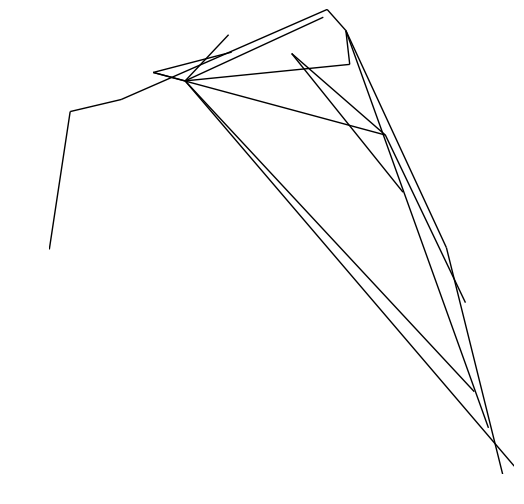

    After 20 iterations
        Discriminator Loss                         = -1.56582117081

    Generator_Loss: -12.4564571381
376
    After 20 iterations
        Discriminator Loss                         = -1.05025887489

    Generator_Loss: 10.965546608
377
    After 20 iterations
        Discriminator Loss                         = -1.83136880398

    Generator_Loss: 12.0119333267
378
    After 20 iterations
        Discriminator Loss                         = -1.85906171799

    Generator_Loss: -21.5615730286
379
    After 20 iterations
        Discriminator Loss                         = -1.83914458752

    Generator_Loss: 26.5526809692
380
    After 20 iterations
        Discriminator Loss                         = -1.46448981762

    Generator_Loss: 12.5109415054
381
    After 20 iterations
        Discriminator Loss                         = -2.21552419662

    Generator_Loss: 3.60200047493
382
    After 20 iterations
        Discriminator Loss                         = -1.42

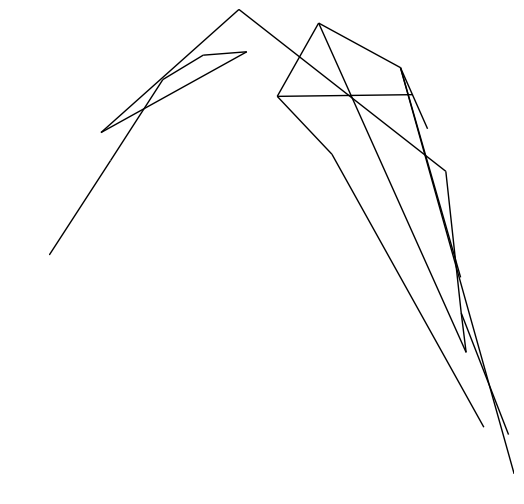

    After 20 iterations
        Discriminator Loss                         = -2.23920154572

    Generator_Loss: 0.276372045279
401
    After 20 iterations
        Discriminator Loss                         = -1.21851921082

    Generator_Loss: 6.6183848381
402
    After 20 iterations
        Discriminator Loss                         = -1.69958865643

    Generator_Loss: 17.0468273163
403
    After 20 iterations
        Discriminator Loss                         = -1.653657794

    Generator_Loss: -2.73844981194
404
    After 20 iterations
        Discriminator Loss                         = -1.87715363503

    Generator_Loss: 18.8667755127
405
    After 20 iterations
        Discriminator Loss                         = -1.21138489246

    Generator_Loss: -3.67863273621
406
    After 20 iterations
        Discriminator Loss                         = -1.17978823185

    Generator_Loss: -8.82697582245
407
    After 20 iterations
        Discriminator Loss                         = -2.35

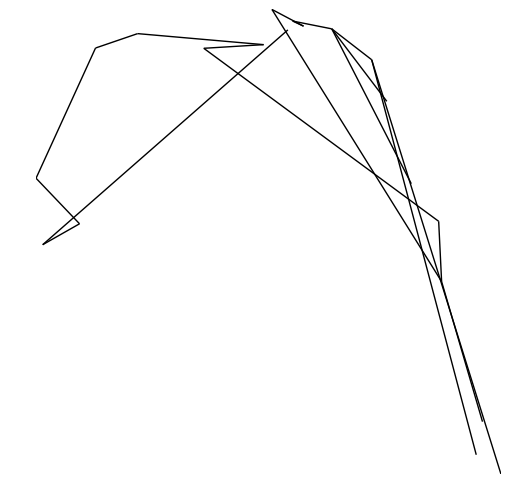

    After 20 iterations
        Discriminator Loss                         = -2.25658774376

    Generator_Loss: 2.5764465332
426
    After 20 iterations
        Discriminator Loss                         = -1.28814184666

    Generator_Loss: -10.1362857819
427
    After 20 iterations
        Discriminator Loss                         = -2.52356171608

    Generator_Loss: -28.9559803009
428
    After 20 iterations
        Discriminator Loss                         = -1.73242533207

    Generator_Loss: 10.6340885162
429
    After 20 iterations
        Discriminator Loss                         = -1.62202787399

    Generator_Loss: 5.32007837296
430
    After 20 iterations
        Discriminator Loss                         = -1.29069662094

    Generator_Loss: 0.554506540298
431
    After 20 iterations
        Discriminator Loss                         = -1.1093993187

    Generator_Loss: -18.8927211761
432
    After 20 iterations
        Discriminator Loss                         = -1.4

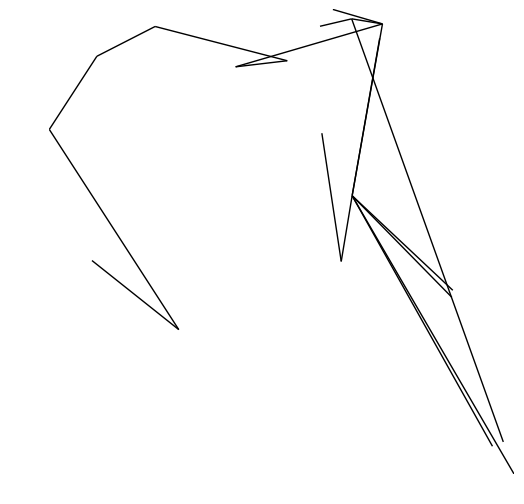

    After 20 iterations
        Discriminator Loss                         = -1.47834968567

    Generator_Loss: -4.78468704224
451
    After 20 iterations
        Discriminator Loss                         = -1.17955005169

    Generator_Loss: -7.78673124313
452
    After 20 iterations
        Discriminator Loss                         = -1.39729273319

    Generator_Loss: 10.5027627945
453
    After 20 iterations
        Discriminator Loss                         = -1.52883458138

    Generator_Loss: 11.0430307388
454
    After 20 iterations
        Discriminator Loss                         = -1.62879657745

    Generator_Loss: -21.2199707031
455
    After 20 iterations
        Discriminator Loss                         = -1.98115837574

    Generator_Loss: 7.24374341965
456
    After 20 iterations
        Discriminator Loss                         = -2.10996007919

    Generator_Loss: -10.9326677322
457
    After 20 iterations
        Discriminator Loss                         = -1

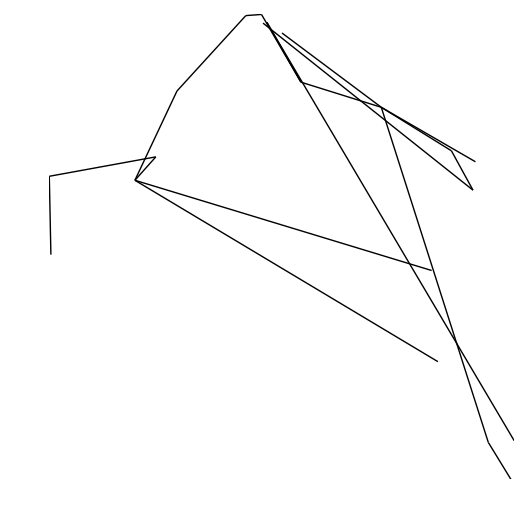

    After 20 iterations
        Discriminator Loss                         = -1.1685860157

    Generator_Loss: -11.2999544144
476
    After 20 iterations
        Discriminator Loss                         = -1.9653942585

    Generator_Loss: -9.52707767487
477
    After 20 iterations
        Discriminator Loss                         = -1.29436016083

    Generator_Loss: -8.92074394226
478
    After 20 iterations
        Discriminator Loss                         = -1.43394637108

    Generator_Loss: -0.884154677391
479
    After 20 iterations
        Discriminator Loss                         = -2.56412577629

    Generator_Loss: 2.01783466339
480
    After 20 iterations
        Discriminator Loss                         = -1.73990345001

    Generator_Loss: -13.7225799561
481
    After 20 iterations
        Discriminator Loss                         = -2.22636318207

    Generator_Loss: 10.8283758163
482
    After 20 iterations
        Discriminator Loss                         = -1

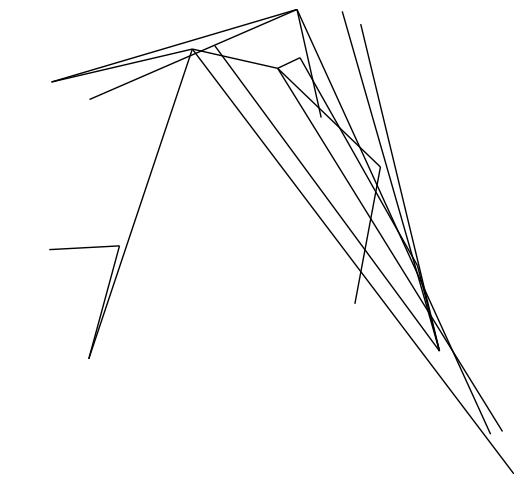

    After 20 iterations
        Discriminator Loss                         = -1.32994568348

    Generator_Loss: 9.66532993317
501
    After 20 iterations
        Discriminator Loss                         = -1.72484612465

    Generator_Loss: 17.7010536194
502
    After 20 iterations
        Discriminator Loss                         = -1.19322490692

    Generator_Loss: -3.90208077431
503
    After 20 iterations
        Discriminator Loss                         = -1.25310087204

    Generator_Loss: 20.754234314
504
    After 20 iterations
        Discriminator Loss                         = -1.89281237125

    Generator_Loss: 2.18534636497
505
    After 20 iterations
        Discriminator Loss                         = -1.27257823944

    Generator_Loss: -9.58022499084
506
    After 20 iterations
        Discriminator Loss                         = -1.55210804939

    Generator_Loss: -4.87379980087
507
    After 20 iterations
        Discriminator Loss                         = -1.7

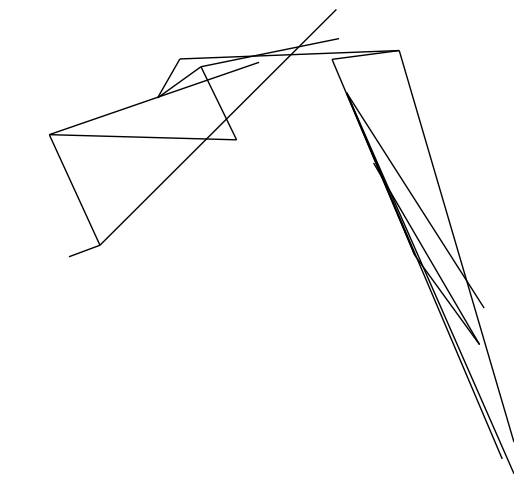

    After 20 iterations
        Discriminator Loss                         = -1.39249265194

    Generator_Loss: -0.631276965141
526
    After 20 iterations
        Discriminator Loss                         = -1.43392789364

    Generator_Loss: -27.0809440613
527
    After 20 iterations
        Discriminator Loss                         = -1.08638143539

    Generator_Loss: 15.1779985428
528
    After 20 iterations
        Discriminator Loss                         = -1.76474905014

    Generator_Loss: -18.0450820923
529
    After 20 iterations
        Discriminator Loss                         = -1.8946120739

    Generator_Loss: 20.4569778442
530
    After 20 iterations
        Discriminator Loss                         = -1.67336297035

    Generator_Loss: -1.1190495491
531
    After 20 iterations
        Discriminator Loss                         = -1.40668129921

    Generator_Loss: 7.59875535965
532
    After 20 iterations
        Discriminator Loss                         = -1.

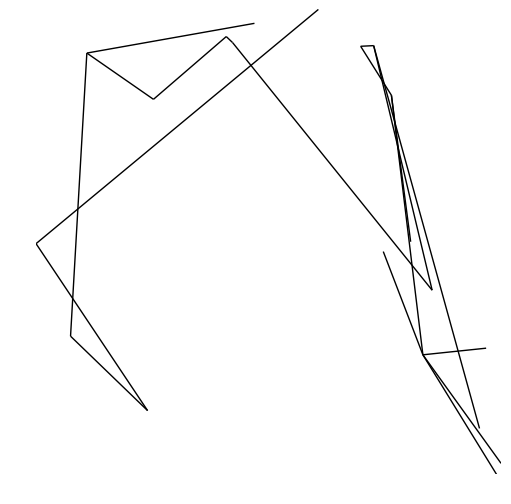

    After 20 iterations
        Discriminator Loss                         = -1.98330044746

    Generator_Loss: -10.4856081009
551
    After 20 iterations
        Discriminator Loss                         = -2.43571090698

    Generator_Loss: 4.32410669327
552
    After 20 iterations
        Discriminator Loss                         = -2.18690037727

    Generator_Loss: 28.7083454132
553
    After 20 iterations
        Discriminator Loss                         = -1.21396076679

    Generator_Loss: 3.35022425652
554
    After 20 iterations
        Discriminator Loss                         = -1.94260263443

    Generator_Loss: 19.7041397095
555
    After 20 iterations
        Discriminator Loss                         = -2.33208703995

    Generator_Loss: -36.7529258728
556
    After 20 iterations
        Discriminator Loss                         = -0.951069891453

    Generator_Loss: 7.88069438934
557
    After 20 iterations
        Discriminator Loss                         = -1.

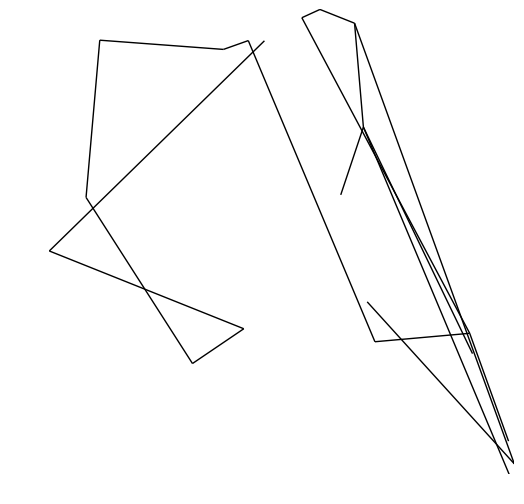

    After 20 iterations
        Discriminator Loss                         = -1.35134148598

    Generator_Loss: 10.5270023346
576
    After 20 iterations
        Discriminator Loss                         = -2.24598932266

    Generator_Loss: 13.602519989
577
    After 20 iterations
        Discriminator Loss                         = -1.57577109337

    Generator_Loss: 15.2872009277
578
    After 20 iterations
        Discriminator Loss                         = -1.41535747051

    Generator_Loss: 7.18463754654
579
    After 20 iterations
        Discriminator Loss                         = -1.31924962997

    Generator_Loss: -2.32895469666
580
    After 20 iterations
        Discriminator Loss                         = -1.43202424049

    Generator_Loss: 0.810484349728
581
    After 20 iterations
        Discriminator Loss                         = -1.61291527748

    Generator_Loss: -19.9403190613
582
    After 20 iterations
        Discriminator Loss                         = -1.1

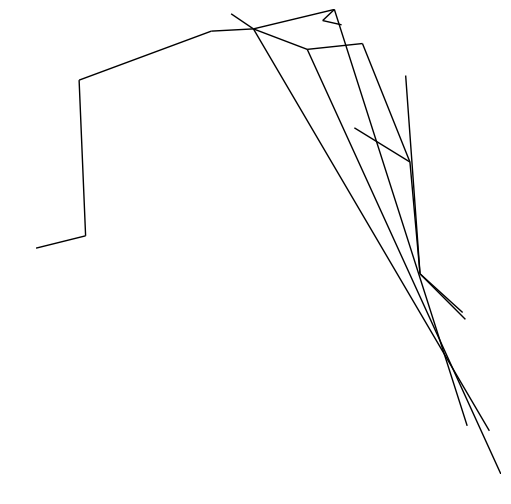

    After 20 iterations
        Discriminator Loss                         = -1.39233601093

    Generator_Loss: -20.1370658875
601
    After 20 iterations
        Discriminator Loss                         = -1.11566305161

    Generator_Loss: 0.813495397568
602
    After 20 iterations
        Discriminator Loss                         = -1.12516772747

    Generator_Loss: 0.249913081527
603
    After 20 iterations
        Discriminator Loss                         = -1.3176612854

    Generator_Loss: -5.47610235214
604
    After 20 iterations
        Discriminator Loss                         = -1.2930201292

    Generator_Loss: 10.9368286133
605
    After 20 iterations
        Discriminator Loss                         = -2.26548075676

    Generator_Loss: -11.4667358398
606
    After 20 iterations
        Discriminator Loss                         = -2.5853676796

    Generator_Loss: -2.59506893158
607
    After 20 iterations
        Discriminator Loss                         = -1.

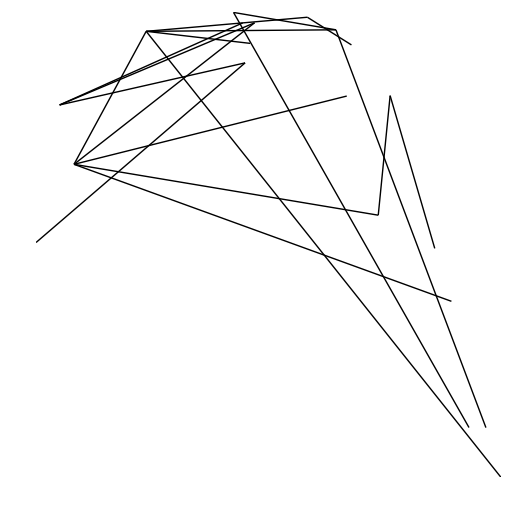

    After 20 iterations
        Discriminator Loss                         = -1.26704001427

    Generator_Loss: -10.4552736282
626
    After 20 iterations
        Discriminator Loss                         = -1.54726171494

    Generator_Loss: -14.4458312988
627
    After 20 iterations
        Discriminator Loss                         = -2.56772780418

    Generator_Loss: 10.1120233536
628
    After 20 iterations
        Discriminator Loss                         = -2.07762861252

    Generator_Loss: -19.2136707306
629
    After 20 iterations
        Discriminator Loss                         = -1.10925364494

    Generator_Loss: -11.0756406784
630
    After 20 iterations
        Discriminator Loss                         = -2.0331184864

    Generator_Loss: -31.3062267303
631
    After 20 iterations
        Discriminator Loss                         = -1.30715048313

    Generator_Loss: 5.34691810608
632
    After 20 iterations
        Discriminator Loss                         = -1

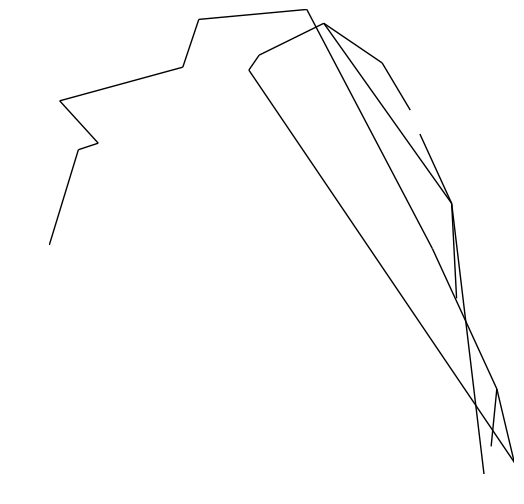

    After 20 iterations
        Discriminator Loss                         = -1.65073442459

    Generator_Loss: 23.5563793182
651
    After 20 iterations
        Discriminator Loss                         = -1.44188177586

    Generator_Loss: -15.2333030701
652
    After 20 iterations
        Discriminator Loss                         = -2.13868904114

    Generator_Loss: -11.6444282532
653
    After 20 iterations
        Discriminator Loss                         = -1.62794864178

    Generator_Loss: -6.04400777817
654
    After 20 iterations
        Discriminator Loss                         = -2.34686040878

    Generator_Loss: -9.66390705109
655
    After 20 iterations
        Discriminator Loss                         = -1.7405847311

    Generator_Loss: 2.50206565857
656
    After 20 iterations
        Discriminator Loss                         = -1.50150847435

    Generator_Loss: -2.70030522346
657
    After 20 iterations
        Discriminator Loss                         = -1

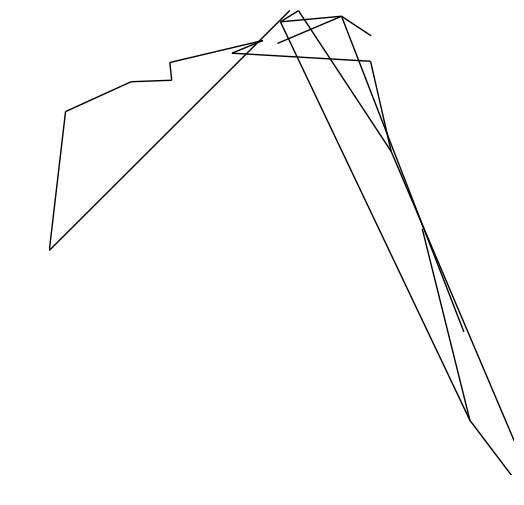

    After 20 iterations
        Discriminator Loss                         = -1.97418630123

    Generator_Loss: -13.2607841492
676
    After 20 iterations
        Discriminator Loss                         = -1.15620088577

    Generator_Loss: 4.80210256577
677
    After 20 iterations
        Discriminator Loss                         = -1.59730923176

    Generator_Loss: 23.8834571838
678
    After 20 iterations
        Discriminator Loss                         = -2.11831593513

    Generator_Loss: 26.4961681366
679
    After 20 iterations
        Discriminator Loss                         = -1.29202270508

    Generator_Loss: 3.07185554504
680
    After 20 iterations
        Discriminator Loss                         = -2.18185091019

    Generator_Loss: -16.1122665405
681
    After 20 iterations
        Discriminator Loss                         = -1.64799654484

    Generator_Loss: -24.1690940857
682
    After 20 iterations
        Discriminator Loss                         = -1.

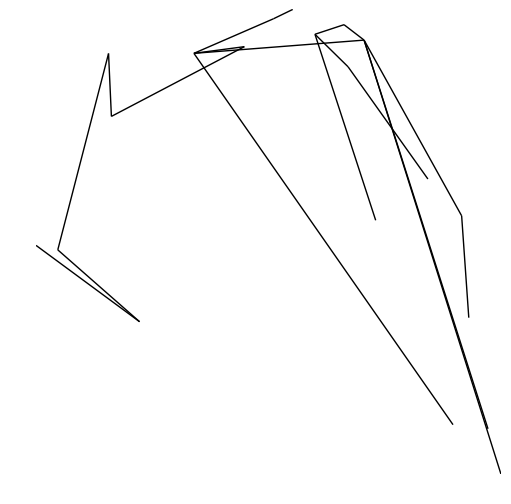

    After 20 iterations
        Discriminator Loss                         = -1.55695557594

    Generator_Loss: 16.440454483
701
    After 20 iterations
        Discriminator Loss                         = -1.4870839119

    Generator_Loss: -8.5143327713
702
    After 20 iterations
        Discriminator Loss                         = -1.30599653721

    Generator_Loss: 2.59453964233
703
    After 20 iterations
        Discriminator Loss                         = -1.49851536751

    Generator_Loss: -20.9000873566
704
    After 20 iterations
        Discriminator Loss                         = -1.71727895737

    Generator_Loss: -0.659395098686
705
    After 20 iterations
        Discriminator Loss                         = -1.00732302666

    Generator_Loss: 8.91366195679
706
    After 20 iterations
        Discriminator Loss                         = -2.22557401657

    Generator_Loss: -31.1749591827
707
    After 20 iterations
        Discriminator Loss                         = -2.4

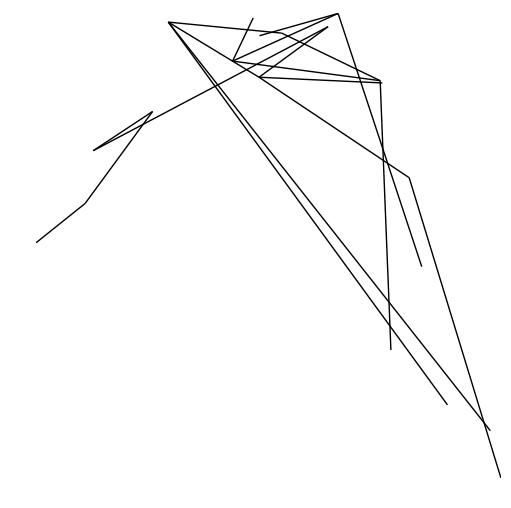

    After 20 iterations
        Discriminator Loss                         = -1.97282803059

    Generator_Loss: 2.4459643364
726
    After 20 iterations
        Discriminator Loss                         = -1.465097785

    Generator_Loss: -7.49287223816
727
    After 20 iterations
        Discriminator Loss                         = -1.64361655712

    Generator_Loss: 8.5223903656
728
    After 20 iterations
        Discriminator Loss                         = -0.899036288261

    Generator_Loss: -21.2600669861
729
    After 20 iterations
        Discriminator Loss                         = -1.38854467869

    Generator_Loss: 5.38729143143
730
    After 20 iterations
        Discriminator Loss                         = -1.88389050961

    Generator_Loss: -0.00719752954319
731
    After 20 iterations
        Discriminator Loss                         = -2.22492337227

    Generator_Loss: -8.18988418579
732
    After 20 iterations
        Discriminator Loss                         = -1

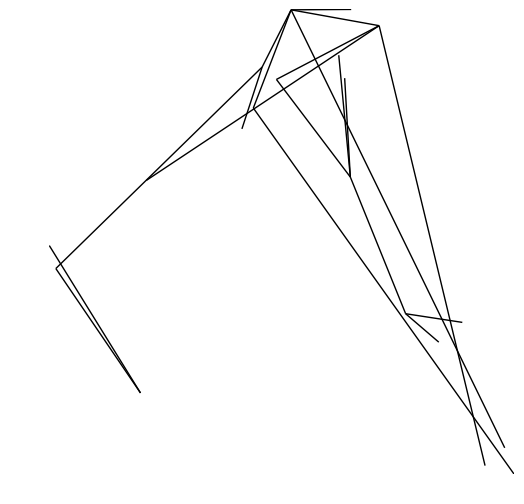

    After 20 iterations
        Discriminator Loss                         = -1.87943470478

    Generator_Loss: 26.3332386017
751
    After 20 iterations
        Discriminator Loss                         = -1.38399863243

    Generator_Loss: 6.36008501053
752
    After 20 iterations
        Discriminator Loss                         = -1.30430829525

    Generator_Loss: 8.02712535858
753
    After 20 iterations
        Discriminator Loss                         = -1.38390564919

    Generator_Loss: -9.74279880524
754
    After 20 iterations
        Discriminator Loss                         = -1.3180488348

    Generator_Loss: 9.50882053375
755
    After 20 iterations
        Discriminator Loss                         = -1.51968538761

    Generator_Loss: -8.80587863922
756
    After 20 iterations
        Discriminator Loss                         = -1.54453647137

    Generator_Loss: -34.1165313721
757
    After 20 iterations
        Discriminator Loss                         = -1.1

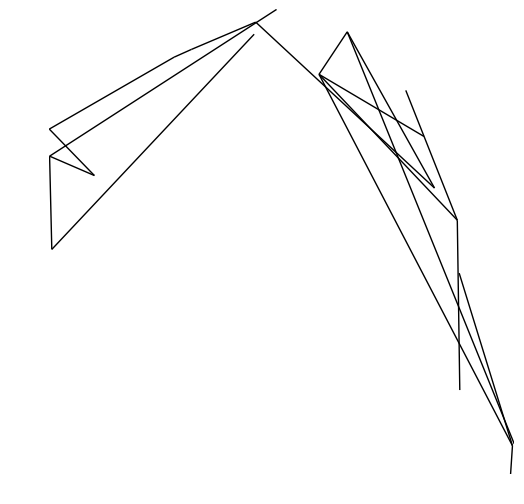

    After 20 iterations
        Discriminator Loss                         = -1.52532827854

    Generator_Loss: 24.8510990143
776
    After 20 iterations
        Discriminator Loss                         = -1.01700985432

    Generator_Loss: -14.4005422592
777
    After 20 iterations
        Discriminator Loss                         = -1.75550031662

    Generator_Loss: -10.232998848
778
    After 20 iterations
        Discriminator Loss                         = -2.23791599274

    Generator_Loss: -26.8336353302
779
    After 20 iterations
        Discriminator Loss                         = -1.09981667995

    Generator_Loss: -5.20929956436
780
    After 20 iterations
        Discriminator Loss                         = -1.21518445015

    Generator_Loss: -16.5487232208
781


In [23]:
geom_model, morph_model, disc_model, gan_model = \
    train.train_model(training_data=training_data,
                      n_levels=n_levels,
                      n_nodes=n_nodes,
                      input_dim=input_dim,
                      n_epochs=n_epochs,
                      batch_size=batch_size,
                      n_batch_per_epoch=n_batch_per_epoch,
                      d_iters=d_iters,
                      lr_discriminator=lr_discriminator,
                      lr_generator=lr_generator,
                      weight_constraint=weight_constraint)

In [37]:
locations_gen = geom_model[0].predict(np.random.randn(1,1,100))
softmax_gen = np.squeeze(morph_model[0].predict(np.random.randn(1,1,100)))

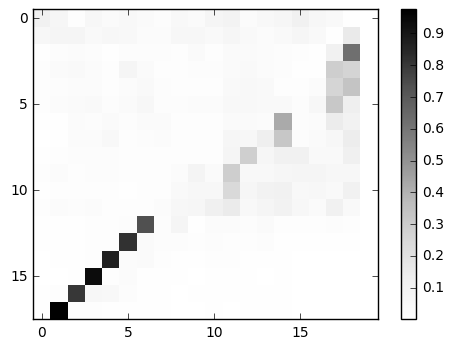

In [38]:
plt.imshow(softmax_gen, interpolation='none', cmap='Greys')
plt.colorbar()
plt.show()

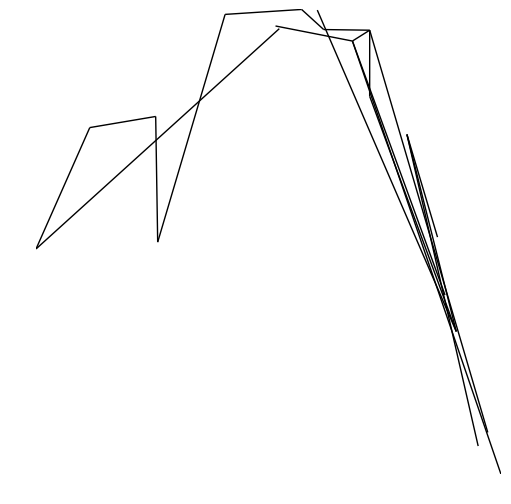

In [39]:
neuron_object = train.plot_example_neuron(locations_gen, softmax_gen)
neuron_object = McNeuron.Neuron(file_format='only list of nodes', input_file = neuron_object.nodes_list)

In [40]:
neuron_object.parent_index

array([ 0,  0,  1,  2,  3,  4,  5,  0,  6,  8,  9,  9,  8, 12, 13, 14,  9,
       14, 13,  8])

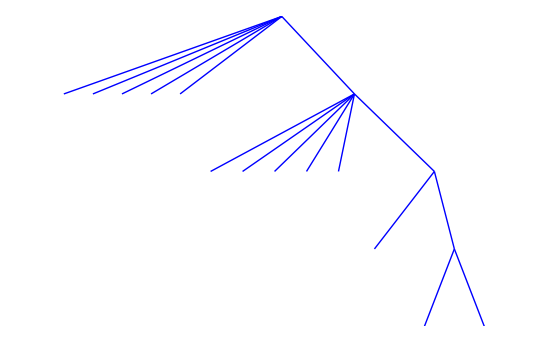

In [41]:
McNeuron.visualize.plot_dedrite_tree(neuron_object)

In [42]:
print np.max(training_data['geometry']['n20'][0, :, :]), np.min(training_data['geometry']['n20'][0, :, :])
print locations_gen.max(), locations_gen.min()

8.11007636228 -0.509370527919
6.55128 -2.07881


In [12]:
neuron_object = McNeuron.Neuron(file_format='only list of nodes', input_file = neuron_object.nodes_list)
neuron_object.fit()
features = neuron_object.features
features.keys()

['Nbranch',
 'discrepancy_space',
 'global_angle',
 'ratio_euclidian_neuronal',
 'initial_segments',
 'curvature',
 'distance_from_parent',
 'distance_from_root',
 'Nnodes',
 'neural_important',
 'local_angle',
 'euclidian_important',
 'branch_angle',
 'ratio_neural_euclidian_important',
 'branch_angle_segment']

In [13]:
import pprint as pp
pp.pprint(features['branch_angle_segment'])

array([], dtype=float64)


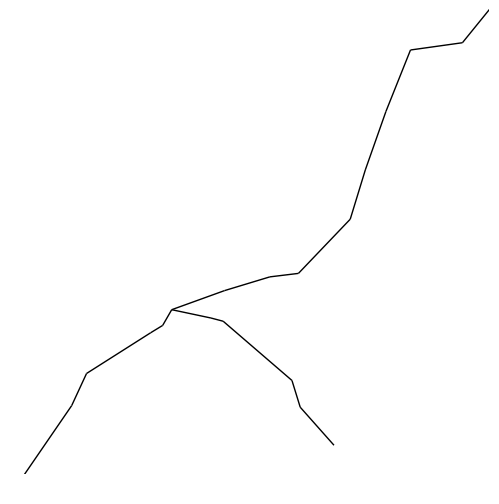

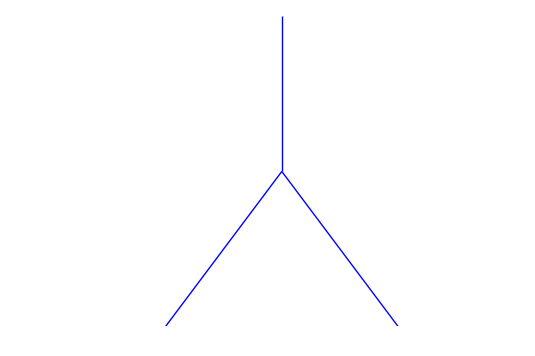

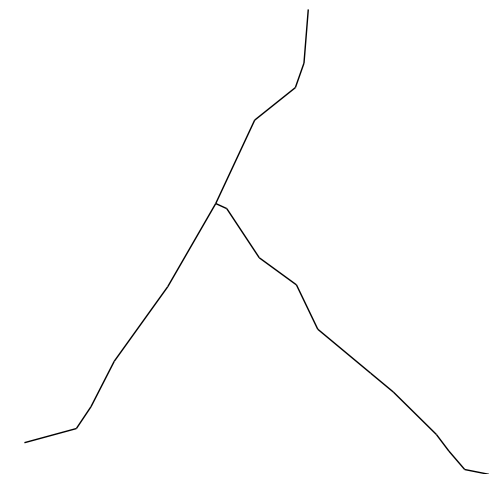

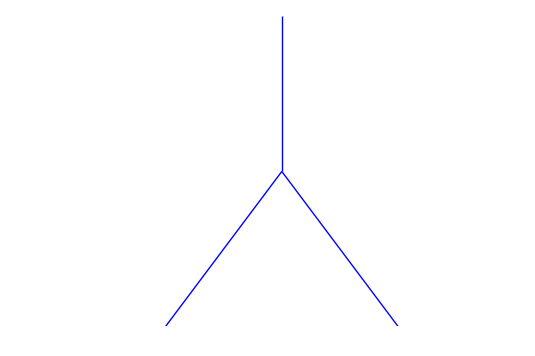

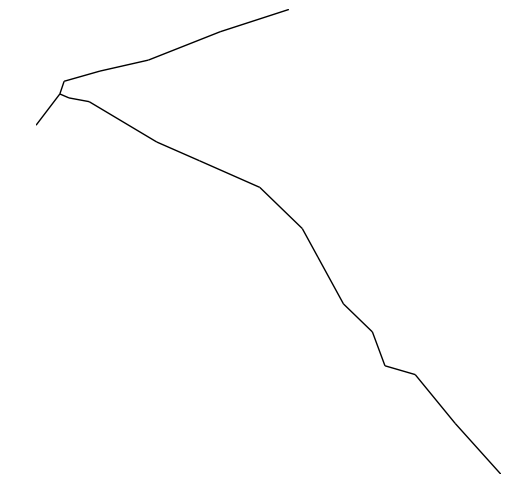

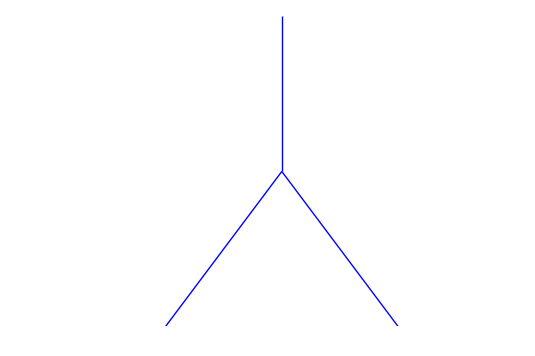

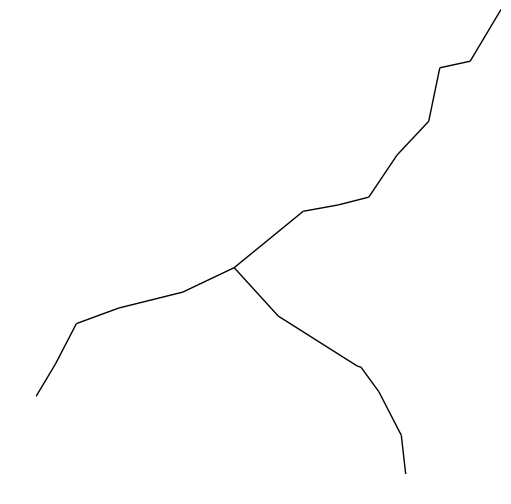

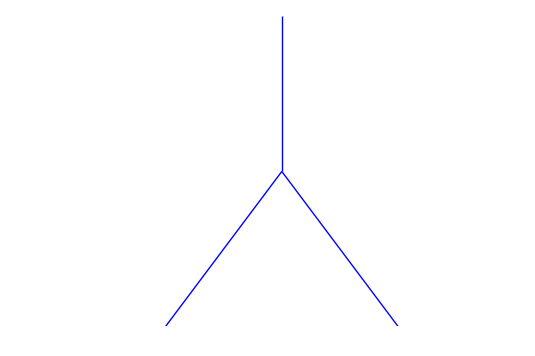

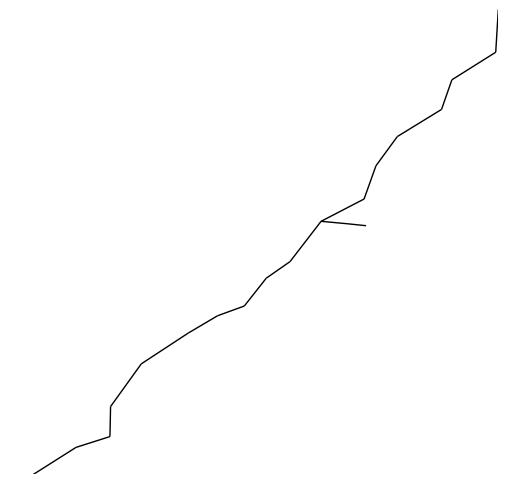

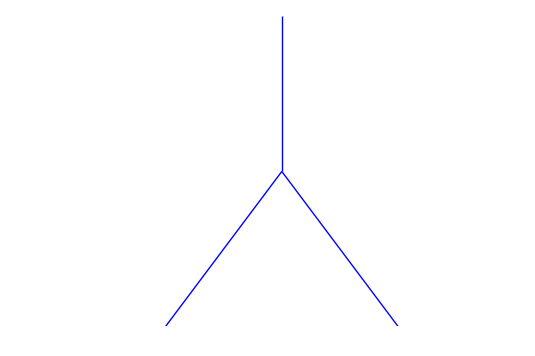

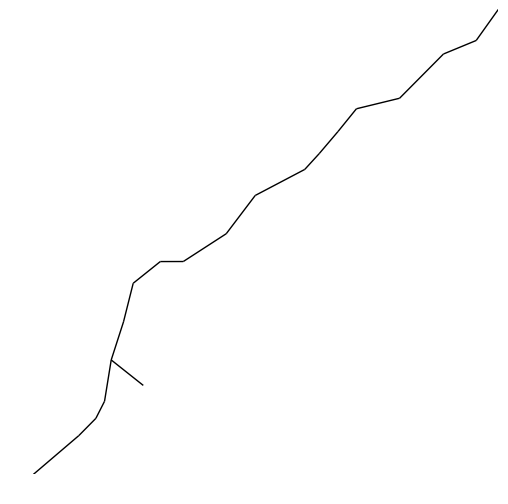

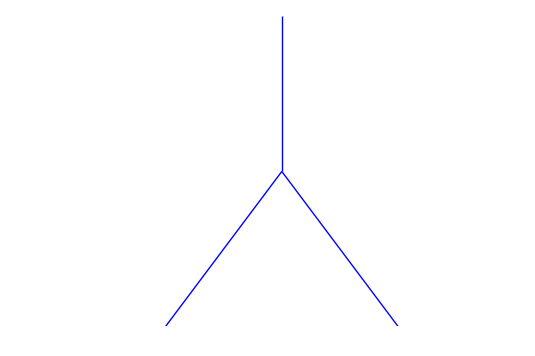

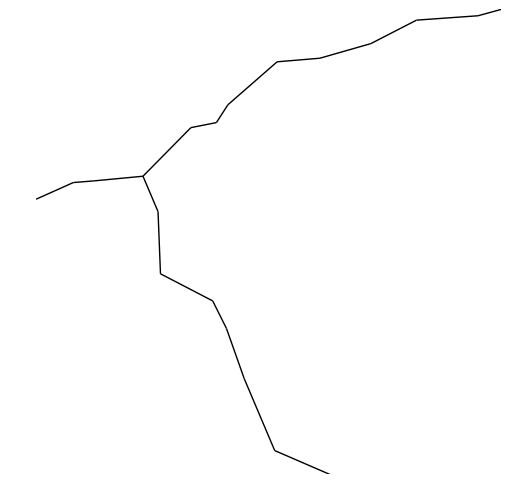

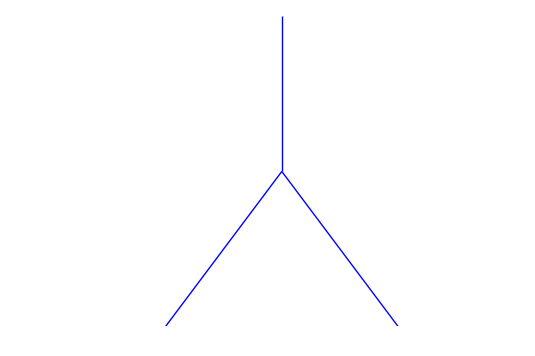

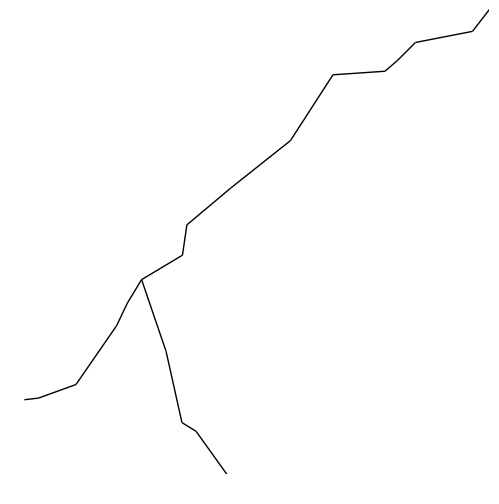

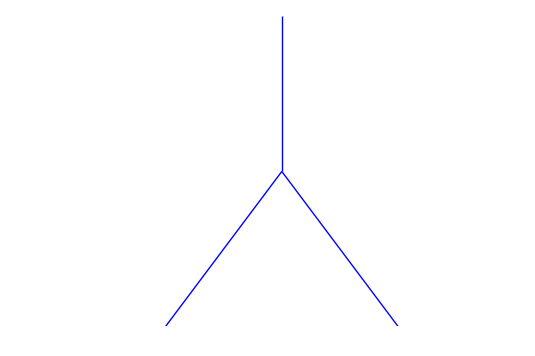

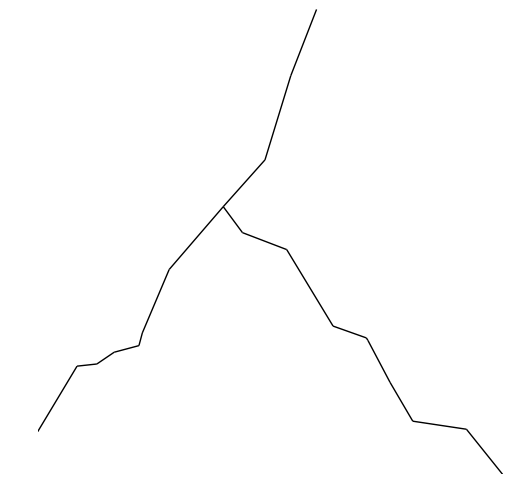

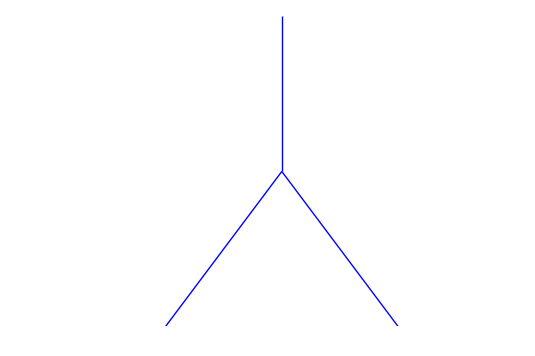

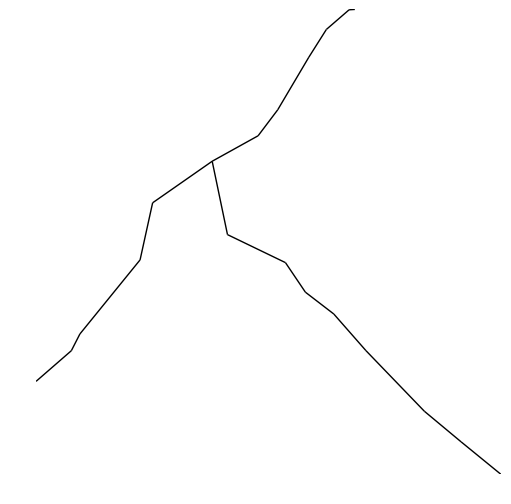

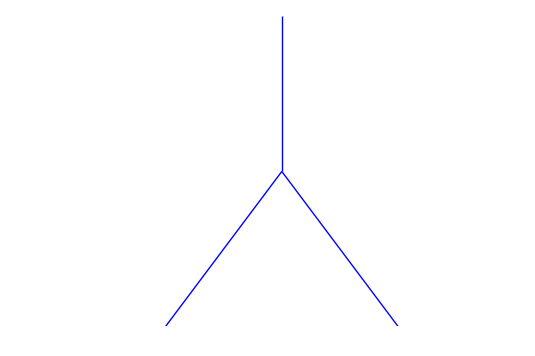

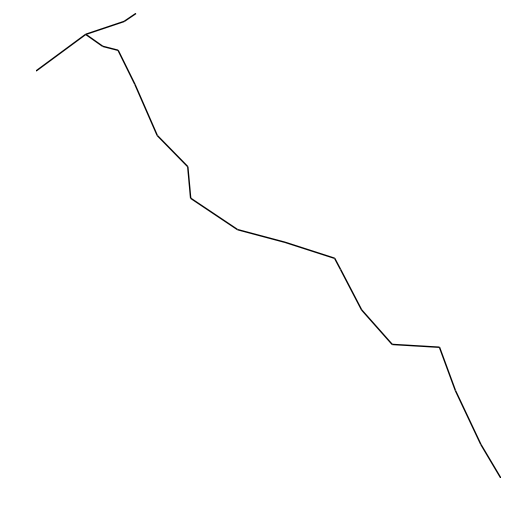

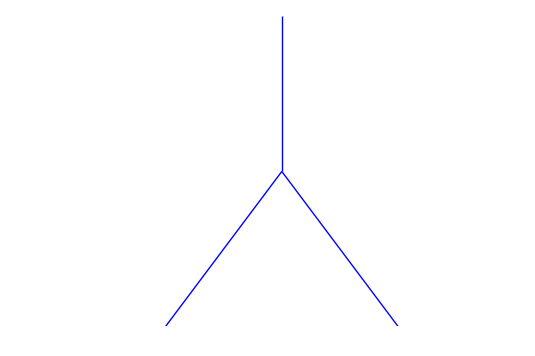

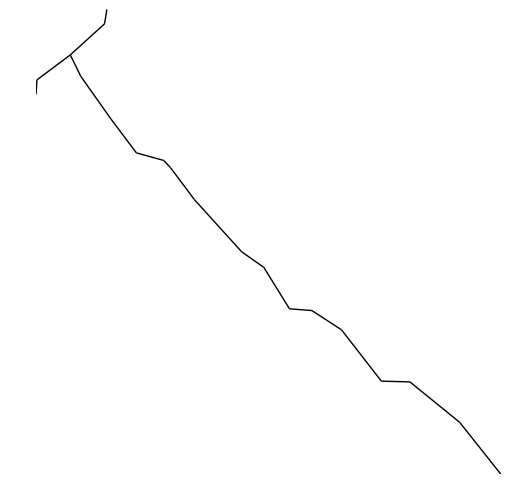

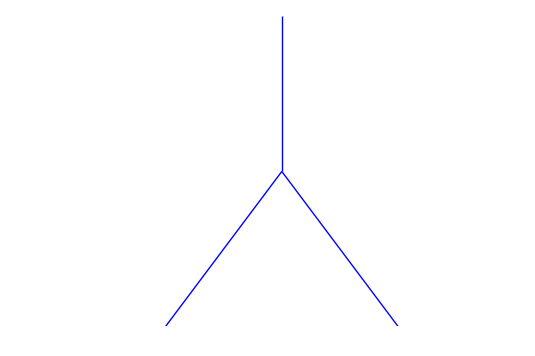

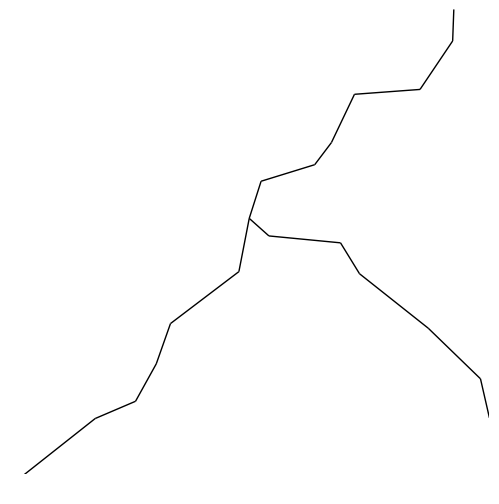

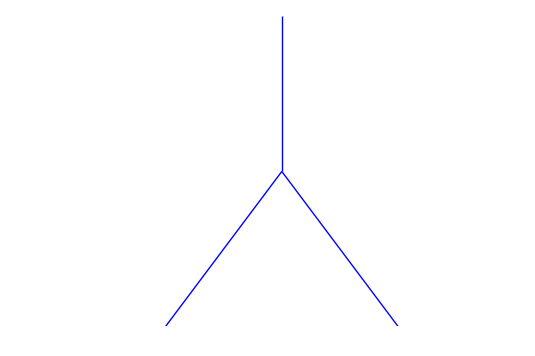

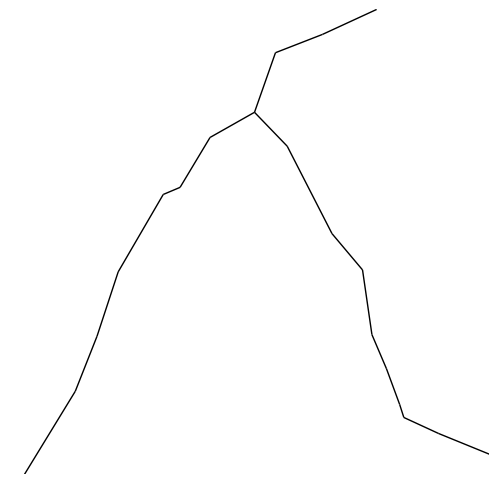

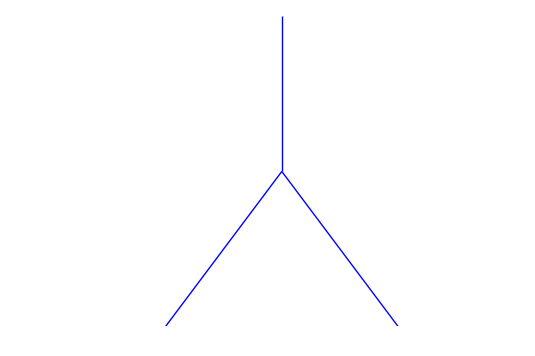

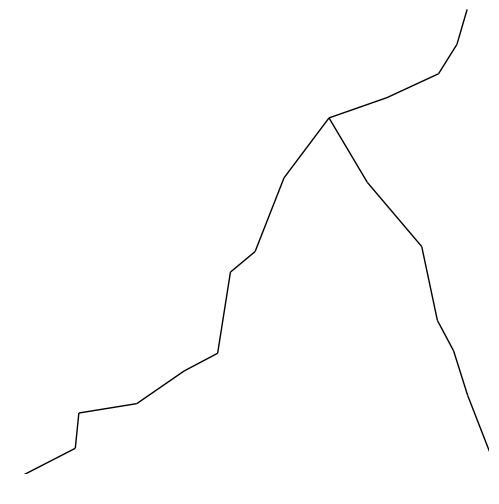

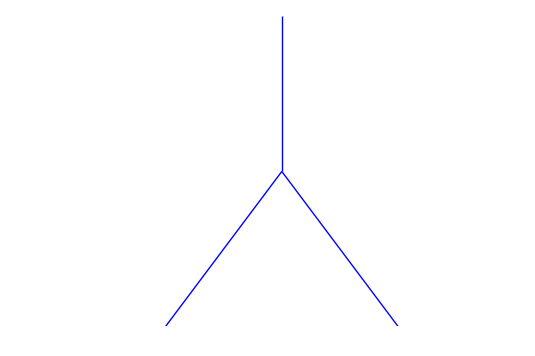

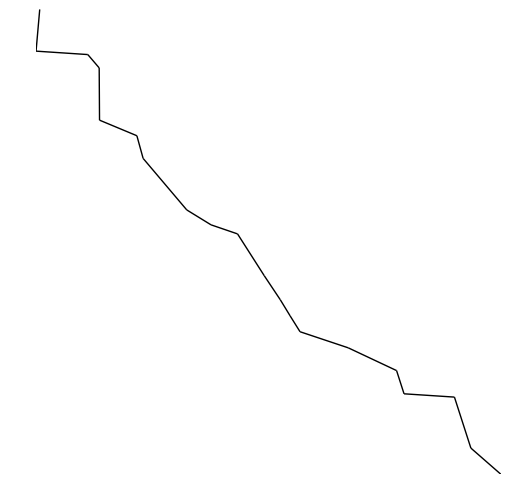

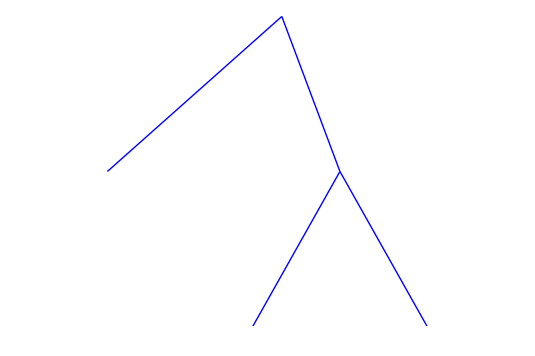

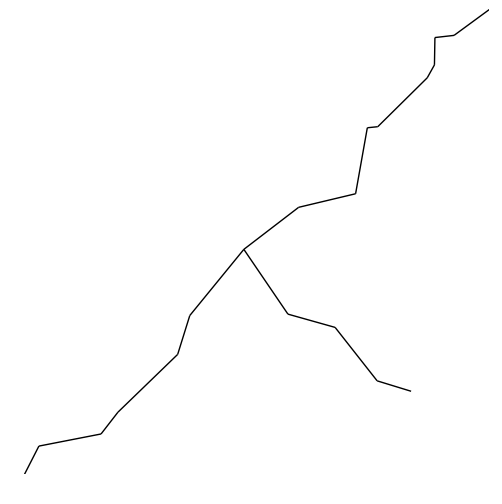

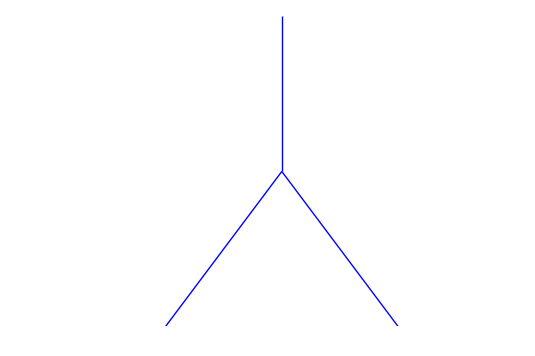

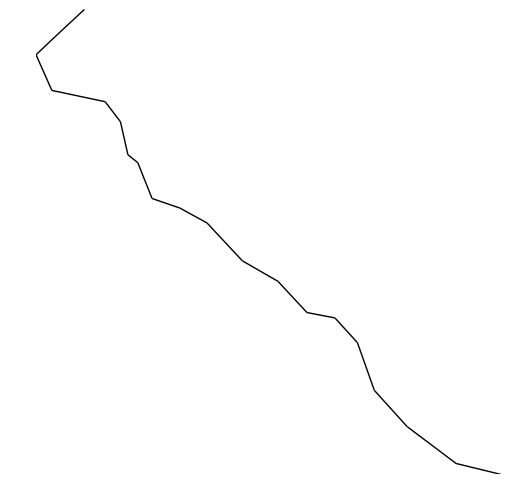

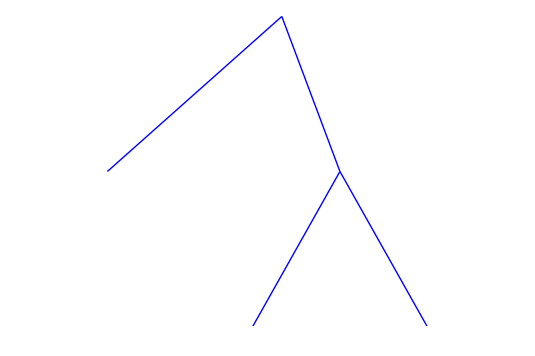

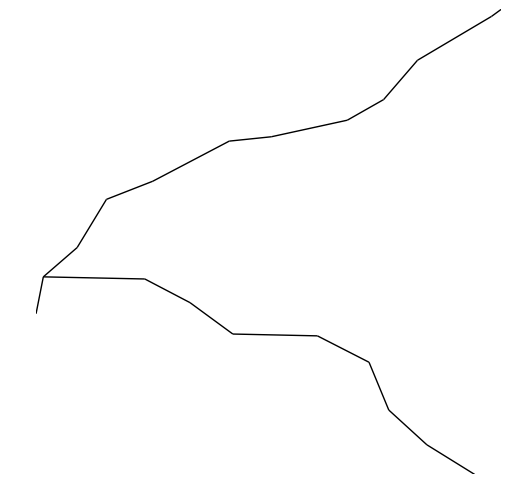

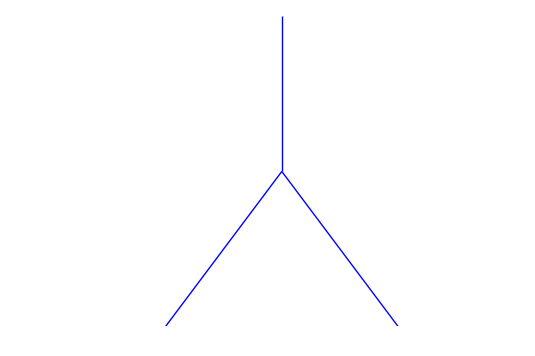

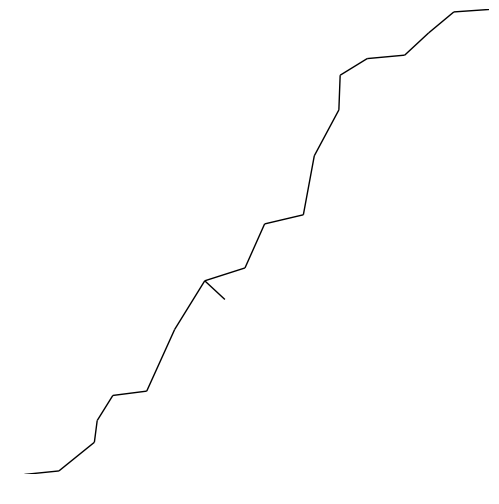

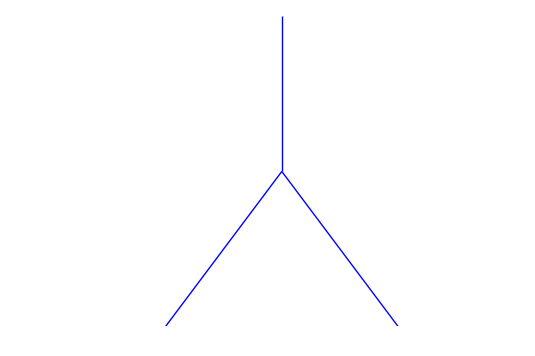

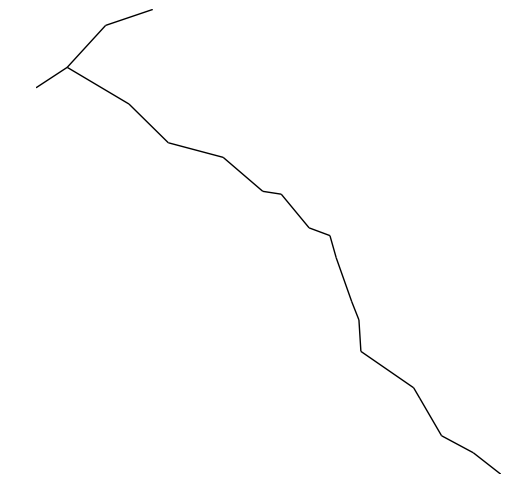

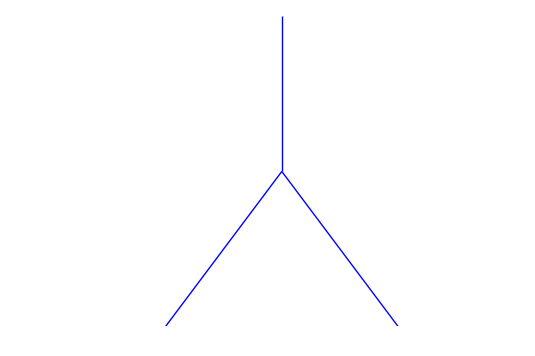

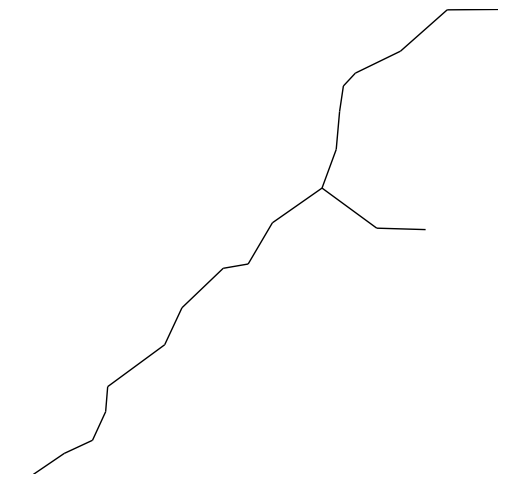

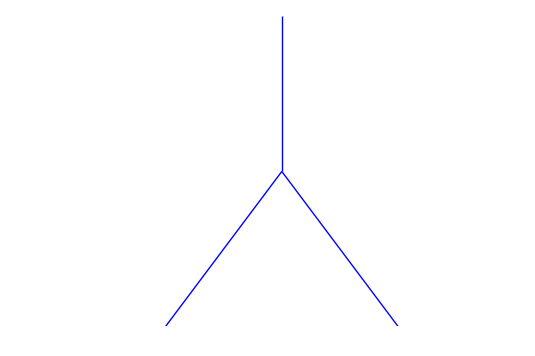

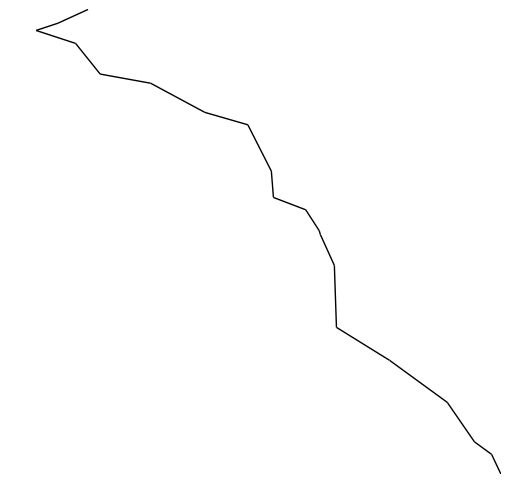

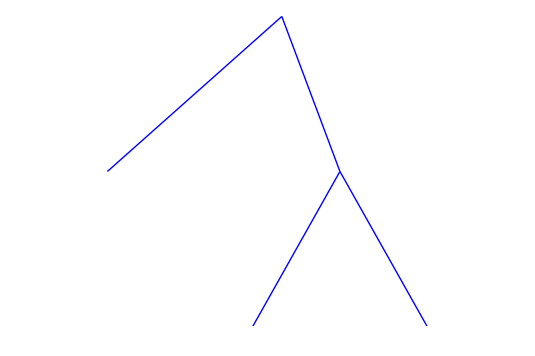

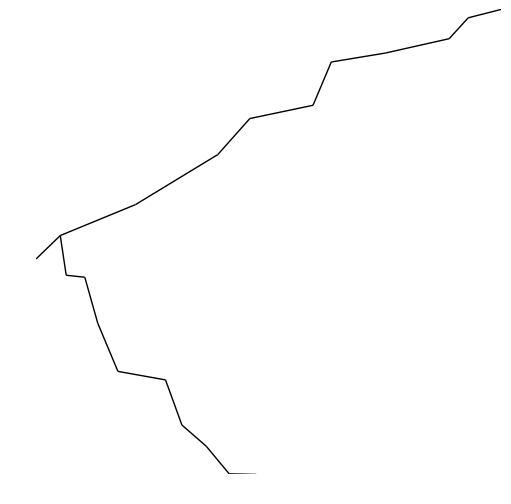

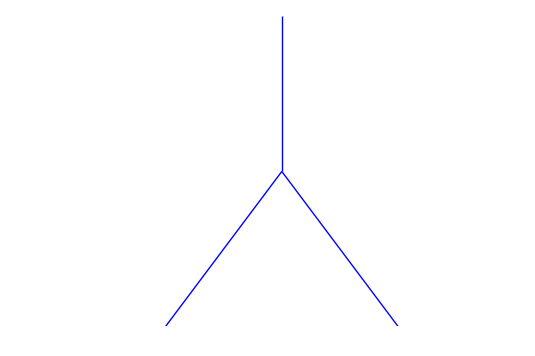

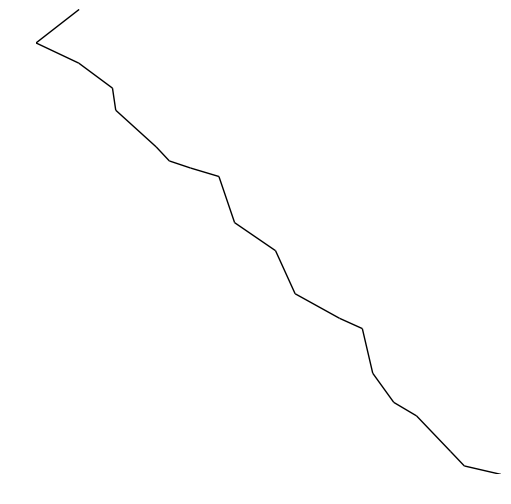

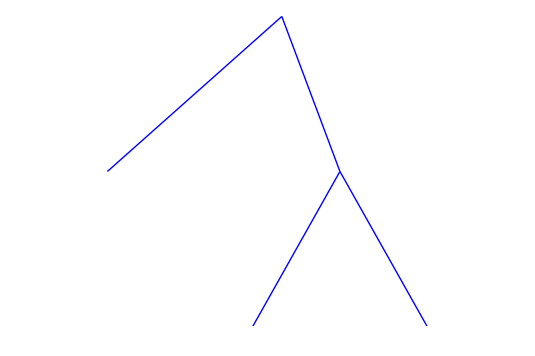

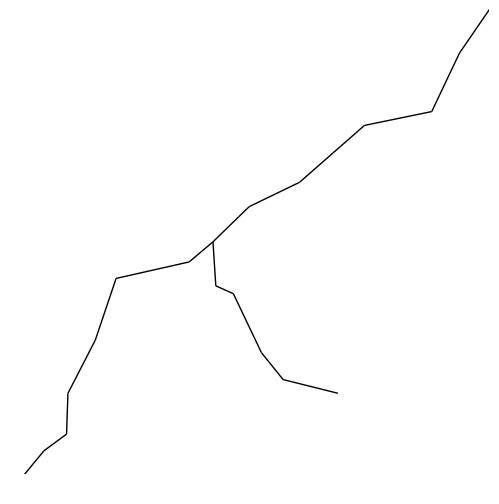

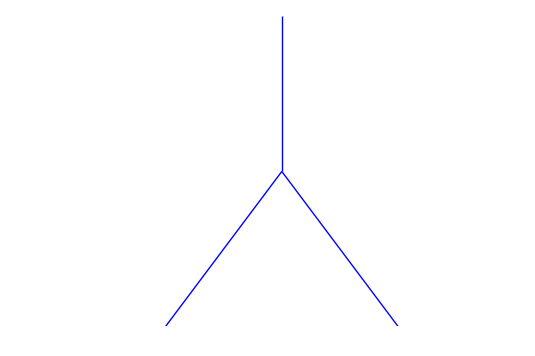

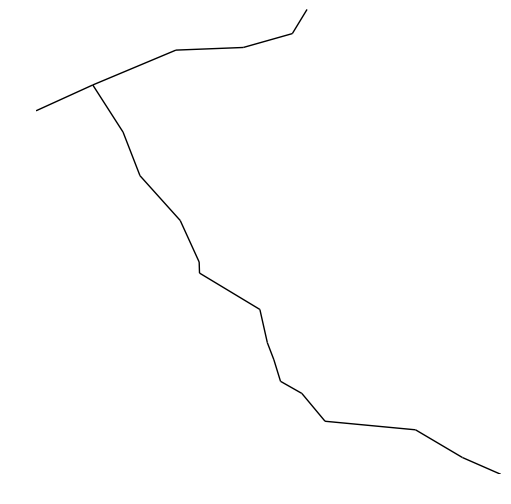

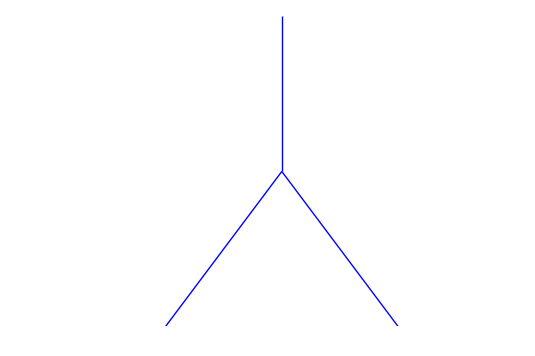

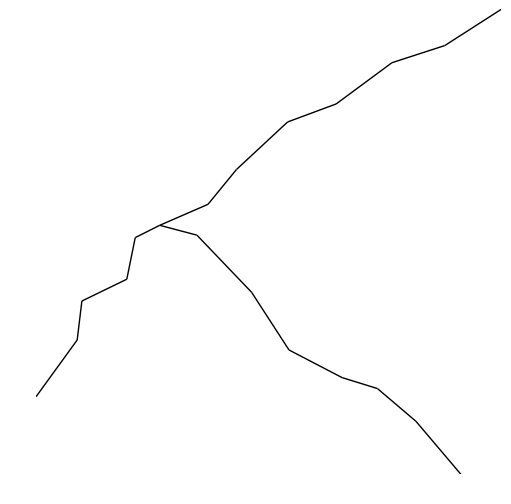

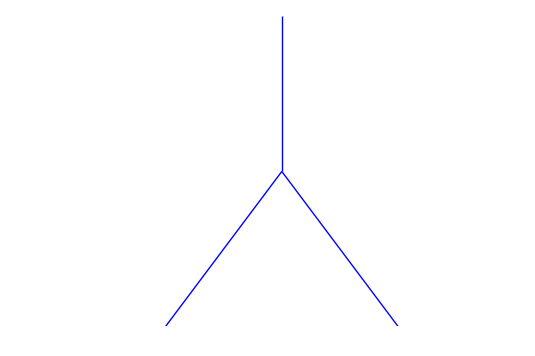

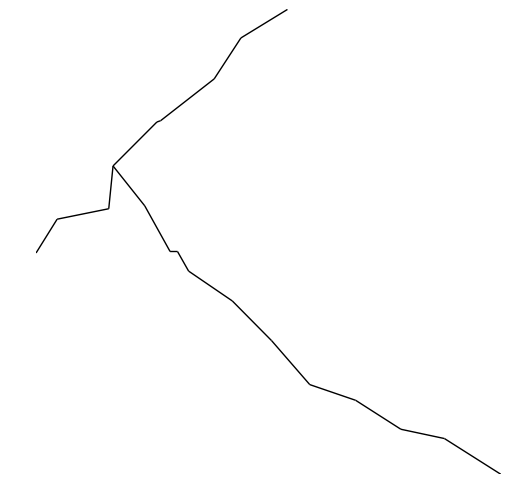

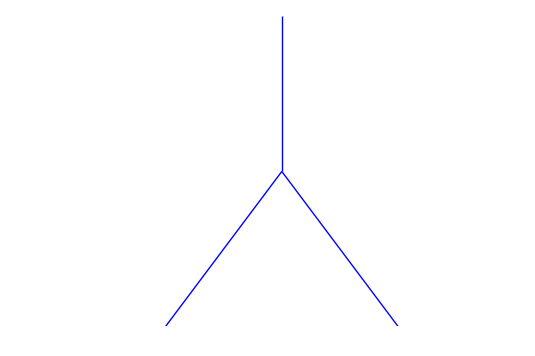

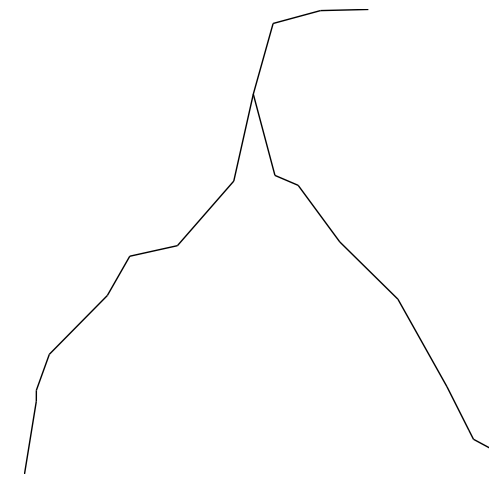

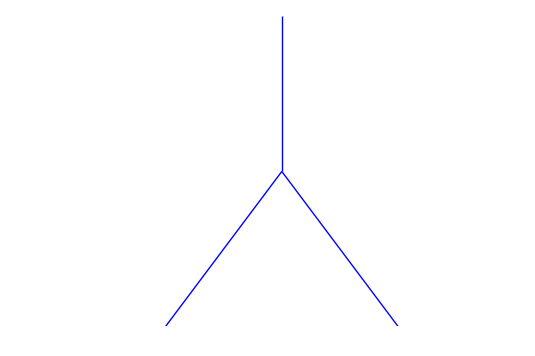

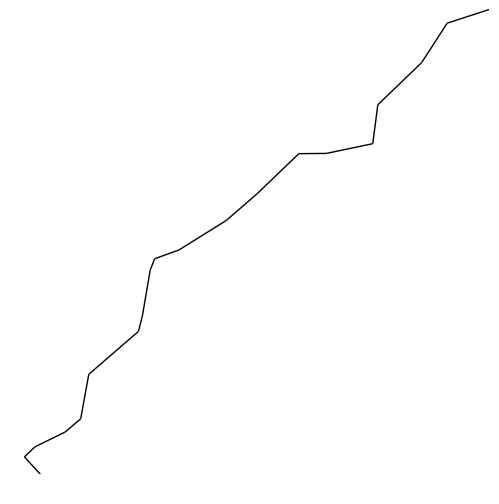

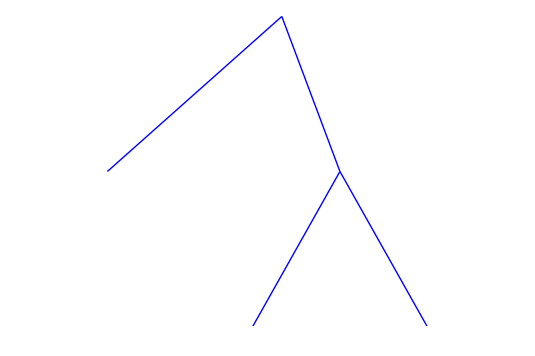

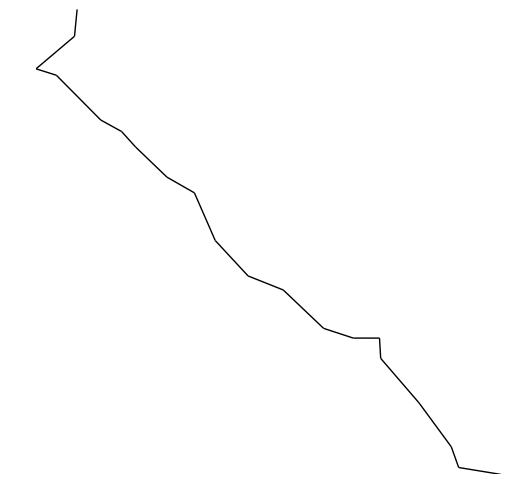

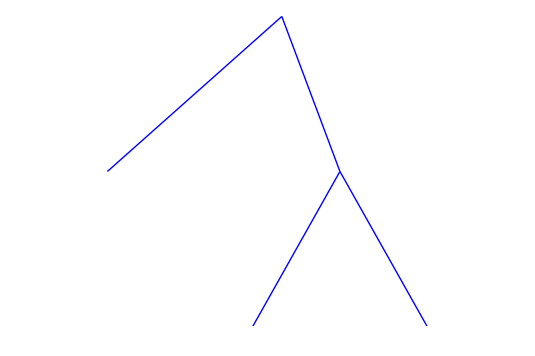

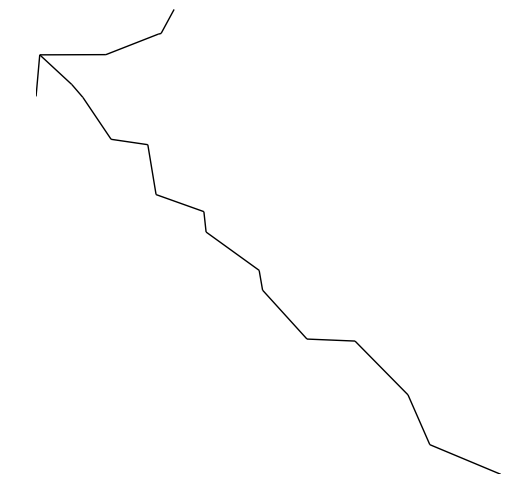

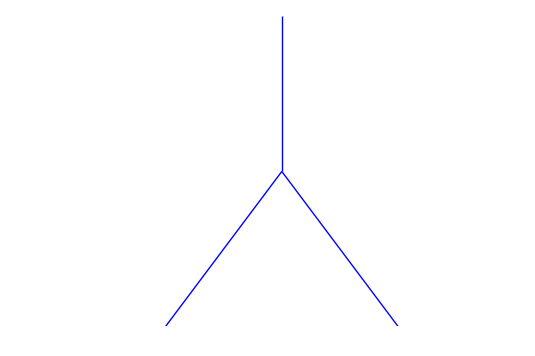

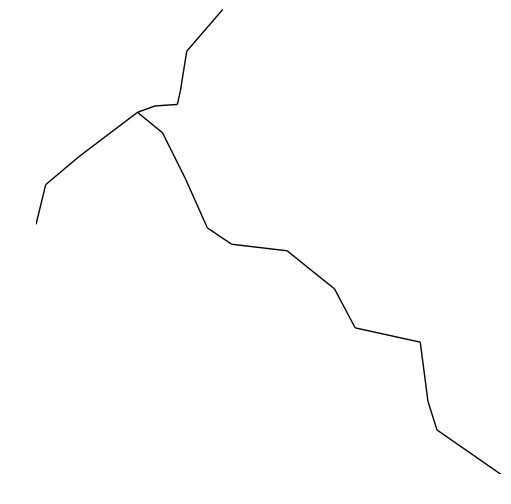

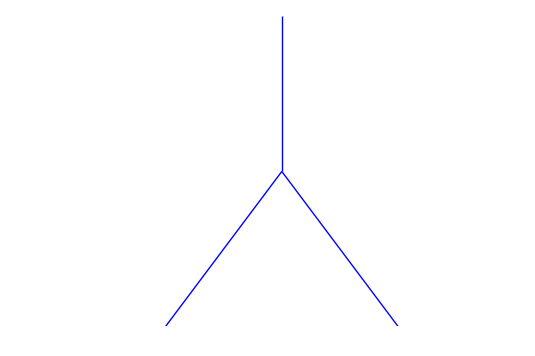

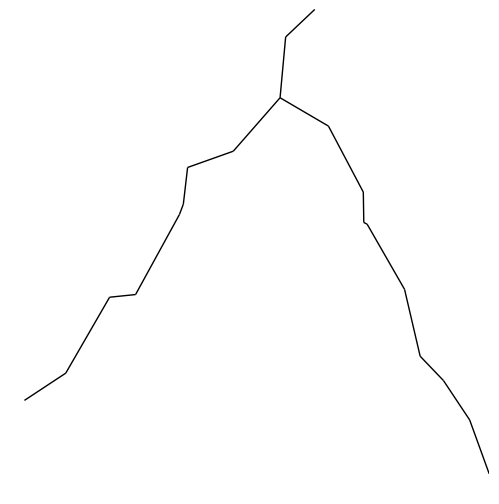

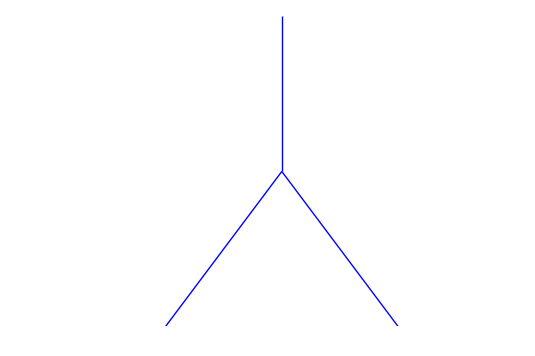

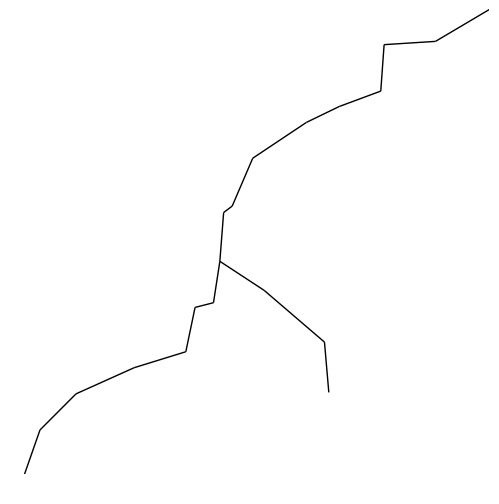

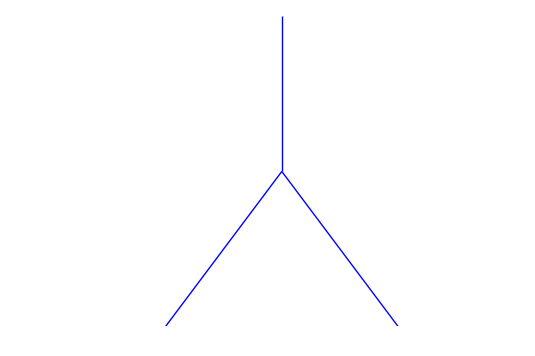

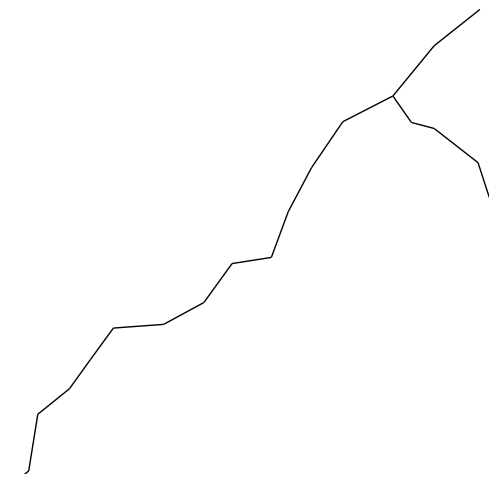

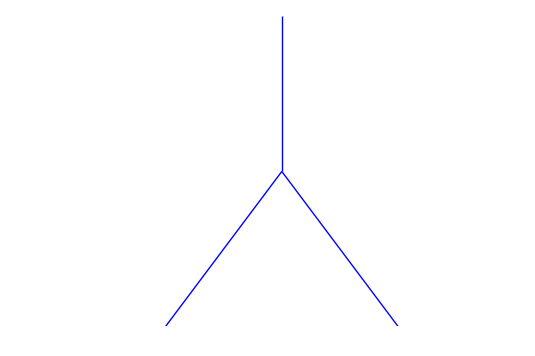

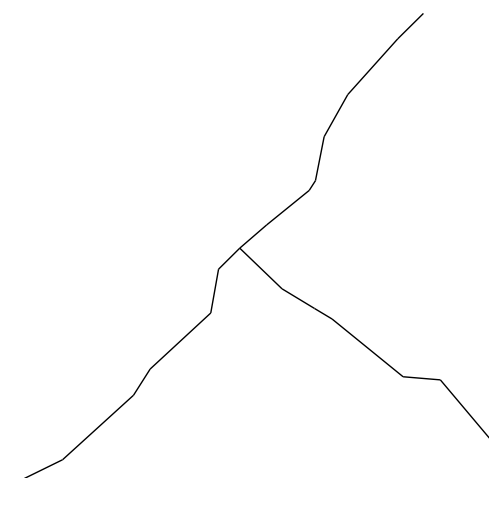

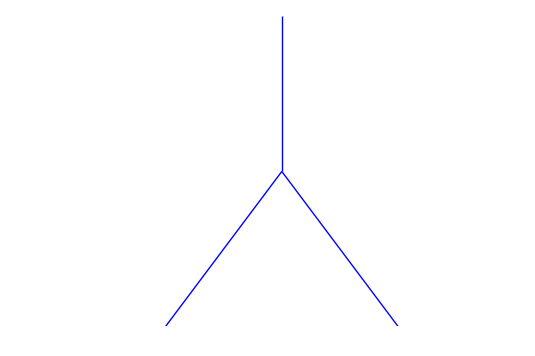

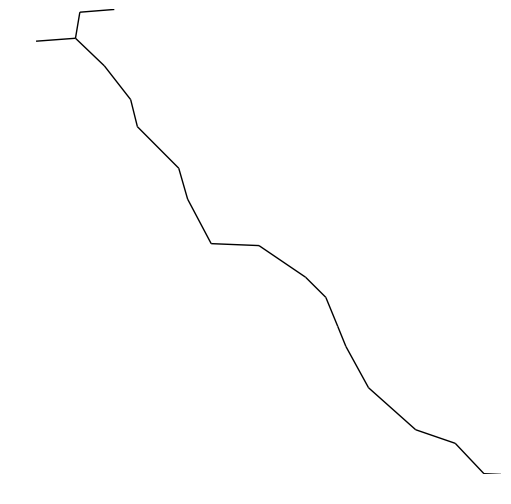

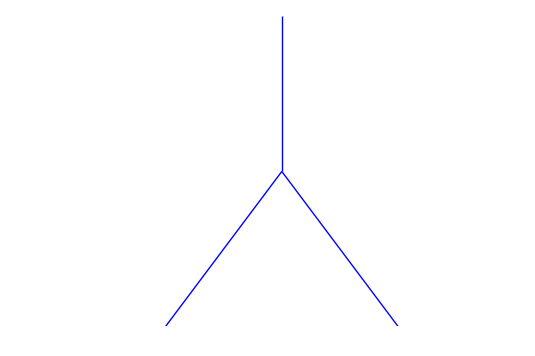

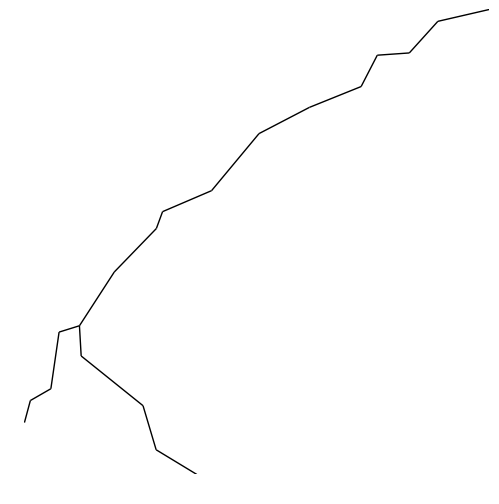

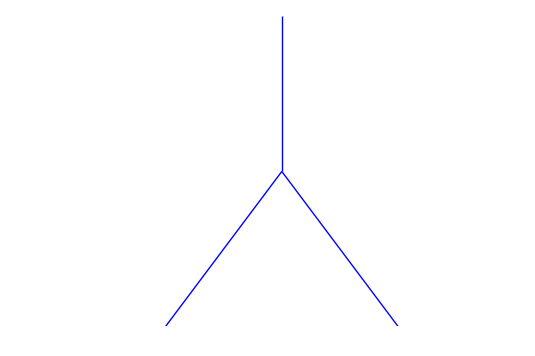

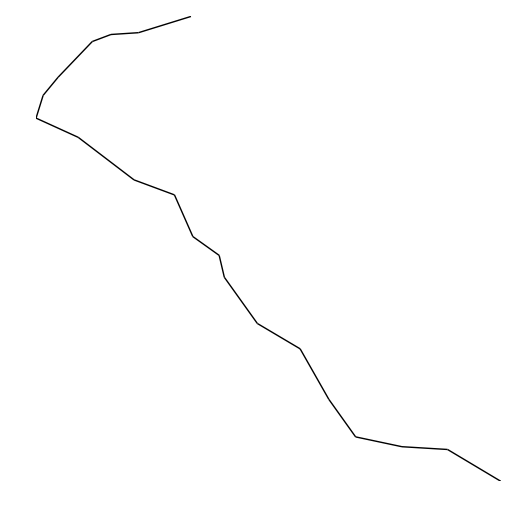

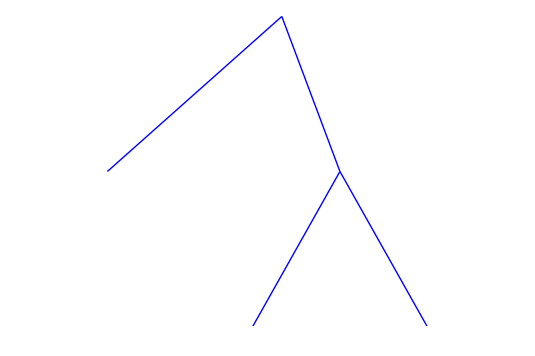

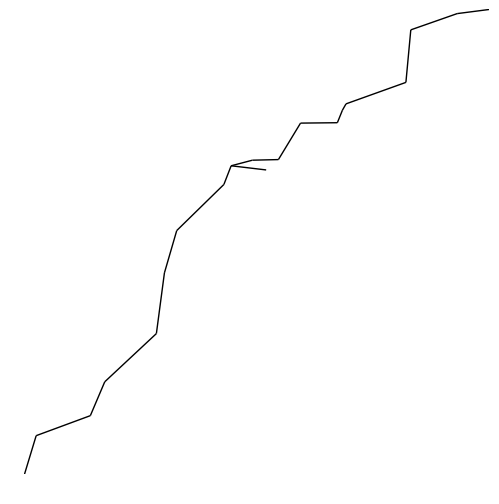

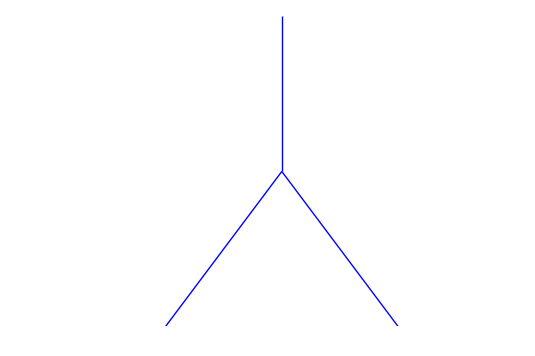

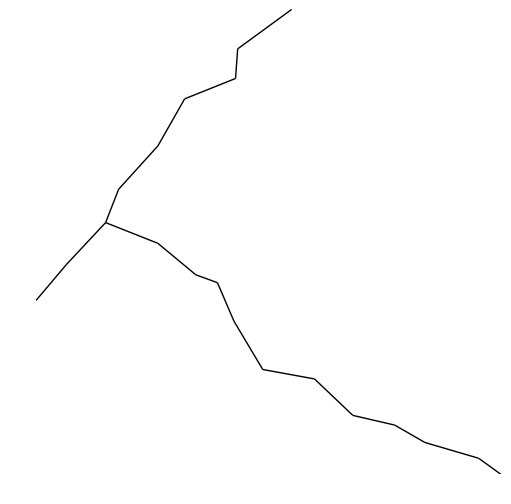

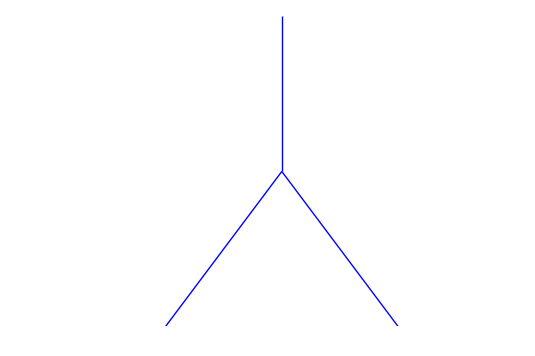

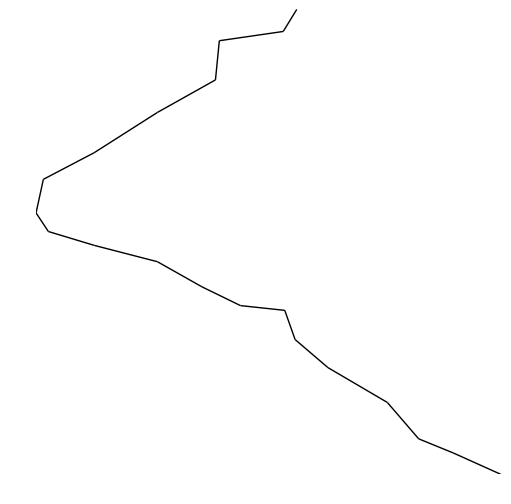

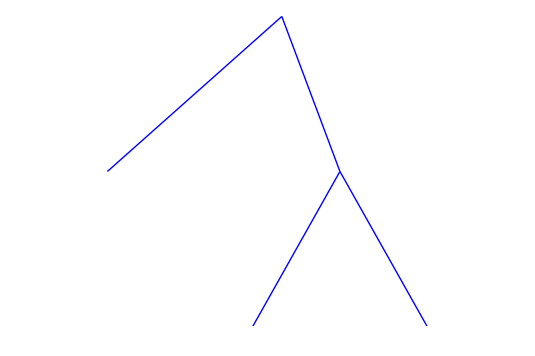

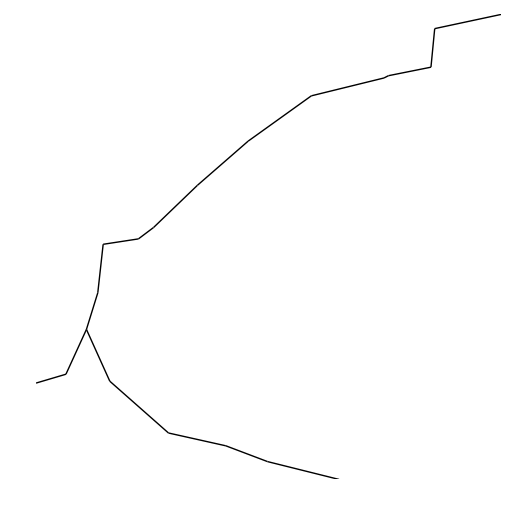

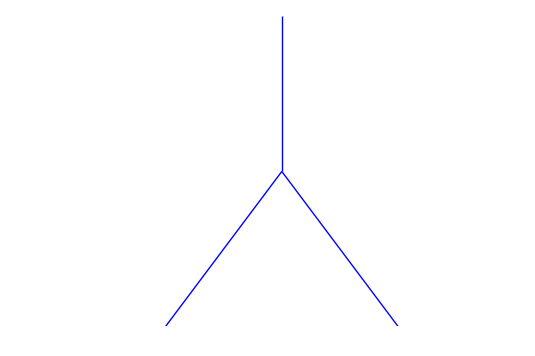

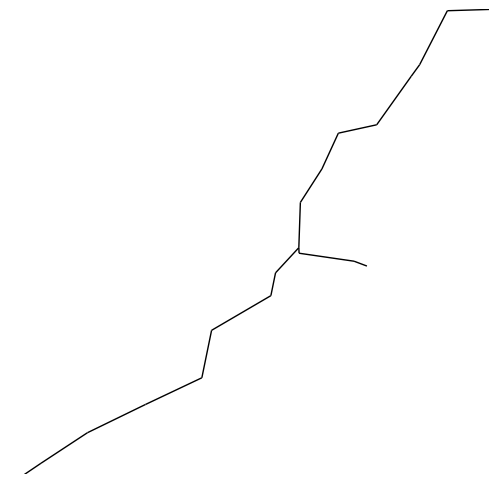

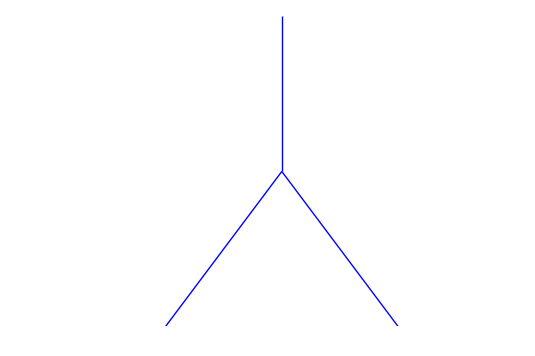

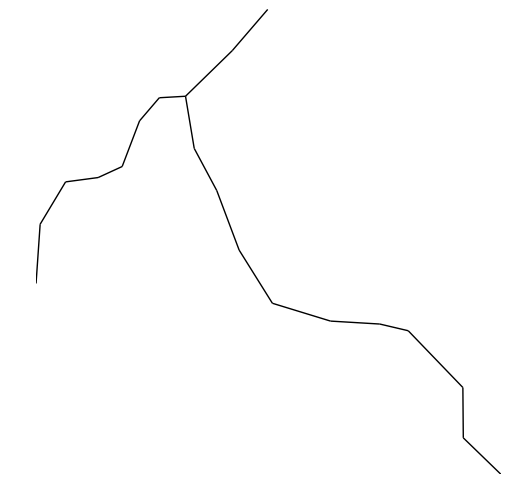

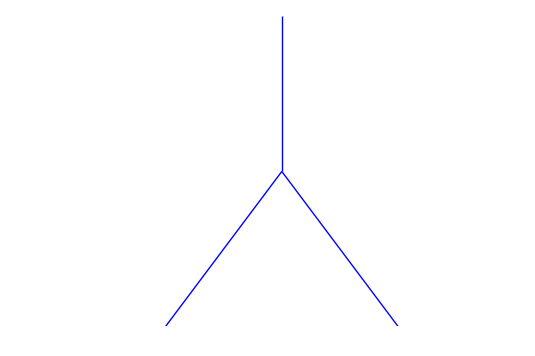

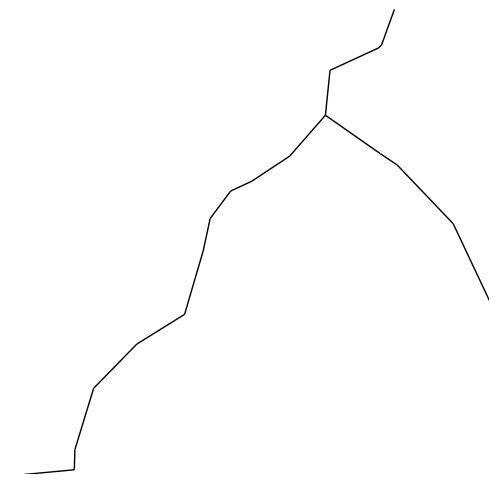

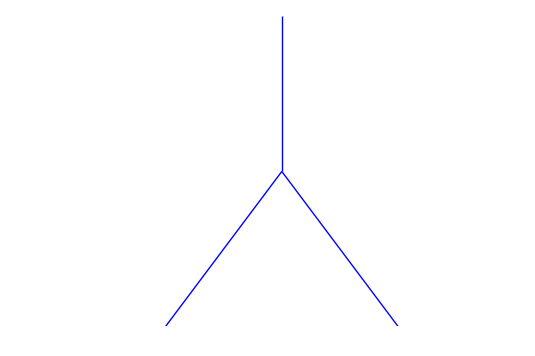

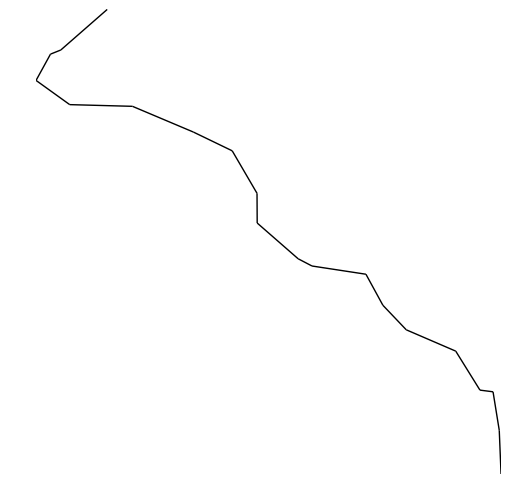

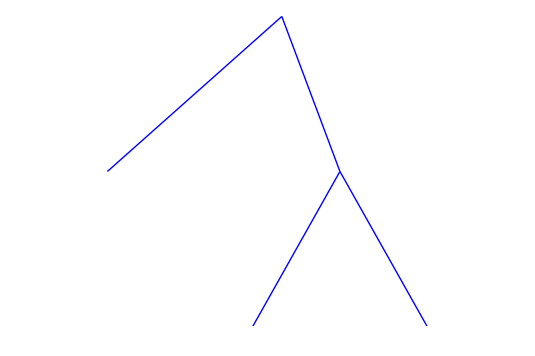

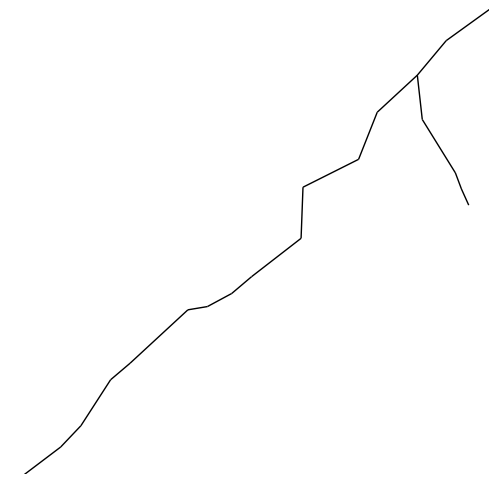

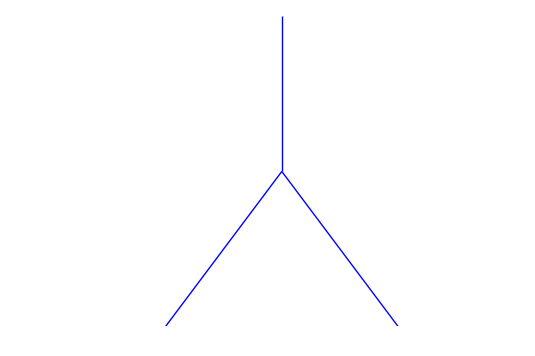

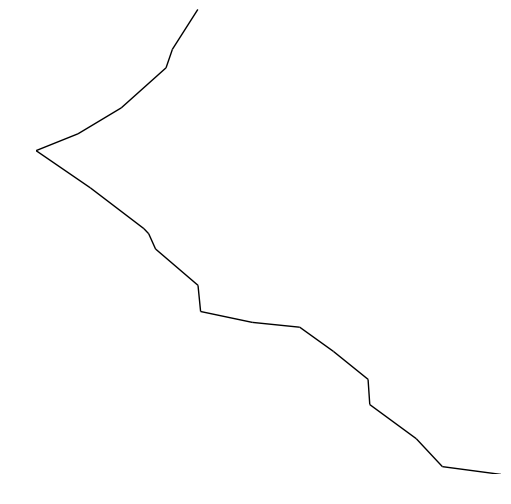

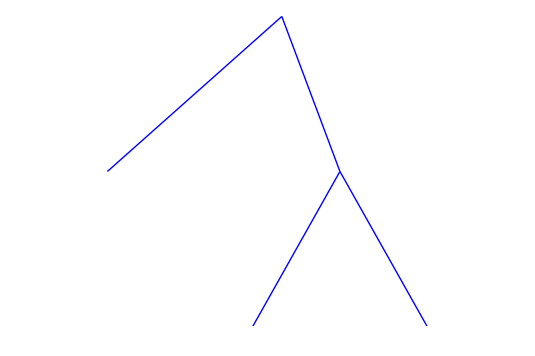

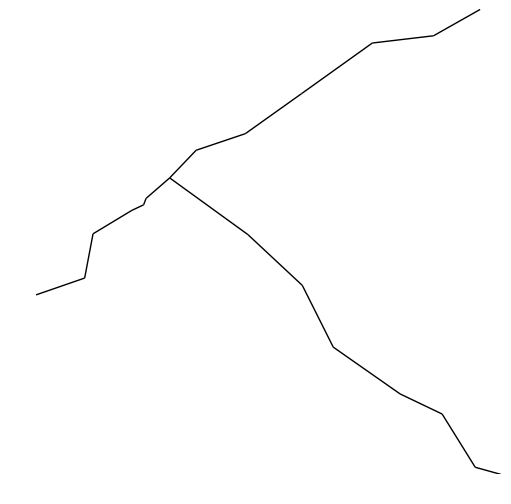

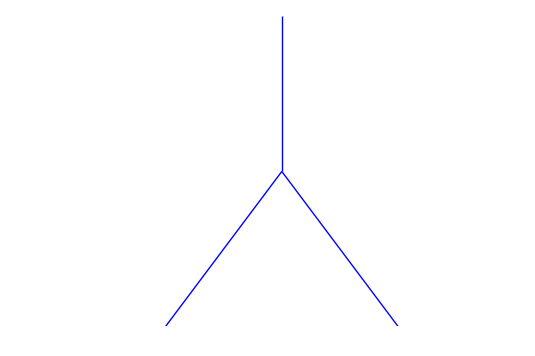

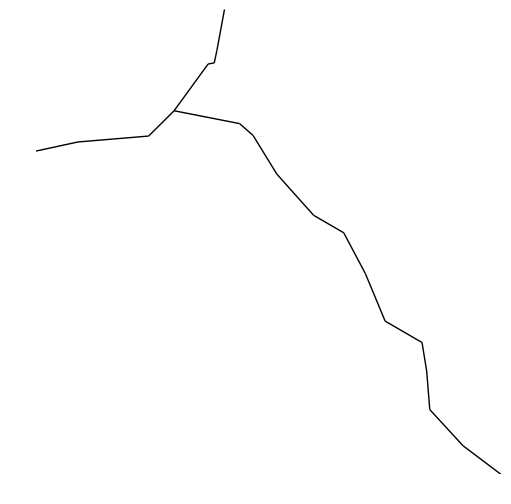

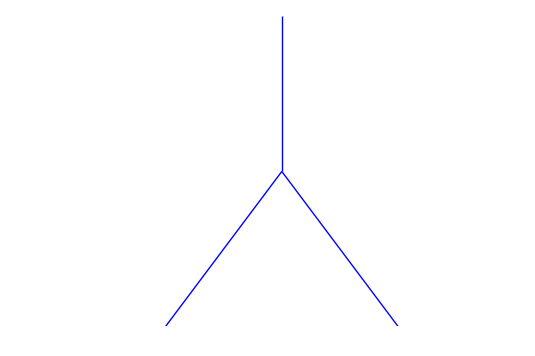

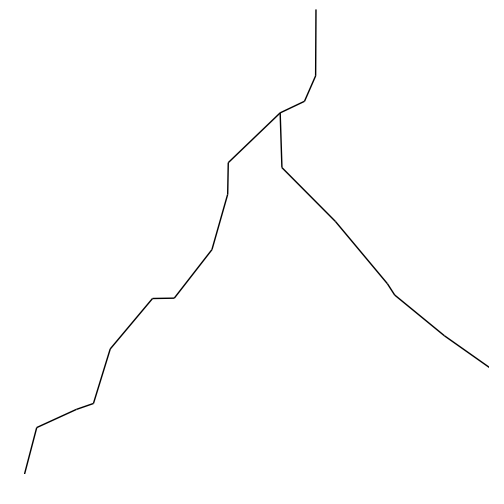

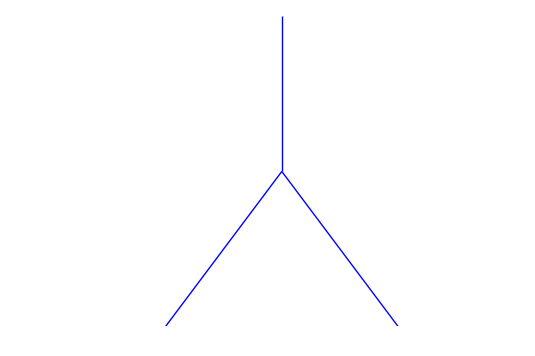

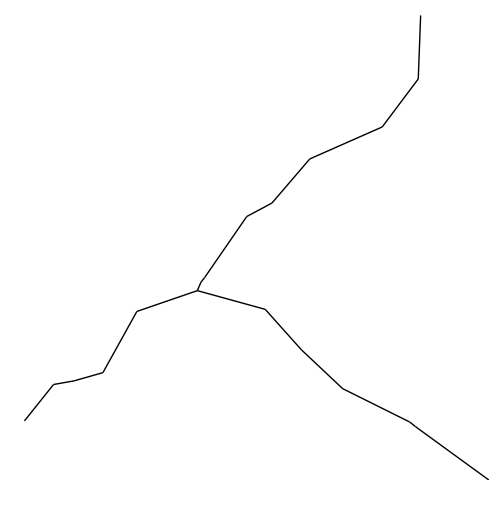

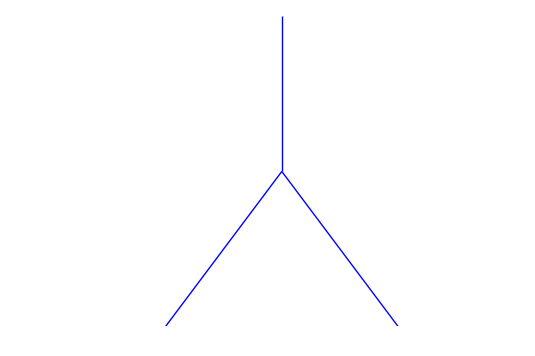

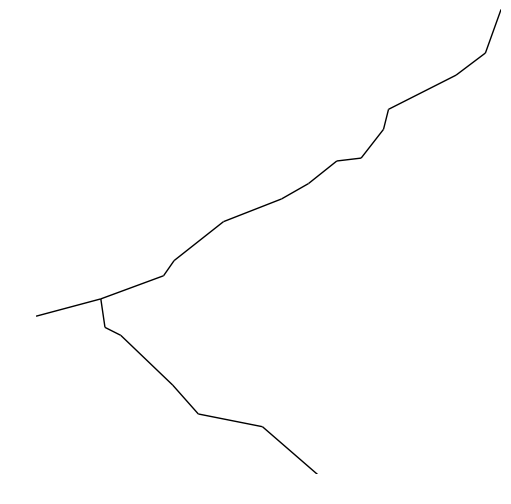

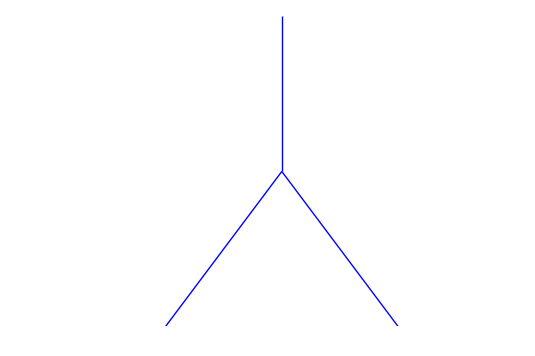

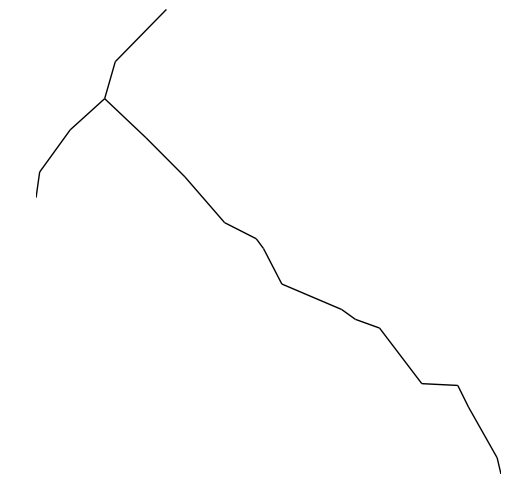

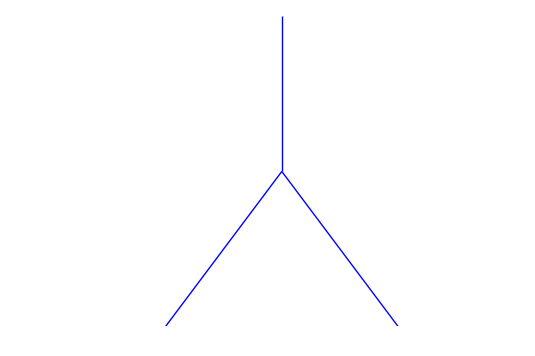

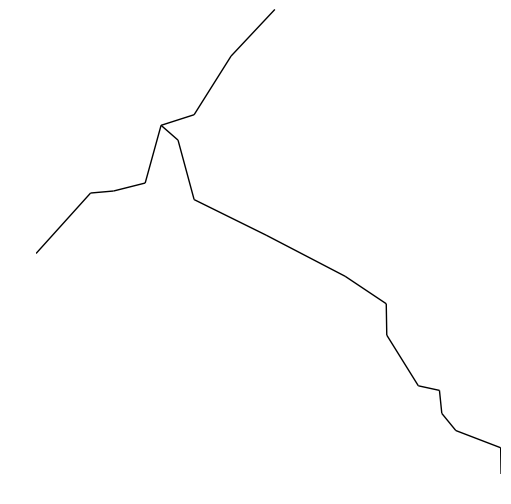

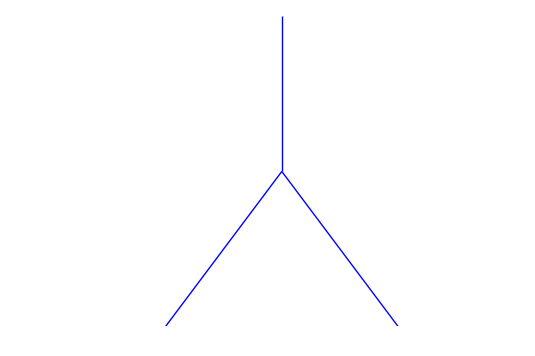

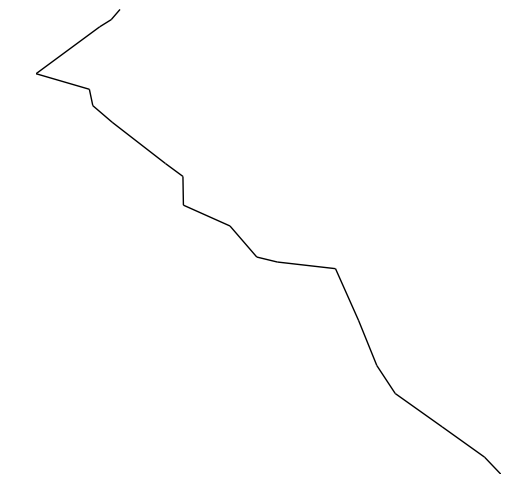

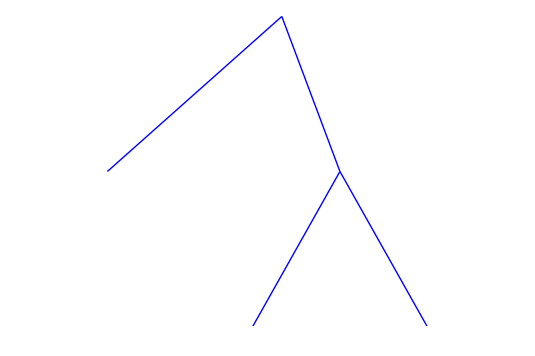

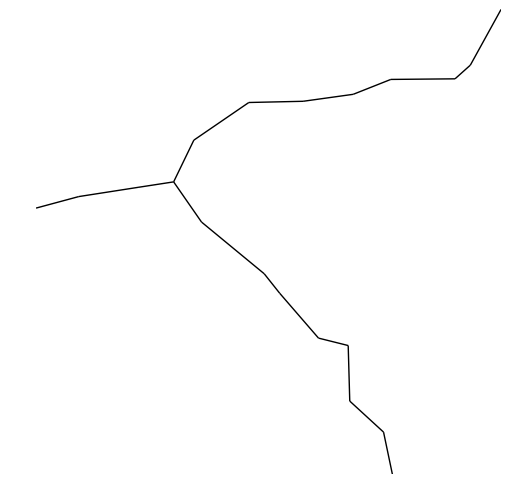

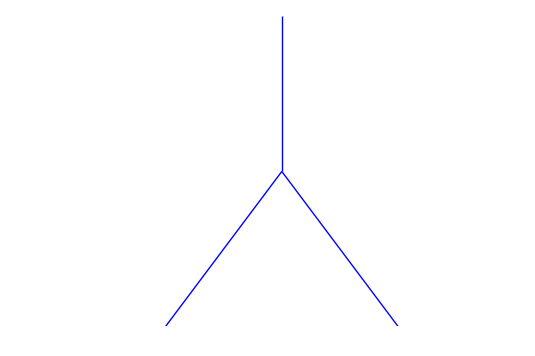

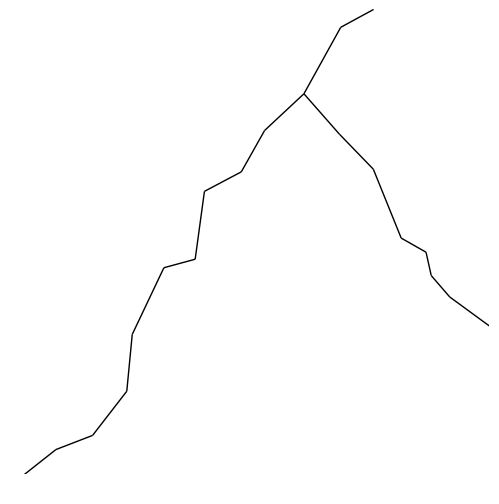

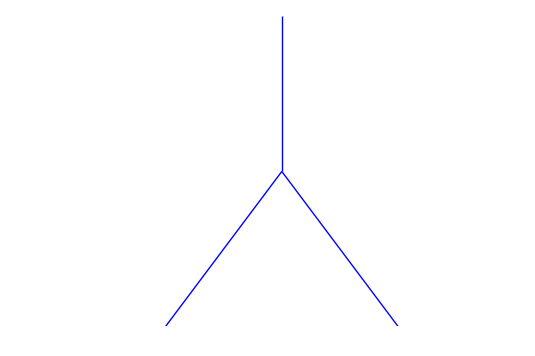

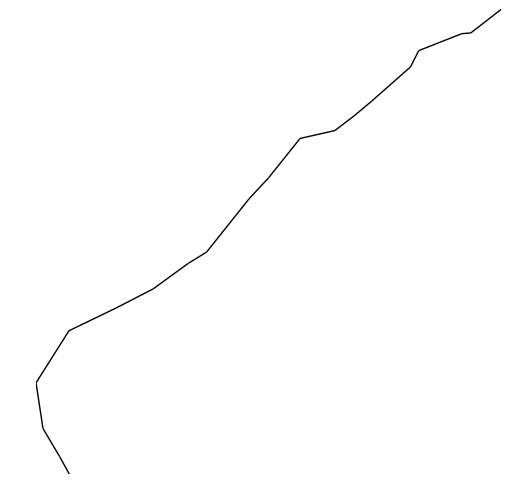

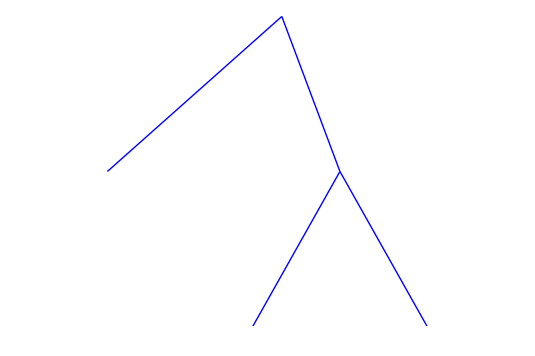

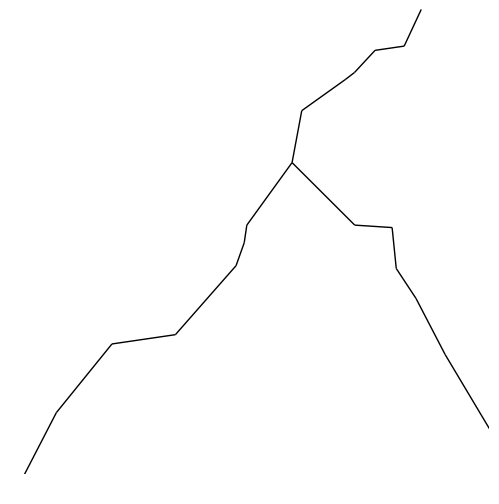

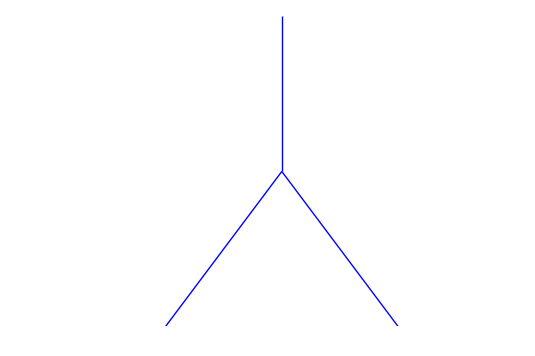

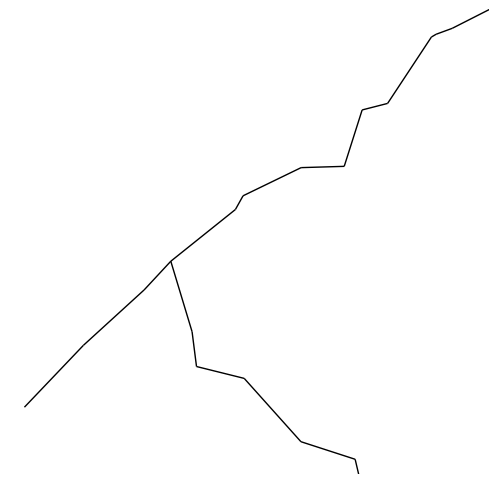

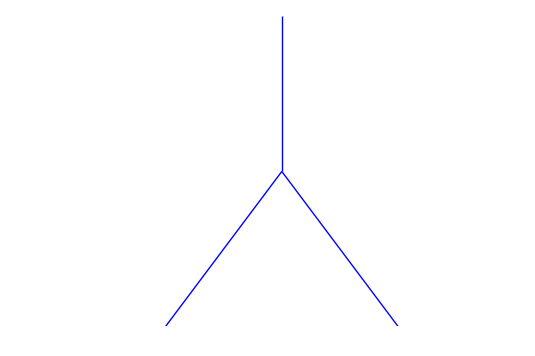

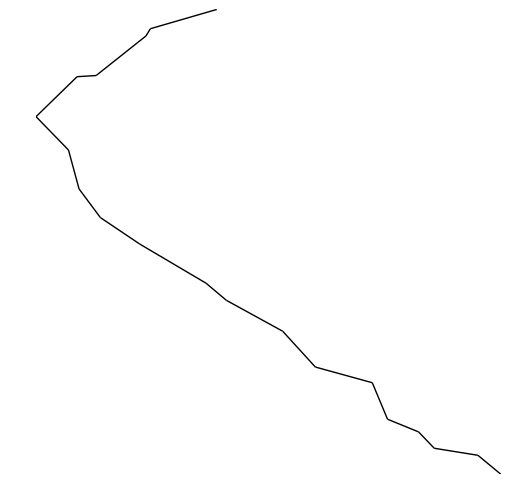

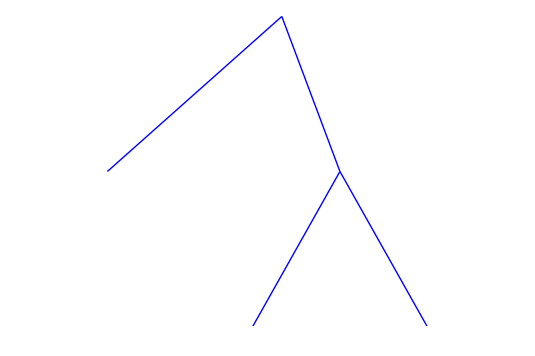

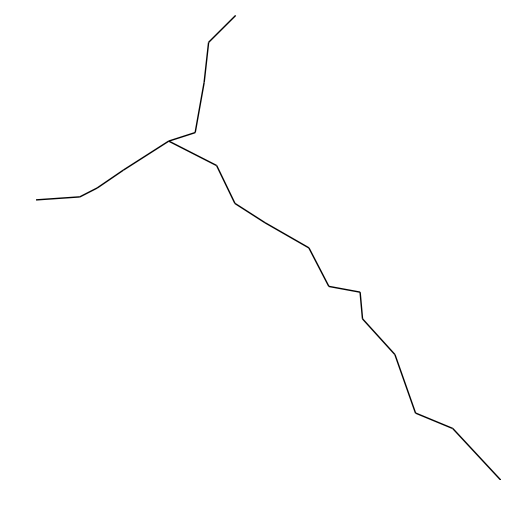

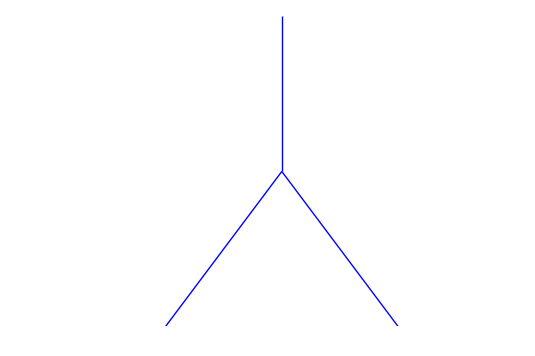

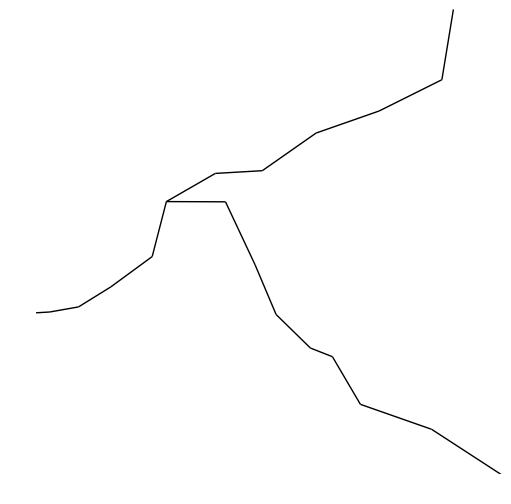

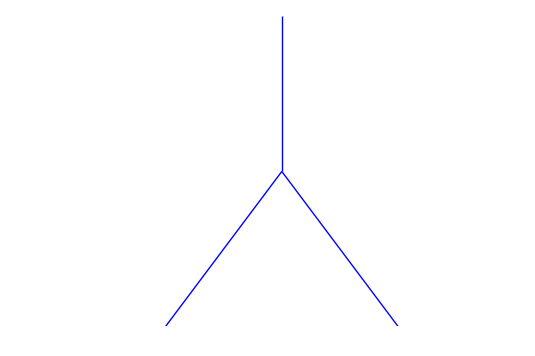

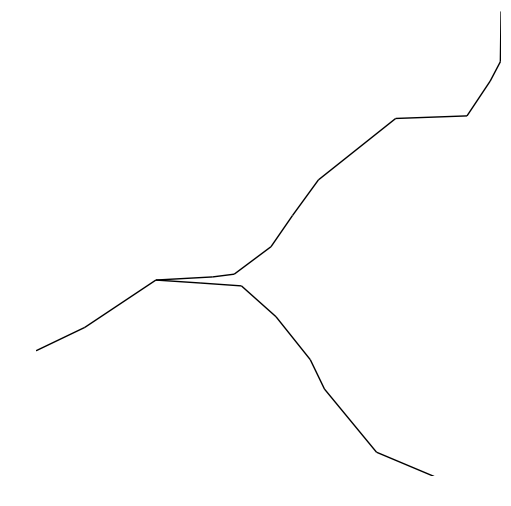

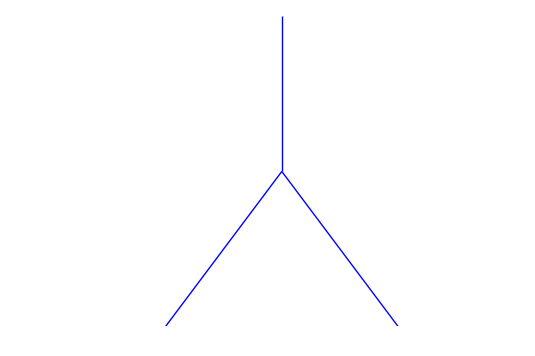

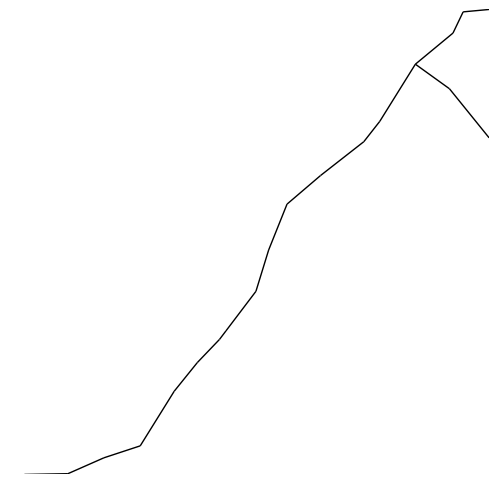

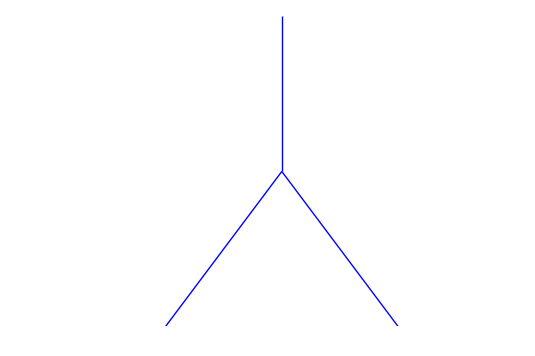

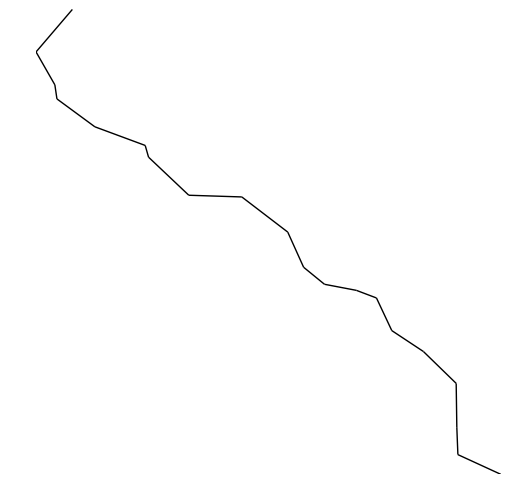

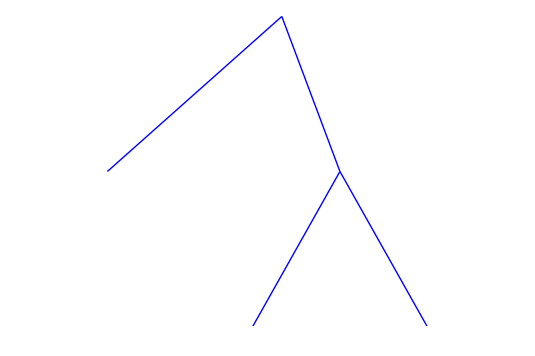

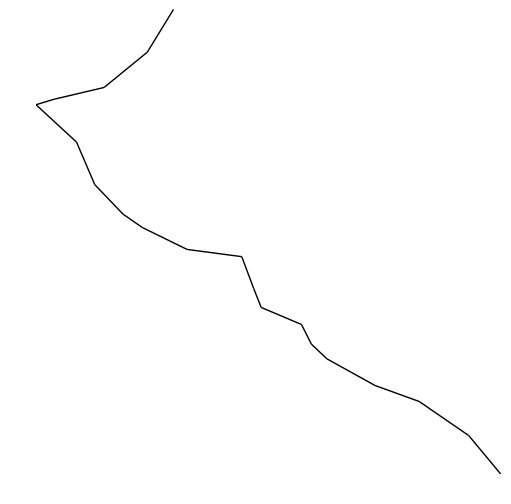

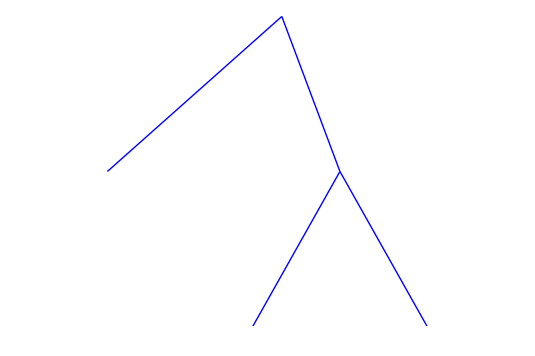

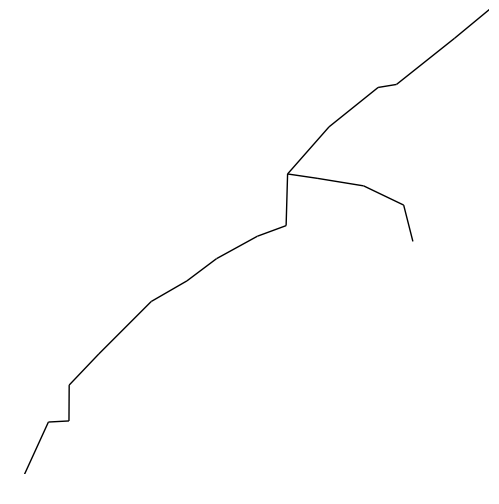

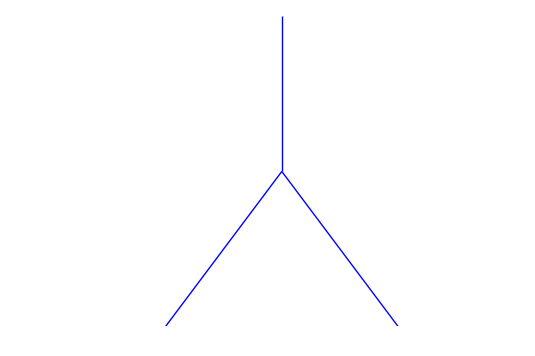

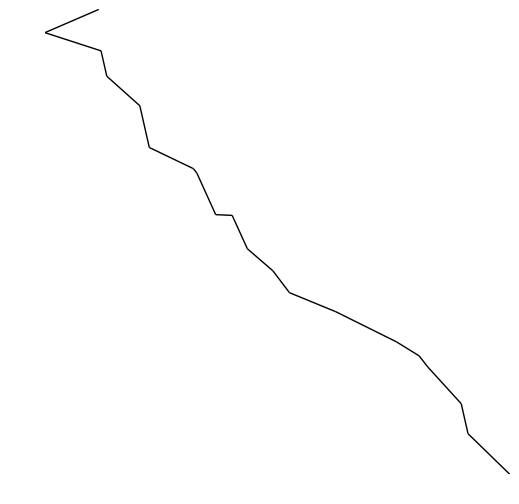

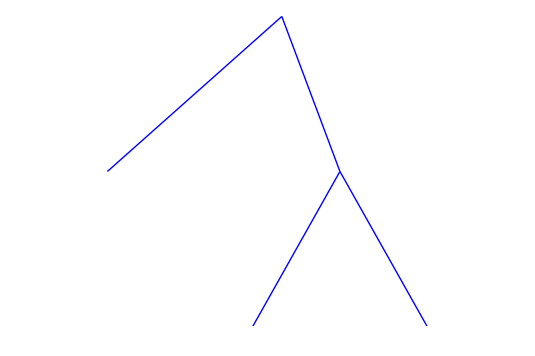

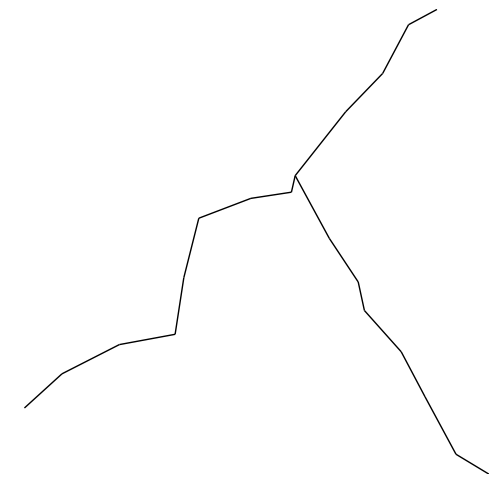

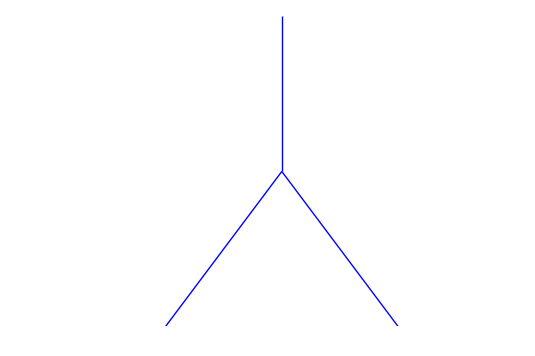

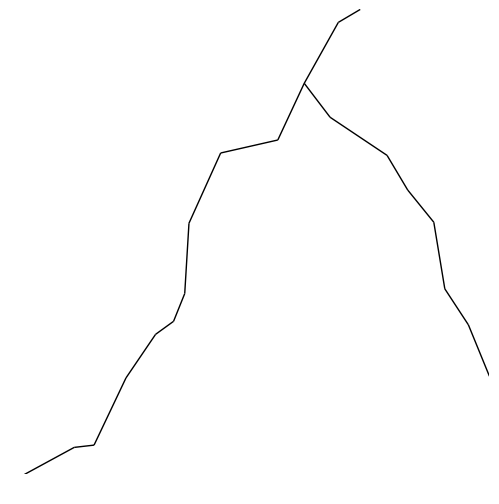

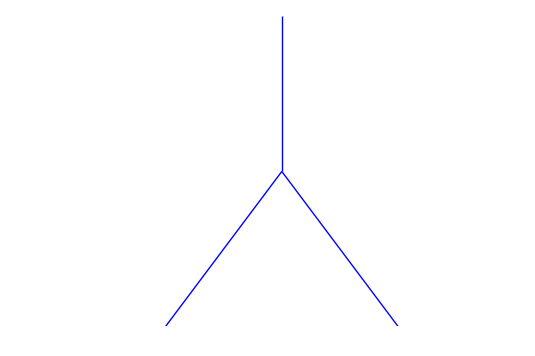

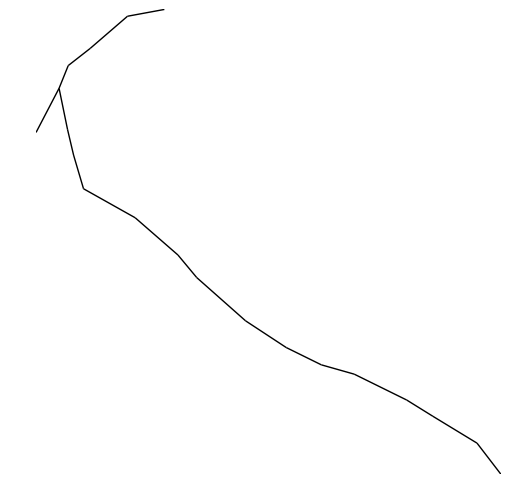

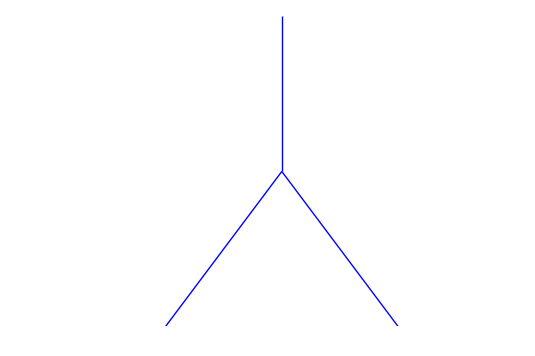

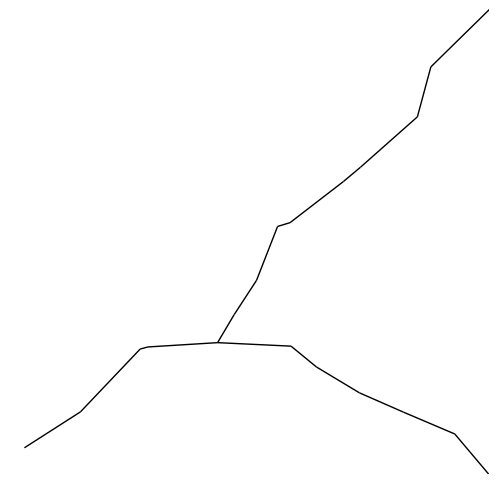

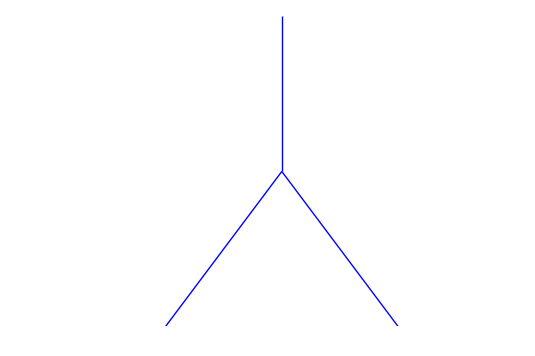

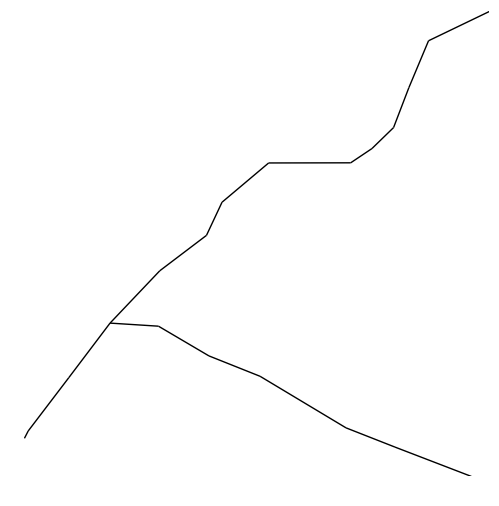

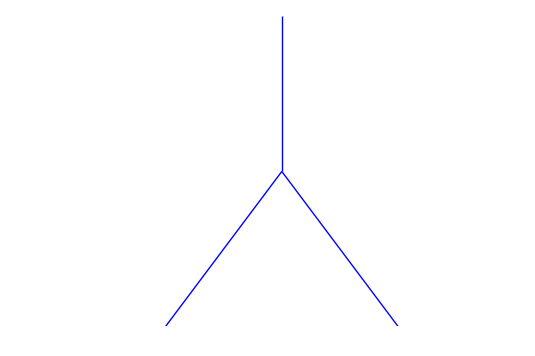

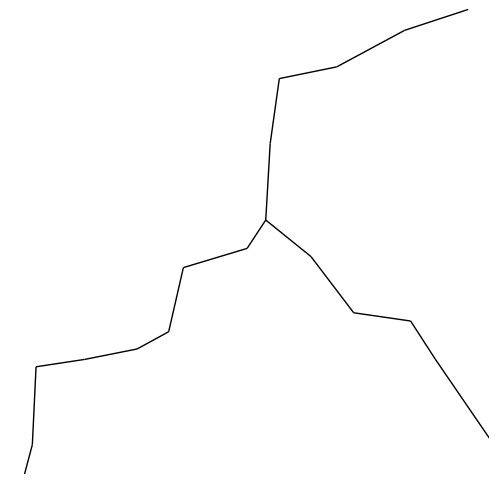

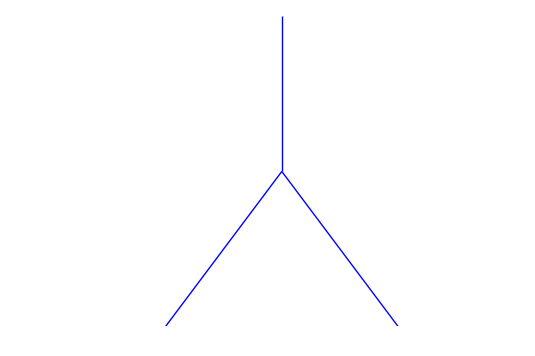

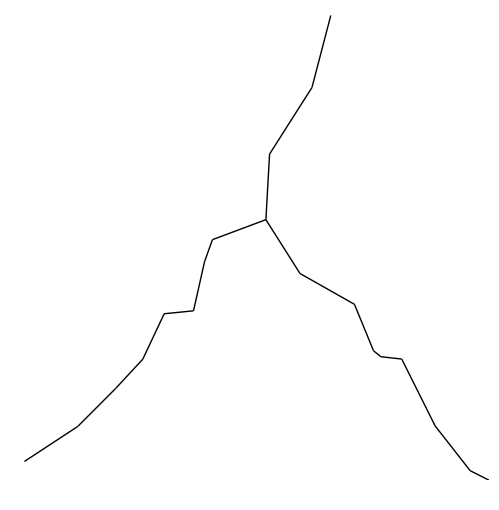

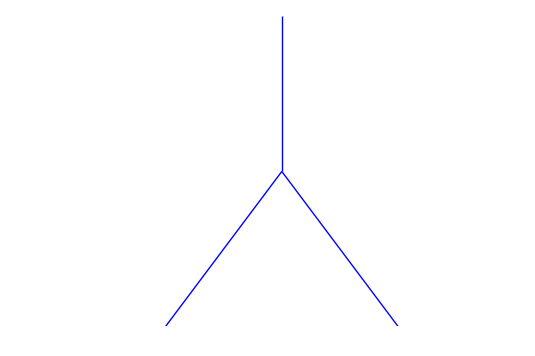

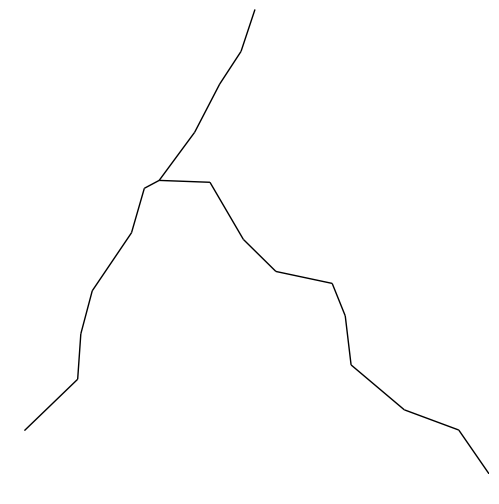

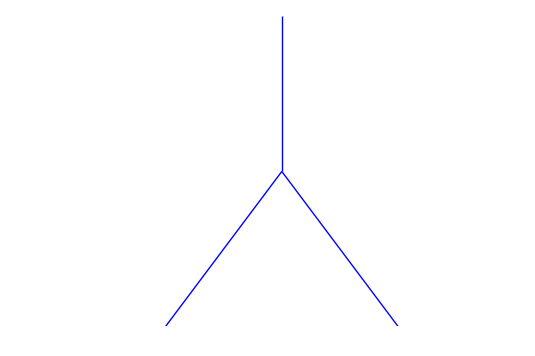

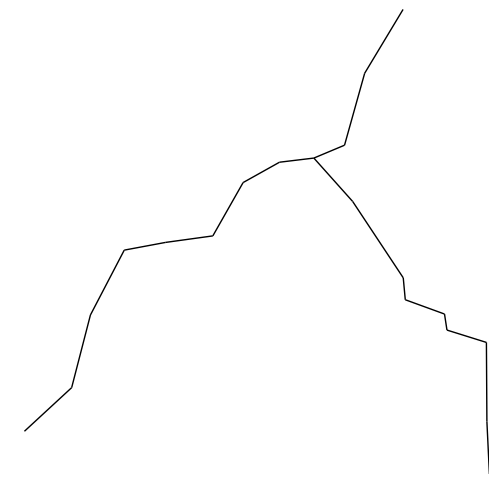

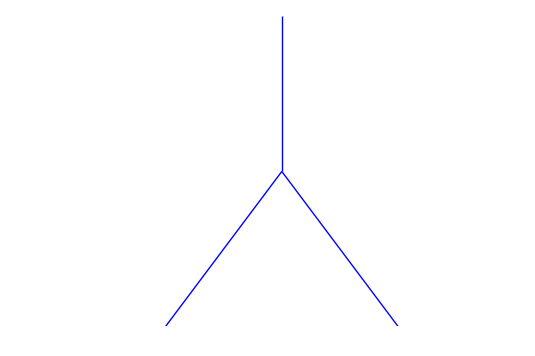

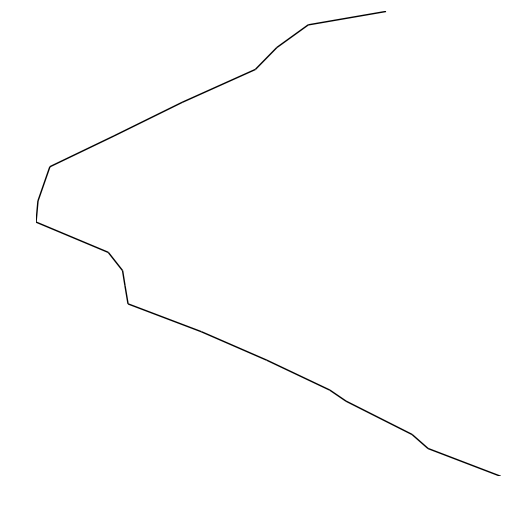

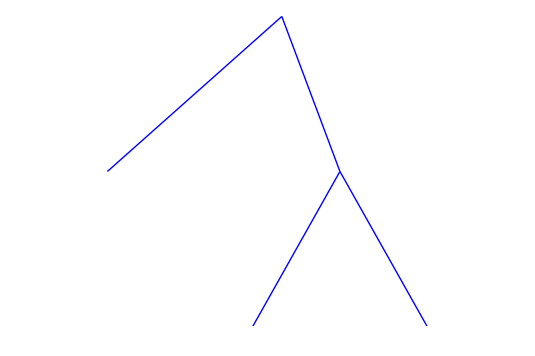

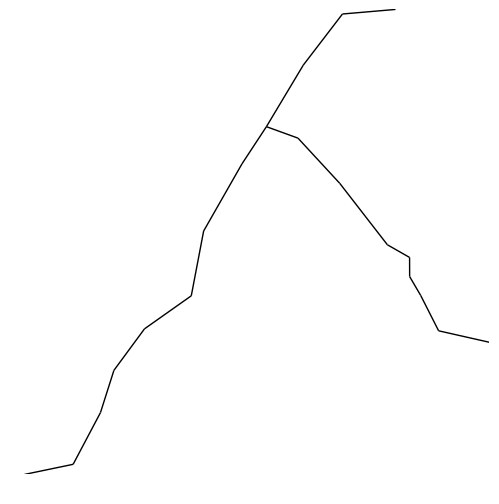

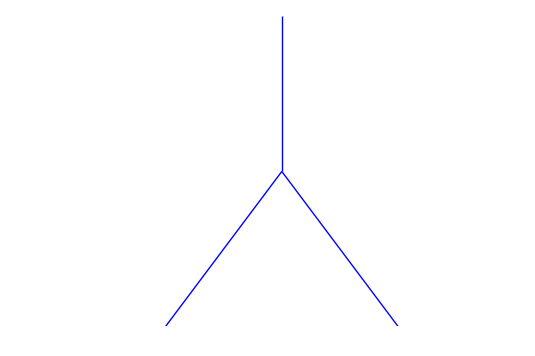

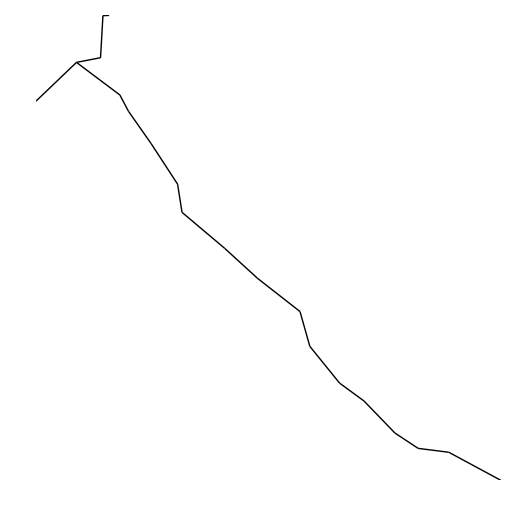

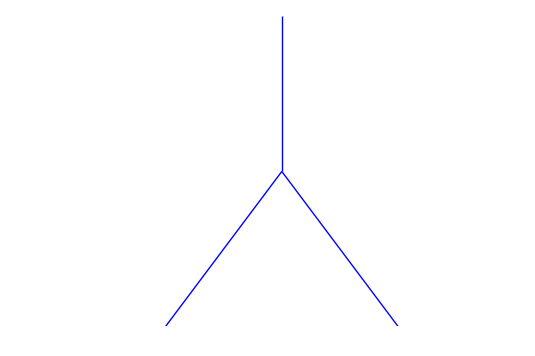

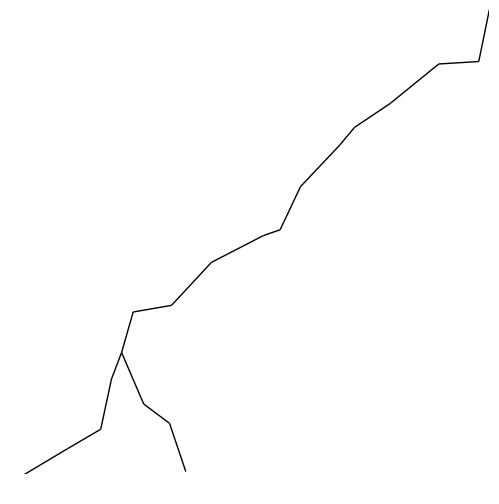

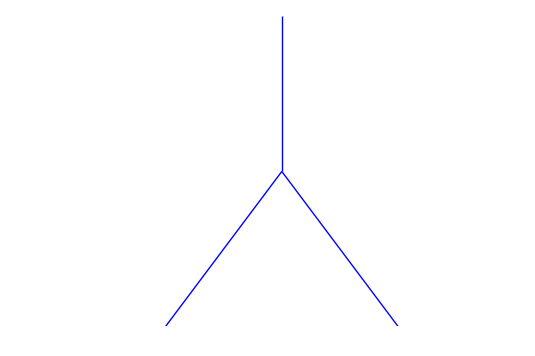

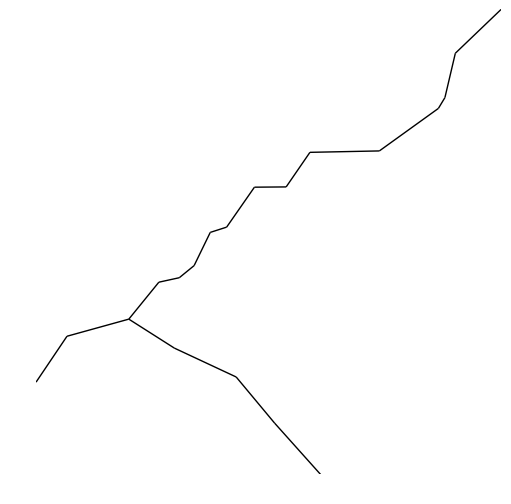

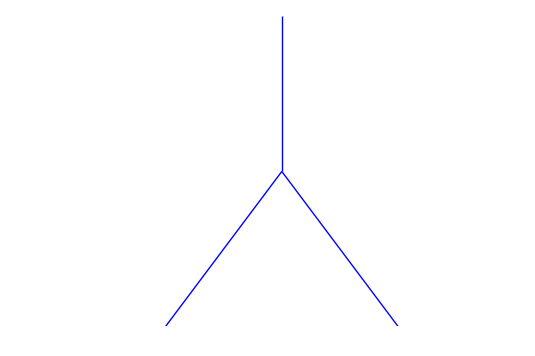

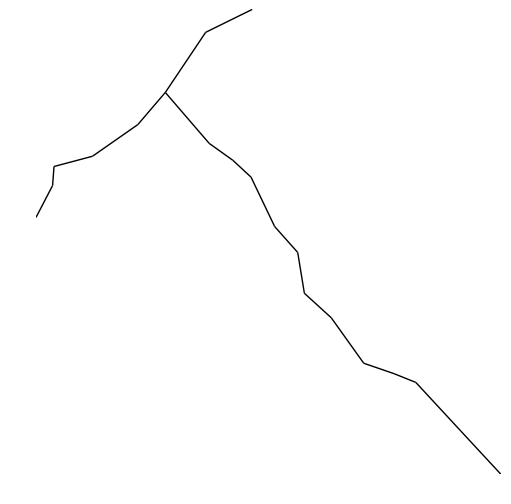

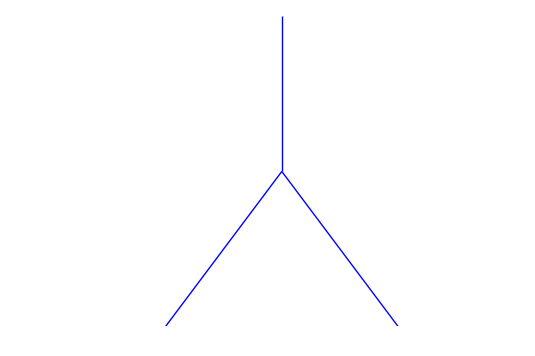

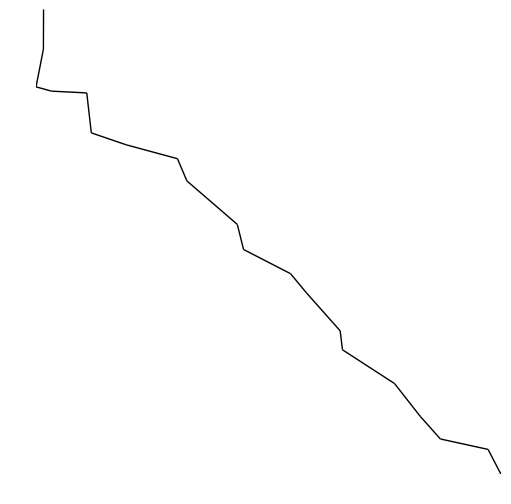

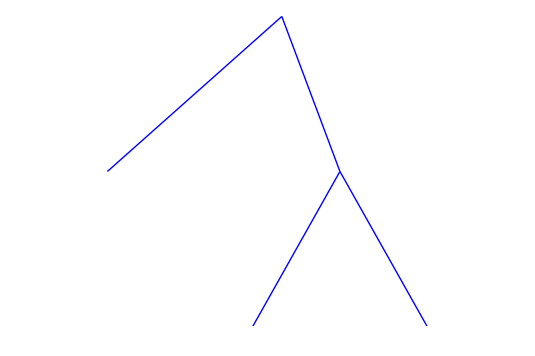

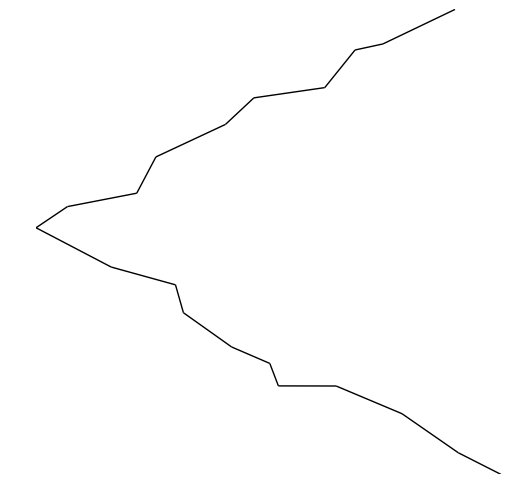

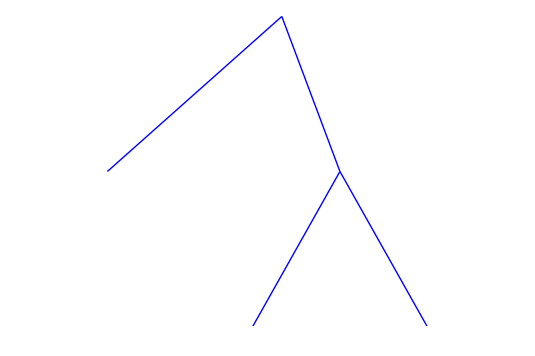

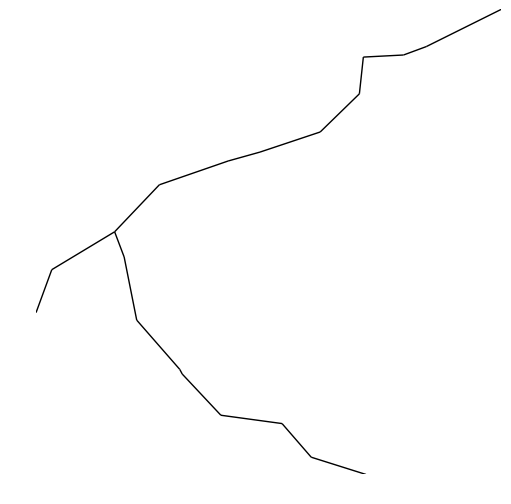

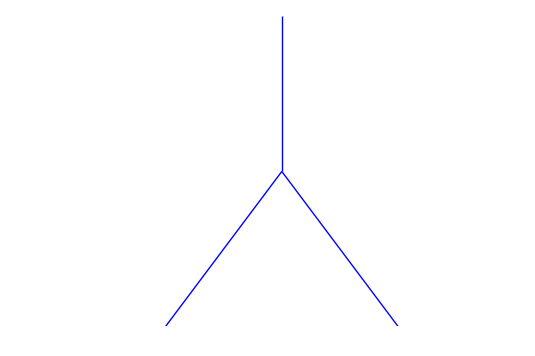

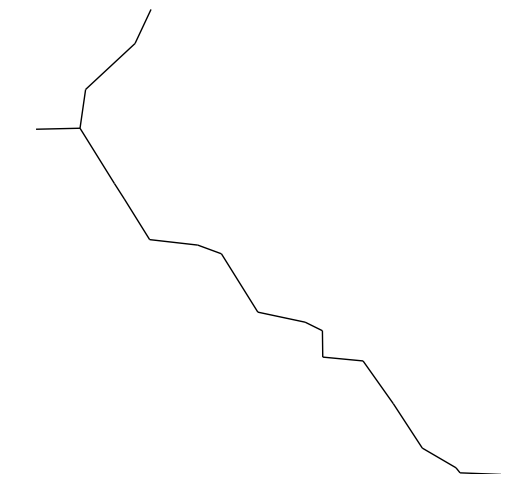

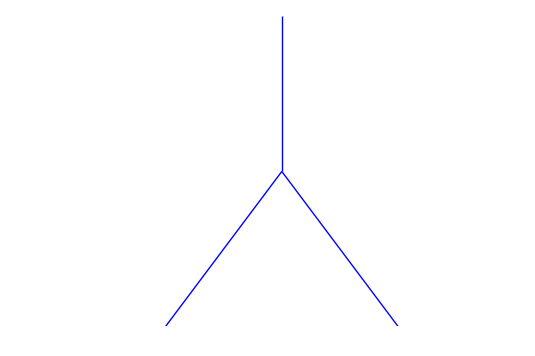

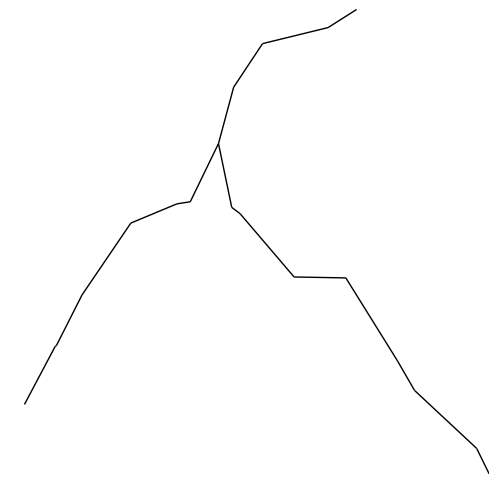

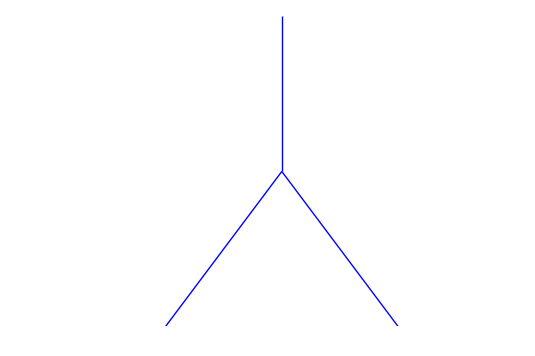

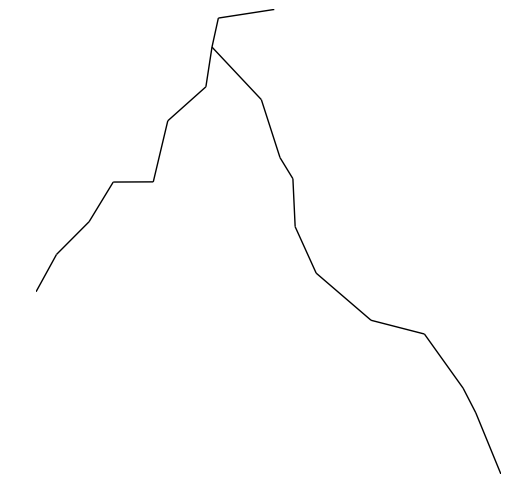

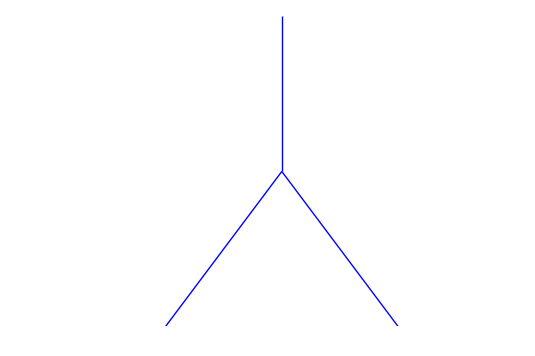

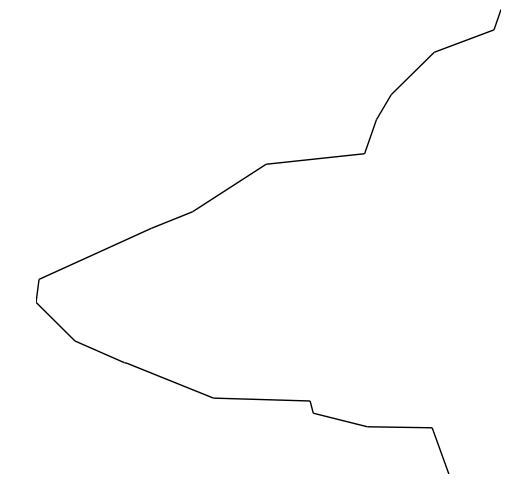

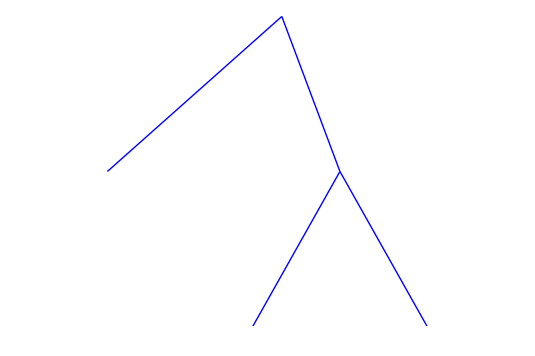

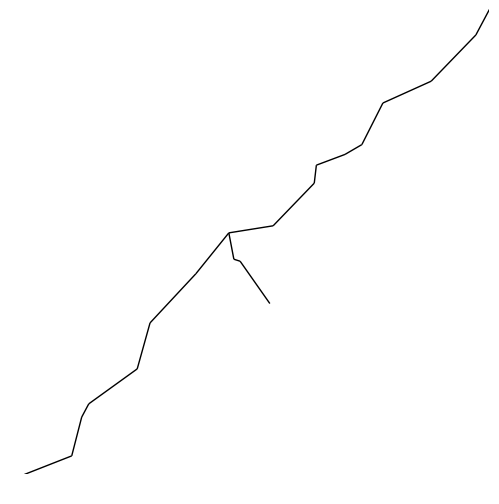

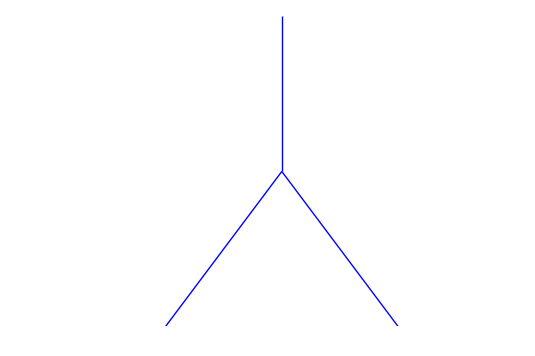

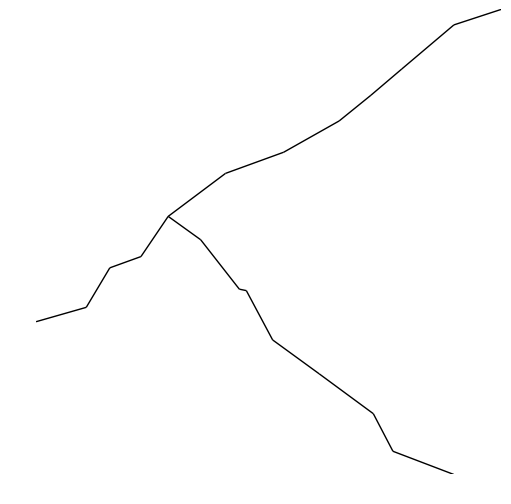

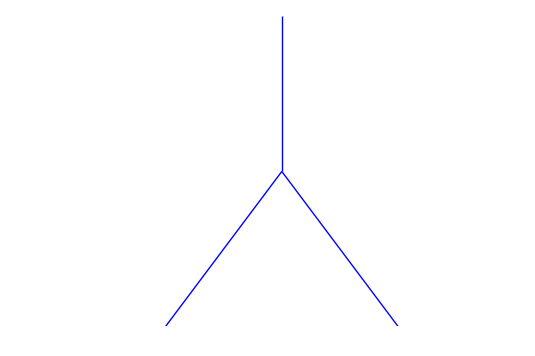

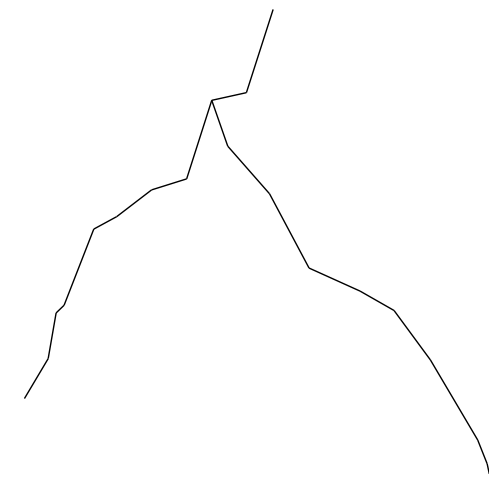

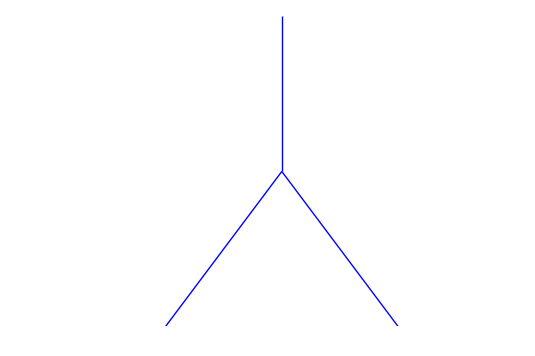

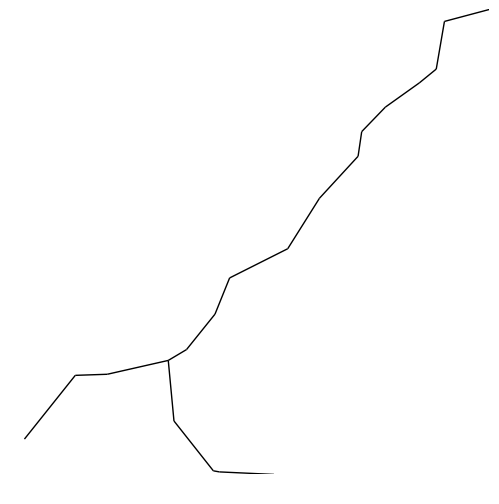

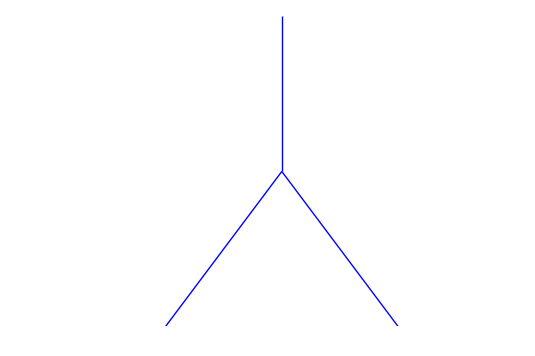

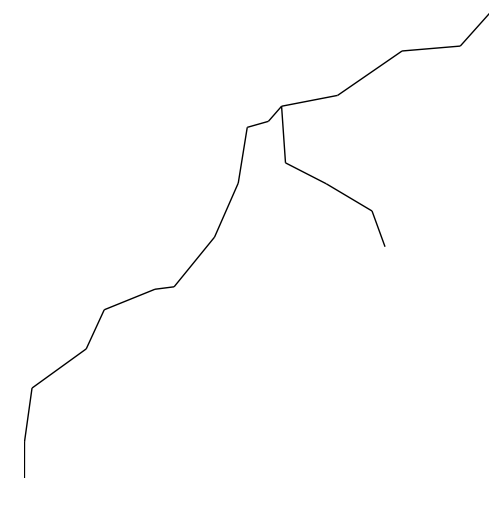

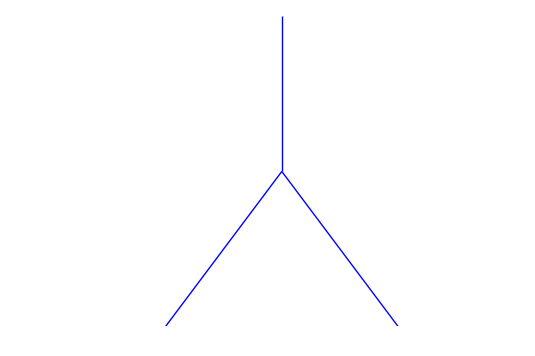

In [29]:
for ex in range(2200, 2300):
    input_code = dict()
    input_code['morphology'] = training_data['morphology']['n20'][ex, :]
    input_code['geometry'] = np.squeeze(training_data['geometry']['n20'][ex, :, :])
    neuron_object = data_transforms.make_swc_from_prufer_and_locations(input_code)
    neuron_object = McNeuron.Neuron(file_format='only list of nodes', input_file = neuron_object.nodes_list)
    McNeuron.visualize.plot_2D(neuron_object)
    McNeuron.visualize.plot_dedrite_tree(neuron_object)